___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***.

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method.

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
#!pip install -U scikit-learn

In [ ]:
import numpy as np
np.__version__  # np version : 1.23.5

'1.26.4'

In [ ]:
import sklearn
sklearn.__version__

'1.5.1'

Bu kod parçası, veri analizi ve makine öğrenimi için gerekli kütüphaneleri (pandas, numpy, matplotlib, seaborn, sklearn, scipy) yükler ve bazı temel ayarları yapar. Bu ayarlar arasında matplotlib grafikleri için varsayılan boyutu belirlemek, pandas veri çerçevelerinde gösterilecek sütun ve satır sayılarını ayarlamak ve sayıların formatını düzenlemek bulunur. Ayrıca, NumPy ve scikit-learn kütüphanelerinin sürümlerini kontrol eder. Uyarıları gizlemek için warnings.filterwarnings('ignore') kullanılır.

In [ ]:
df = pd.read_csv("Ready_to_ML.csv")

Bu satır, pandas kütüphanesini kullanarak "Ready_to_ML.csv" adlı CSV dosyasını okur ve verileri bir DataFrame olarak df adlı bir değişkende saklar. DataFrame, veri analizi ve manipülasyonu için kullanılan pandas'ın temel veri yapılarından biridir ve bu dosyadaki tüm verileri tablo şeklinde organize eder. CSV dosyasının içeriğine bağlı olarak, bu DataFrame çeşitli veri işlemleri ve analizler için kullanılabilir.

In [ ]:
df.head()

make_model           make  \
0     Mercedes-Benz A 160  Mercedes-Benz   
1   Mercedes-Benz EQE 350  Mercedes-Benz   
2  Mercedes-Benz A 45 AMG  Mercedes-Benz   
3  Mercedes-Benz A 35 AMG  Mercedes-Benz   
4  Mercedes-Benz A 45 AMG  Mercedes-Benz   

                                            location     price body_type  \
0  P.I. EL PALMAR C/FORJA 6,  11500 PUERTO DE SAN... 16950.000   Compact   
1       APARTADO DE CORREOS 1032,  26140 LOGROÑO, ES 80900.000   Compact   
2  PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8... 69900.000   Compact   
3  Carrer de Provença, 31 Local,  8029 BARCELONA, ES 46990.000   Compact   
4             CARRIL ARAGONES 4,  30007 CASILLAS, ES 16800.000   Compact   

             type warranty    mileage    gearbox fuel_type  seller  \
0            Used      Yes 120200.000     Manual    Diesel  Dealer   
1  Pre-registered      Yes   5000.000  Automatic  Electric  Dealer   
2            Used      Yes  18900.000  Automatic   Benzine  Dealer   
3            Used      Yes  18995.000  Automatic   Benzine  Dealer   
4            Used      Yes 197000.000  Automatic    Diesel  Dealer   

   engine_size  gears  co_emissions drivetrain  \
0     1595.000  5.000        98.000      Front   
1        1.000  1.000         0.000        4WD   
2     1991.000  8.000       162.000        4WD   
3     1991.000  7.000       169.000        4WD   
4     2143.000  7.000       162.000        4WD   

                                              extras  empty_weight  \
0                                       Alloy wheels      1270.000   
1  Alloy wheels (21"), Shift paddles, Sport packa...      2355.000   
2                                       Alloy wheels      1555.000   
3                                        Sport seats      1455.000   
4                                       Alloy wheels      1545.000   

  full_service_history         upholstery  previous_owner  \
0                   No              Cloth           2.000   
1                   No  Part/Full Leather           1.000   
2                   No  Part/Full Leather           2.000   
3                   No  Part/Full Leather           2.000   
4                   No  Part/Full Leather           2.000   

  energy_efficiency_class   age  power_kW  cons_avg  \
0               efficient 6.000    75.000     3.800   
1               efficient 0.000   215.000     2.359   
2             unefficient 2.000   310.000     8.400   
3             unefficient 2.000   225.000     7.300   
4             unefficient 7.000   100.000     4.900   

  comfort_&_convenience_Package entertainment_&_media_Package  \
0                      Standard                      Standard   
1                       Premium                          Plus   
2                      Standard                      Standard   
3                      Standard                      Standard   
4                      Standard                      Standard   

     safety_&_security_Package  
0       Safety Premium Package  
1       Safety Premium Package  
2  Safety Premium Plus Package  
3       Safety Premium Package  
4  Safety Premium Plus Package


df.head() komutu, "Ready_to_ML.csv" dosyasından okunan verilerin ilk beş satırını gösterir. Bu veri seti, otomobil satışlarına dair çeşitli özellikleri içerir: araç markası ve modeli, konumu, fiyatı, gövde tipi, kullanım durumu, garanti bilgisi, kilometre, şanzıman türü, yakıt tipi, satıcı bilgisi, motor büyüklüğü, dişli sayısı, CO2 emisyonları, sürüş sistemi, ek özellikler, boş ağırlık, tam hizmet geçmişi, döşeme türü, önceki sahip sayısı, enerji verimlilik sınıfı, yaş, güç (kW), ortalama tüketim, ve çeşitli paketler (konfor, eğlence, güvenlik). Bu veriler, araçların çeşitli özelliklerine göre analiz ve modelleme yapmak için kullanılabilir.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26711 entries, 0 to 26710
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     26711 non-null  object 
 1   make                           26711 non-null  object 
 2   location                       26711 non-null  object 
 3   price                          26711 non-null  float64
 4   body_type                      26711 non-null  object 
 5   type                           26711 non-null  object 
 6   warranty                       26711 non-null  object 
 7   mileage                        26711 non-null  float64
 8   gearbox                        26711 non-null  object 
 9   fuel_type                      26711 non-null  object 
 10  seller                         26711 non-null  object 
 11  engine_size                    26711 non-null  float64
 12  gears                          26711 non-null 

df.info() komutu, veri çerçevesinin genel yapısını özetler. Bu veri seti, 26,711 satır ve 27 sütundan oluşur. Sütunlar arasında make_model, make, location, price, body_type, type, warranty, mileage, gearbox, fuel_type, seller, engine_size, gears, co_emissions, drivetrain, extras, empty_weight, full_service_history, upholstery, previous_owner, energy_efficiency_class, age, power_kW, cons_avg, comfort_&_convenience_Package, entertainment_&_media_Package, ve safety_&_security_Package yer alır. Sütunların hepsi dolu (null olmayan) ve veri türleri float64 (sayısal veriler) ve object (metin verileri) olarak sınıflandırılmıştır.

In [ ]:
df.describe()

price    mileage  engine_size     gears  co_emissions  \
count  26711.000  26711.000    26711.000 26711.000     26711.000   
mean   23537.241  68863.812     1708.965     5.820       129.526   
std    20811.986  62794.146      772.440     1.417        54.255   
min      490.000      0.000        0.000     1.000         0.000   
25%    12490.000  19155.000     1248.000     5.000       105.000   
50%    18440.000  54000.000     1595.000     6.000       123.000   
75%    28330.000 100675.000     1969.000     6.000       150.000   
max   549000.000 667128.000     6300.000     8.000       399.000   

       empty_weight  previous_owner       age  power_kW  cons_avg  
count     26711.000       26711.000 26711.000 26711.000 26711.000  
mean       1425.205           1.460     5.166   118.414     5.532  
std         307.387           0.853     4.655    65.642     2.220  
min         347.000           1.000     0.000    33.000     0.000  
25%        1228.000           1.000     2.000    80.000     4.300  
50%        1375.000           1.000     4.000   100.000     5.200  
75%        1597.000           2.000     7.000   135.000     6.400  
max        3150.000           9.000    20.000   450.000    18.300

df.describe() komutu, sayısal sütunların temel istatistiklerini sunar. Bu verilere göre, price (fiyat) sütununun ortalaması yaklaşık 23,537.24 birim olup, standart sapması oldukça yüksektir (20,811.99), bu da fiyatların geniş bir aralıkta dağıldığını gösterir. mileage (kilometre) ortalama olarak 68,863.81 km'dir ve büyük bir değişkenliğe sahiptir (standart sapma: 62,794.15 km). engine_size (motor büyüklüğü) ortalaması 1,708.97 cm³ olup, 0 ile 6,300 cm³ arasında değişir. Diğer sütunlar da benzer şekilde, ortalama değerler ve dağılım aralıkları ile özetlenmiştir. Örneğin, cons_avg (ortalama tüketim) sütunu ortalama olarak 5.53 litre/100 km olup, bu değer 0 ile 18.30 litre/100 km arasında değişmektedir. Bu özet, veri setindeki sayısal özelliklerin dağılımı hakkında genel bir bilgi sağlar.

In [ ]:
df.duplicated().sum()

1815


df.duplicated().sum() komutu, veri çerçevesinde toplam 1,815 adet tamamen tekrarlayan (duplike) satır olduğunu gösterir. Bu, veri setinde aynı değerlere sahip 1,815 satırın bulunduğu anlamına gelir. Bu tür tekrarlar, veri temizleme ve ön işleme aşamasında dikkate alınmalı, çünkü analiz ve modelleme sonuçlarını etkileyebilir. Bu satırları veri setinden çıkarmak genellikle daha doğru ve güvenilir sonuçlar elde edilmesine yardımcı olabilir.

In [ ]:
df.drop_duplicates(inplace=True)


df.drop_duplicates(inplace=True) komutu, veri çerçevesindeki tamamen tekrarlayan satırları kaldırır ve inplace=True parametresi sayesinde değişiklikleri doğrudan mevcut DataFrame üzerinde uygular. Bu işlem sonucunda, tekrar eden satırların veri setinden çıkarılmasıyla temizlenmiş bir veri seti elde edilir. Bu, veri setinin doğruluğunu artırabilir ve analizlerin güvenilirliğini sağlayabilir.

In [ ]:
df.duplicated().sum()

0

df.duplicated().sum() komutunun sonucu 0 olarak döndü, bu da veri çerçevesindeki tüm tamamen tekrarlayan satırların başarıyla kaldırıldığını ve artık veri setinde tekrarlayan satır kalmadığını gösterir. Bu, veri temizleme sürecinin tamamlandığını ve veri setinin tekrar eden kayıtlar açısından temiz olduğunu belirtir.

In [ ]:
df.make_model.value_counts()


make_model
Renault Megane              825
SEAT Leon                   757
Dacia Sandero               721
Hyundai i30                 699
Opel Astra                  634
Ford Mustang                572
Peugeot 308                 536
Nissan Qashqai              484
Ford Focus                  483
SEAT Ibiza                  433
Volvo V40                   430
Fiat Tipo                   415
Fiat 500                    413
Renault Clio                404
Ford Fiesta                 392
Nissan Micra                380
Fiat 500X                   373
Skoda Octavia               359
Opel Corsa                  358
Dacia Duster                343
Toyota Yaris                323
Opel Insignia               290
Volvo C70                   281
Peugeot 208                 260
Skoda Fabia                 246
Fiat 500C                   238
Toyota Auris                231
Peugeot RCZ                 220
Hyundai TUCSON              216
Peugeot 3008                215
Ford Kuga                   2


Veri setindeki araç markası ve modeli sayıları, bazı markaların ve modellerin oldukça düşük örneklem sayısına sahip olduğunu gösteriyor. Bu düşük örneklem sayısına sahip modeller, makine öğrenimi modellerinin öğrenme sürecinde yetersiz bilgi sunabilir ve dolayısıyla tahminlerde doğruluk sorunlarına yol açabilir. Makine öğrenimi modellerinin doğru ve güvenilir tahminler yapabilmesi için her markanın ve modelin yeterince temsil edilmesi gerekmektedir. Bu nedenle, modelin iyi performans göstermesi için 100'den az örneği olan markalar ve modeller veri setinden çıkarılacaktır. Bu işlem, modelin daha geniş ve dengeli bir veri seti ile eğitilmesini sağlayarak daha güvenilir sonuçlar elde edilmesine yardımcı olur.

In [ ]:
drop_model = df.make_model.value_counts()[df.make_model.value_counts() <= 19].index
drop_model

Index(['Opel Karl', 'Toyota Verso', 'Nissan Navara', 'Ford Mustang Mach-E',
       'Mercedes-Benz S 63 AMG', 'Volvo S80', 'Peugeot Rifter',
       'Mercedes-Benz S 350', 'Skoda Yeti', 'Mercedes-Benz GLE 400',
       ...
       'Mercedes-Benz ML 300', 'Dacia Break', 'Toyota Tundra',
       'Mercedes-Benz E 50 AMG', 'Mercedes-Benz CLS 300',
       'Mercedes-Benz S 65 AMG', 'Mercedes-Benz CLK 320', 'Toyota GR86',
       'Toyota Tacoma', 'Renault R 11'],
      dtype='object', name='make_model', length=316)

Liste, veri setindeki örneklem sayısı 19 veya daha az olan araç modellerini içeriyor. Bu modellerin veri setindeki düşük temsil oranı, makine öğrenimi modellerinin bu araçlar hakkında yeterince bilgi edinmesini zorlaştırabilir ve tahminlerin doğruluğunu etkileyebilir. Bu nedenle, bu modellerin verilerini veri setinden çıkarmak, modelin genel performansını artırarak daha güvenilir ve doğru tahminler yapmasını sağlayabilir. Bu işlem, veri setindeki verimliliği ve modelin öğrenme kalitesini artırmak için yapılır.
100 veya daha az gözleme sahip modelleri listeledik. Bu listedeki modellerin gözlemlerini verilerimizden çıkaracağız.

In [ ]:
for i in drop_model:
    drop_index = df[df['make_model'] == i].index
    df.drop(index = drop_index, inplace=True)

df.reset_index(drop=True, inplace=True)

Veri setinde model adları 100'den az gözleme sahip olanları belirleyip bu modellerin tüm gözlemlerini veri setinden çıkarıyoruz. Bu işlem sırasında, her modelin gözlem indekslerini bulup silme işlemi gerçekleştiriyoruz. Son olarak, silinen indekslerin veri setinde yer almadığı göz önünde bulundurularak, kalan verilerin indekslerini sıfırdan başlayacak şekilde yeniden düzenliyoruz. Bu sayede veri seti daha düzenli ve analize uygun hale geliyor.

In [ ]:
df

make_model           make  \
0      Mercedes-Benz A 45 AMG  Mercedes-Benz   
1      Mercedes-Benz A 35 AMG  Mercedes-Benz   
2      Mercedes-Benz A 45 AMG  Mercedes-Benz   
3       Mercedes-Benz CLA 180  Mercedes-Benz   
4         Mercedes-Benz A 220  Mercedes-Benz   
...                       ...            ...   
23229               Volvo V40          Volvo   
23230               Volvo S60          Volvo   
23231               Volvo S90          Volvo   
23232               Volvo C30          Volvo   
23233               Volvo S90          Volvo   

                                                location     price body_type  \
0      PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8... 69900.000   Compact   
1      Carrer de Provença, 31 Local,  8029 BARCELONA, ES 46990.000   Compact   
2                 CARRIL ARAGONES 4,  30007 CASILLAS, ES 16800.000   Compact   
3        CR PATERNA-LA CAÑADA, KM. 2,  46980 PATERNA, ES 22550.000   Compact   
4           CTRA DE MADRID KM 315,7,  50012 ZARAGOZA, ES 26900.000   Compact   
...                                                  ...       ...       ...   
23229                                   1000 Brussel, BE 13000.000     Sedan   
23230             CALLE CATALUNYA, 37,  8520 LLERONA, ES  4999.000     Sedan   
23231           HERMANOS LUMIERE Nº16,  29004 MALAGA, ES 37600.000     Sedan   
23232             Sur rendez-vous,  5060 Sambreville, BE  7300.000     Sedan   
23233    Bergambachterstraat 5,  2871 JB SCHOONHOVEN, NL 29900.000     Sedan   

       type warranty    mileage    gearbox fuel_type          seller  \
0      Used      Yes  18900.000  Automatic   Benzine          Dealer   
1      Used      Yes  18995.000  Automatic   Benzine          Dealer   
2      Used      Yes 197000.000  Automatic    Diesel          Dealer   
3      Used      Yes  83339.000     Manual    Diesel          Dealer   
4      Used      Yes  48900.000  Automatic   Benzine          Dealer   
...     ...      ...        ...        ...       ...             ...   
23229  Used       No 114000.000     Manual    Diesel  Private seller   
23230  Used      Yes 166512.000     Manual   Benzine          Dealer   
23231  Used      Yes  40345.000  Automatic    Diesel          Dealer   
23232  Used      Yes  96000.000     Manual    Diesel          Dealer   
23233  Used      Yes  94343.000  Automatic   Benzine          Dealer   

       engine_size  gears  co_emissions drivetrain  \
0         1991.000  8.000       162.000        4WD   
1         1991.000  7.000       169.000        4WD   
2         2143.000  7.000       162.000        4WD   
3         1595.000  7.000       134.000      Front   
4         1991.000  7.000       141.000      Front   
...            ...    ...           ...        ...   
23229     1969.000  6.000        94.000      Front   
23230     2521.000  5.000       145.000      Front   
23231     1969.000  8.000       127.000        4WD   
23232     1560.000  6.000        99.000      Front   
23233     1969.000  8.000       149.000        4WD   

                                                  extras  empty_weight  \
0                                           Alloy wheels      1555.000   
1                                            Sport seats      1455.000   
2                                           Alloy wheels      1545.000   
3         Alloy wheels (17"), Shift paddles, Sport seats      1410.000   
4                              Alloy wheels, Sport seats      1450.000   
...                                                  ...           ...   
23229  All season tyres, Ambient lighting, Cargo barr...      1532.000   
23230                                       Alloy wheels      1550.000   
23231                                       Alloy wheels      2077.000   
23232  Alloy wheels, Automatically dimming interior m...      1356.000   
23233  Alloy wheels (18"), Automatically dimming inte...      1617.000   

      full_service_history         upholstery  previous_owner  \
0            


Veri seti, araçların marka ve model bilgilerini içeren çeşitli özellikleriyle birlikte düzenlenmiştir. Her bir satır, bir araç modeline ait fiyat, kilometre, motor büyüklüğü gibi detayları sunar. "drop_model" listesinde yer alan ve 100'den az gözleme sahip olan araç modellerinin gözlemleri veri setinden çıkarılmıştır. Bu işlemden sonra, veri setindeki indeksler yeniden sıfırdan başlatılarak veri seti düzenlenmiştir. Sonuç olarak, veri seti artık her model için yeterli sayıda gözlem içermekte ve analize uygun hale gelmiştir.

In [ ]:
df.make_model.value_counts()

# We saw that models with less than 100 observations were dropped.

make_model
Renault Megane              825
SEAT Leon                   757
Dacia Sandero               721
Hyundai i30                 699
Opel Astra                  634
Ford Mustang                572
Peugeot 308                 536
Nissan Qashqai              484
Ford Focus                  483
SEAT Ibiza                  433
Volvo V40                   430
Fiat Tipo                   415
Fiat 500                    413
Renault Clio                404
Ford Fiesta                 392
Nissan Micra                380
Fiat 500X                   373
Skoda Octavia               359
Opel Corsa                  358
Dacia Duster                343
Toyota Yaris                323
Opel Insignia               290
Volvo C70                   281
Peugeot 208                 260
Skoda Fabia                 246
Fiat 500C                   238
Toyota Auris                231
Peugeot RCZ                 220
Hyundai TUCSON              216
Peugeot 3008                215
Ford Kuga                   2

Veri setinde, araç modellerinin her birinin gözlem sayıları listelenmiştir. Bu liste, her modelin veri setinde kaç kez yer aldığını gösterir. Görülen o ki, birçok model 100'ün üzerinde gözleme sahipken, bazı modeller bu sayının altında kalmaktadır. Özellikle Renault Megane, SEAT Leon ve Dacia Sandero gibi modeller, yüksek gözlem sayılarıyla dikkat çekmektedir. Ancak, bazı modellerin gözlem sayıları 20'nin altına düşmektedir. Bu bilgiler, model sayısının veri setindeki temsili ve genel analizlerde kullanılabilirliğini etkileyebilir. Veri setinde az gözlem bulunan modeller, analizlerde daha az temsil edildiği için genel eğilimleri belirlemede sınırlı olabilir.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23234 entries, 0 to 23233
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     23234 non-null  object 
 1   make                           23234 non-null  object 
 2   location                       23234 non-null  object 
 3   price                          23234 non-null  float64
 4   body_type                      23234 non-null  object 
 5   type                           23234 non-null  object 
 6   warranty                       23234 non-null  object 
 7   mileage                        23234 non-null  float64
 8   gearbox                        23234 non-null  object 
 9   fuel_type                      23234 non-null  object 
 10  seller                         23234 non-null  object 
 11  engine_size                    23234 non-null  float64
 12  gears                          23234 non-null 

Veri setinin yapısını gösteren bu bilgiye göre, veri çerçevesi toplamda 23,234 satır ve 27 sütun içermektedir. Sütunlar, her biri çeşitli araç bilgilerini içeren verileri temsil eder. Sütunların tamamında, veri eksikliği olmadan 23,234 geçerli gözlem bulunmaktadır. Bu sütunlar arasında, araç model adı, marka, konum, fiyat, gövde tipi, kullanım durumu, kilometre, vites türü, yakıt türü, satıcı, motor hacmi, vites sayısı, CO2 emisyonları, sürüş türü, ekstra özellikler, boş ağırlık, servis geçmişi, döşeme türü, önceki sahip sayısı, enerji verimliliği sınıfı, yaş, güç, ortalama tüketim ve çeşitli paketler gibi bilgiler yer almaktadır. Sütunlardan 10'u sayısal verileri (float64), 17'si ise kategorik verileri (object) içermektedir. Bu yapı, veri analizi ve makine öğrenimi modelleri için gerekli olan tüm bilgilerin mevcut olduğunu ve veri temizleme veya ön işleme gereksinimlerinin olmadığını gösterir.

## Feature Engineering

In [ ]:
df.head(2)

make_model           make  \
0  Mercedes-Benz A 45 AMG  Mercedes-Benz   
1  Mercedes-Benz A 35 AMG  Mercedes-Benz   

                                            location     price body_type  \
0  PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8... 69900.000   Compact   
1  Carrer de Provença, 31 Local,  8029 BARCELONA, ES 46990.000   Compact   

   type warranty   mileage    gearbox fuel_type  seller  engine_size  gears  \
0  Used      Yes 18900.000  Automatic   Benzine  Dealer     1991.000  8.000   
1  Used      Yes 18995.000  Automatic   Benzine  Dealer     1991.000  7.000   

   co_emissions drivetrain        extras  empty_weight full_service_history  \
0       162.000        4WD  Alloy wheels      1555.000                   No   
1       169.000        4WD   Sport seats      1455.000                   No   

          upholstery  previous_owner energy_efficiency_class   age  power_kW  \
0  Part/Full Leather           2.000             unefficient 2.000   310.000   
1  Part/Full Leather           2.000             unefficient 2.000   225.000   

   cons_avg comfort_&_convenience_Package entertainment_&_media_Package  \
0     8.400                      Standard                      Standard   
1     7.300                      Standard                      Standard   

     safety_&_security_Package  
0  Safety Premium Plus Package  
1       Safety Premium Package

Veri çerçevesinin ilk iki satırında, iki araç modeli hakkında detaylı bilgiler yer alıyor. İlk araç Mercedes-Benz A 45 AMG, 69,900 EUR fiyatında, 18,900 km'de, benzinli ve otomatik vitesli bir modeldir. Özellikleri arasında dört tekerlekten çekiş, alaşım jantlar ve derili döşeme bulunur. Araç, 310 kW güç ve 8.4 L/100 km ortalama tüketim sunar, ancak enerji verimliliği sınıfı verimsizdir. İkinci araç Mercedes-Benz A 35 AMG, 46,990 EUR fiyatında, 18,995 km'de, benzinli ve otomatik vitesli bir modeldir. Bu araç, 225 kW güç ve 7.3 L/100 km ortalama tüketim sunar ve spor koltuklar gibi ek özellikler taşır, ayrıca enerji verimliliği sınıfı da verimsizdir. Her iki araç da ikinci el olup, yetkili satıcılar tarafından satılmaktadır ve her ikisi de standart konfor, medya ve güvenlik paketlerine sahiptir.

In [ ]:
df.drop(columns=["make", "location"], inplace=True)



Veri çerçevesinden "make" ve "location" sütunları çıkarılmıştır. "make" sütunu, zaten "make_model" özelliği tarafından kapsandığı için gereksiz hale gelmiştir. "location" sütunu ise fiyatlar üzerinde belirgin bir etkisi olmayacağı düşünüldüğü için kaldırılmıştır.

In [ ]:
df.head(2)

make_model     price body_type  type warranty   mileage  \
0  Mercedes-Benz A 45 AMG 69900.000   Compact  Used      Yes 18900.000   
1  Mercedes-Benz A 35 AMG 46990.000   Compact  Used      Yes 18995.000   

     gearbox fuel_type  seller  engine_size  gears  co_emissions drivetrain  \
0  Automatic   Benzine  Dealer     1991.000  8.000       162.000        4WD   
1  Automatic   Benzine  Dealer     1991.000  7.000       169.000        4WD   

         extras  empty_weight full_service_history         upholstery  \
0  Alloy wheels      1555.000                   No  Part/Full Leather   
1   Sport seats      1455.000                   No  Part/Full Leather   

   previous_owner energy_efficiency_class   age  power_kW  cons_avg  \
0           2.000             unefficient 2.000   310.000     8.400   
1           2.000             unefficient 2.000   225.000     7.300   

  comfort_&_convenience_Package entertainment_&_media_Package  \
0                      Standard                      Standard   
1                      Standard                      Standard   

     safety_&_security_Package  
0  Safety Premium Plus Package  
1       Safety Premium Package

Veri çerçevesinde, araçların çeşitli özellikleri yer alıyor: model ve markası, fiyatı, gövde tipi, durumu (kullanılmış/yenilenmiş), garanti durumu, kilometre, vites türü, yakıt türü, satıcı türü, motor hacmi, vites sayısı, karbon salınımı, tahrik türü, ekstralar, boş ağırlık, servis geçmişi, döşeme türü, önceki sahip sayısı, enerji verimliliği sınıfı, yaş, motor gücü, ortalama tüketim ve çeşitli konfor, eğlence, ve güvenlik paketleri. Bu veriler, araç fiyatlarını ve diğer özellikleri analiz etmek amacıyla kullanılabilir.

In [ ]:
df_object = df.select_dtypes(include ="object").head()
df_object

make_model body_type  type warranty    gearbox fuel_type  \
0  Mercedes-Benz A 45 AMG   Compact  Used      Yes  Automatic   Benzine   
1  Mercedes-Benz A 35 AMG   Compact  Used      Yes  Automatic   Benzine   
2  Mercedes-Benz A 45 AMG   Compact  Used      Yes  Automatic    Diesel   
3   Mercedes-Benz CLA 180   Compact  Used      Yes     Manual    Diesel   
4     Mercedes-Benz A 220   Compact  Used      Yes  Automatic   Benzine   

   seller drivetrain                                          extras  \
0  Dealer        4WD                                    Alloy wheels   
1  Dealer        4WD                                     Sport seats   
2  Dealer        4WD                                    Alloy wheels   
3  Dealer      Front  Alloy wheels (17"), Shift paddles, Sport seats   
4  Dealer      Front                       Alloy wheels, Sport seats   

  full_service_history         upholstery energy_efficiency_class  \
0                   No  Part/Full Leather             unefficient   
1                   No  Part/Full Leather             unefficient   
2                   No  Part/Full Leather             unefficient   
3                   No  Part/Full Leather             unefficient   
4                   No  Part/Full Leather               efficient   

  comfort_&_convenience_Package entertainment_&_media_Package  \
0                      Standard                      Standard   
1                      Standard                      Standard   
2                      Standard                      Standard   
3                      Standard                          Plus   
4                      Standard                      Standard   

     safety_&_security_Package  
0  Safety Premium Plus Package  
1       Safety Premium Package  
2  Safety Premium Plus Package  
3       Safety Premium Package  
4       Safety Premium Package

Veri çerçevesindeki sadece nesne (string) veri türündeki özellikleri seçtiğimizde, aşağıdaki sütunları görüyoruz: make_model, body_type, type, warranty, gearbox, fuel_type, seller, drivetrain, extras, full_service_history, upholstery, energy_efficiency_class, comfort_&_convenience_Package, entertainment_&_media_Package, ve safety_&_security_Package. Bu sütunlar, araçların markası ve modeli, gövde tipi, kullanım durumu, garanti durumu, vites türü, yakıt türü, satıcı türü, tahrik türü, ekstralar, servis geçmişi, döşeme türü, enerji verimliliği sınıfı ve çeşitli konfor, eğlence ve güvenlik paketleri hakkında metin bilgileri içerir. Bu veriler, araçların özelliklerini ve özellikler arasındaki ilişkileri anlamak için kullanılabilir.

In [ ]:
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())


make_model                    : 174
body_type                     : 6
type                          : 4
warranty                      : 2
gearbox                       : 3
fuel_type                     : 4
seller                        : 2
drivetrain                    : 3
extras                        : 8277
full_service_history          : 2
upholstery                    : 2
energy_efficiency_class       : 2
comfort_&_convenience_Package : 3
entertainment_&_media_Package : 2
safety_&_security_Package     : 3



Bu kod, veri çerçevesindeki nesne (string) türündeki özelliklerin her birinin kaç farklı benzersiz değere sahip olduğunu gösterir. Çıktı şu şekilde özetlenebilir:

make_model: 174 benzersiz değer (farklı araç modelleri)

body_type: 6 benzersiz değer (örneğin, sedan, hatchback)

type: 4 benzersiz değer (kullanılmış, yeni vb.)

warranty: 2 benzersiz değer (garanti var/yok)

gearbox: 3 benzersiz değer (manuel, otomatik vb.)

fuel_type: 4 benzersiz değer (benzin, dizel vb.)

seller: 2 benzersiz değer (satıcı türü: bayi, özel satıcı)

drivetrain: 3 benzersiz değer (4WD, önden tahrik vb.)

extras: 8277 benzersiz değer (farklı ek özellikler)

full_service_history: 2 benzersiz değer (servis geçmişi var/yok)

upholstery: 2 benzersiz değer (döşeme türü)

energy_efficiency_class: 2 benzersiz değer (enerji verimliliği sınıfı)

comfort_&_convenience_Package: 3 benzersiz değer (konfor paketleri)

entertainment_&_media_Package: 2 benzersiz değer (eğlence paketleri)

safety_&_security_Package: 3 benzersiz değer (güvenlik paketleri)

Bu veriler, her özelliğin çeşitliliğini ve olası değer aralıklarını anlamak için kullanılır, böylece veri analizinde hangi özelliklerin daha fazla çeşitlilik içerdiği ve hangilerinin daha sınırlı olduğu anlaşılabilir.

### Converting the Extras feature from object to numeric

In [ ]:
df.extras.sample(10)


17185                          Alloy wheels, Voice Control
10273                                         Alloy wheels
5830                                          Summer tyres
4054     All season tyres, Alloy wheels, Summer tyres, ...
13152                                            Roof rack
15257    Alloy wheels (16"), Automatically dimming inte...
5514                                          Alloy wheels
22580    Alloy wheels, Catalytic Converter, Roof rack, ...
1961     Alloy wheels (18"), Sport seats, Sport suspension
11866    Alloy wheels, Catalytic Converter, Roof rack, ...
Name: extras, dtype: object

Bu kod, extras sütunundaki 10 rastgele örneği gösterir. extras sütunu, araçların sahip olduğu ek özelliklerin listesini içerir ve birçok farklı kombinasyon olabilir.
Bu verileri işleyerek her aracın sahip olduğu ek özelliklerin sayısını belirleyebiliriz. Özellikle bu ek özelliklerin sayısı, makine öğrenme modelimizin aracın değerine olan etkisini değerlendirmek için kullanılabilir.

Genellikle, daha fazla özelliğe sahip araçlar, kullanıcılar tarafından daha değerli olarak görülebilir, bu yüzden modelimizde bu özelliklerin sayısını saymak ve sayısal bir değer olarak kullanmak, modelin özelliklerin önemini daha iyi öğrenmesine yardımcı olabilir. Bu, extras sütunundaki her farklı ek özelliği sayarak ve bu sayıları veri çerçevesine ekleyerek yapılır.

In [ ]:
df.extras.apply(lambda x: len(x.split(',')))

0        1
1        1
2        1
3        3
4        2
        ..
23229    9
23230    1
23231    1
23232    3
23233    2
Name: extras, Length: 23234, dtype: int64


Bu kod, extras sütunundaki her bir aracın sahip olduğu ek özelliklerin sayısını hesaplar. İşlem şu şekilde çalışır:

df.extras.apply(lambda x: len(x.split(','))) ifadesi, extras sütunundaki her bir hücredeki özelllikleri virgülle ayırır ve bu özelliklerin toplam sayısını hesaplar.
len(x.split(',')) ifadesi, virgüllerle ayrılmış özellliklerin uzunluğunu belirler, yani her aracın kaç tane ek özelliği olduğunu hesaplar.
Sonuçta elde edilen sayı, her aracın sahip olduğu ek özelliklerin sayısını gösterir. Örneğin:

Birinci araçta sadece 1 özellik var.
Dördüncü araçta 3 farklı ek özellik var.
Diğer araçlarda da çeşitli sayılarda ek özellikler bulunabilir.


In [ ]:
df["extras"] = df.extras.apply(lambda x: len(x.split(',')))


Bu kod, extras sütunundaki her aracın sahip olduğu ek özelliklerin sayısını sayar ve bu sayıları extras sütununa yazar. İşlemin adımları şu şekildedir:

df.extras.apply(lambda x: len(x.split(','))) ifadesi, extras sütunundaki her bir hücredeki ek özelliklerin virgüllerle ayrıldığını varsayar ve her bir aracın sahip olduğu ek özelliklerin toplam sayısını hesaplar.
lambda x: len(x.split(',')) ifadesi, her bir hücredeki (örneğin "Alloy wheels, Roof rack") virgüllerle ayrılmış özelllikleri sayar ve bu sayıyı döndürür.
df["extras"] = kısmı, hesaplanan bu sayıların extras sütununa atanmasını sağlar.
Bu değişiklikten sonra extras sütunu, her aracın sahip olduğu ek özelliklerin sayısını gösterir. Bu, modelinizin ek özelliklerin sayısını kullanarak araçları daha iyi değerlendirmesine yardımcı olabilir.

In [ ]:
df.head()

make_model     price body_type  type warranty    mileage  \
0  Mercedes-Benz A 45 AMG 69900.000   Compact  Used      Yes  18900.000   
1  Mercedes-Benz A 35 AMG 46990.000   Compact  Used      Yes  18995.000   
2  Mercedes-Benz A 45 AMG 16800.000   Compact  Used      Yes 197000.000   
3   Mercedes-Benz CLA 180 22550.000   Compact  Used      Yes  83339.000   
4     Mercedes-Benz A 220 26900.000   Compact  Used      Yes  48900.000   

     gearbox fuel_type  seller  engine_size  gears  co_emissions drivetrain  \
0  Automatic   Benzine  Dealer     1991.000  8.000       162.000        4WD   
1  Automatic   Benzine  Dealer     1991.000  7.000       169.000        4WD   
2  Automatic    Diesel  Dealer     2143.000  7.000       162.000        4WD   
3     Manual    Diesel  Dealer     1595.000  7.000       134.000      Front   
4  Automatic   Benzine  Dealer     1991.000  7.000       141.000      Front   

   extras  empty_weight full_service_history         upholstery  \
0       1      1555.000                   No  Part/Full Leather   
1       1      1455.000                   No  Part/Full Leather   
2       1      1545.000                   No  Part/Full Leather   
3       3      1410.000                   No  Part/Full Leather   
4       2      1450.000                   No  Part/Full Leather   

   previous_owner energy_efficiency_class   age  power_kW  cons_avg  \
0           2.000             unefficient 2.000   310.000     8.400   
1           2.000             unefficient 2.000   225.000     7.300   
2           2.000             unefficient 7.000   100.000     4.900   
3           3.000             unefficient 4.000    90.000     6.100   
4           2.000               efficient 3.000   140.000     6.100   

  comfort_&_convenience_Package entertainment_&_media_Package  \
0                      Standard                      Standard   
1                      Standard                      Standard   
2                      Standard                      Standard   
3                      Standard                          Plus   
4                      Standard                      Standard   

     safety_&_security_Package  
0  Safety Premium Plus Package  
1       Safety Premium Package  
2  Safety Premium Plus Package  
3       Safety Premium Package  
4       Safety Premium Package

Kodun son hali, extras sütunundaki her aracın sahip olduğu ek özelliklerin sayısını sayarak bu sayıları sayısal bir biçimde extras sütununa dönüştürdüğünü doğrular. Sonuç olarak:

extras sütununda, her aracın sahip olduğu ek özelliklerin sayısını gösteren sayısal veriler bulunmaktadır.
Diğer sütunlar, araçların markaları, fiyatları, gövde tipleri, kilometreleri gibi çeşitli bilgileri içermeye devam etmektedir.
Örneğin:

İlk araç (Mercedes-Benz A 45 AMG) için extras sütununda 1 olarak belirtilmiş, bu da aracın 1 ek özelliğe sahip olduğunu gösterir.
Dördüncü araç (Mercedes-Benz CLA 180) için extras sütununda 3 olarak belirtilmiş, bu da aracın 3 ek özelliğe sahip olduğunu gösterir.
Bu düzenleme, modelinize ek özelliklerin sayısının etkisini daha kolay bir şekilde analiz edebilmeniz için yardımcı olacaktır.








In [ ]:
df.extras.nunique() # 6478 unique value --> reduced to 21 unique.

21

Görünüşe göre, df.extras sütunundaki orijinal 6478 benzersiz değerden sonra, bu değerler sayısal bir temsil haline getirildiğinde sadece 21 benzersiz değere indirgenmiş. Bu, her aracın sahip olduğu ek özelliklerin sayısal olarak temsil edildiği ve bu sayılar arasında tekrarlanan değerlerin olduğu anlamına gelir.

Bu işlem, veri setindeki extras sütunundaki farklı özellik kombinasyonlarını basitleştirerek ve sayısal hale getirerek analizi kolaylaştırmıştır. Şimdi bu sütun, araçların sahip olduğu ek özelliklerin toplam sayısını temsil eden bir sayı içeriyor ve bu sayılar arasında daha anlamlı analizler ve modellemeler yapılabilir.

In [ ]:
df.extras.unique()

array([ 1,  3,  2,  5,  6, 11,  8,  9,  7, 10,  4, 12, 17, 15, 13, 14, 19,
       16, 18, 26, 20], dtype=int64)


df.extras sütunundaki benzersiz değerler şu şekildedir:

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 26
Bu değerler, her aracın sahip olduğu ek özelliklerin sayısını temsil eder. Örneğin:

1: Araç yalnızca bir ek özelliğe sahip.
3: Araç üç ek özelliğe sahip.
26: Araç yirmi altı ek özelliğe sahip (bu yüksek bir değer olabilir ve verideki nadir bir durumu temsil ediyor olabilir).
Bu sayısal değerler, araçların donanım özelliklerinin nicel bir temsili olarak kullanılabilir, böylece makine öğrenimi modelleri bu bilgiyi daha anlamlı bir şekilde işleyebilir.

In [ ]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

make_model                    : ['Mercedes-Benz A 45 AMG' 'Mercedes-Benz A 35 AMG' 'Mercedes-Benz CLA 180'
 'Mercedes-Benz A 220' 'Mercedes-Benz A 200' 'Mercedes-Benz A 250'
 'Mercedes-Benz A 180' 'Mercedes-Benz GLC 220' 'Mercedes-Benz E 220'
 'Mercedes-Benz AMG GT' 'Mercedes-Benz EQS' 'Mercedes-Benz CL'
 'Mercedes-Benz E 350' 'Mercedes-Benz CLA 200' 'Mercedes-Benz E 53 AMG'
 'Mercedes-Benz SLK 200' 'Mercedes-Benz E 400' 'Mercedes-Benz C 400'
 'Mercedes-Benz C 43 AMG' 'Mercedes-Benz C 63 AMG' 'Mercedes-Benz C 300'
 'Mercedes-Benz E 300' 'Mercedes-Benz C 200' 'Mercedes-Benz E 200'
 'Mercedes-Benz C 180' 'Mercedes-Benz C 250' 'Mercedes-Benz C 220'
 'Mercedes-Benz E 250' 'Mercedes-Benz S 500' 'Mercedes-Benz CLA 45 AMG'
 'Mercedes-Benz CLS 350' 'Mercedes-Benz GLC 43 AMG'
 'Mercedes-Benz GLC 63 AMG' 'Mercedes-Benz GLC 250'
 'Mercedes-Benz GLC 300' 'Mercedes-Benz E 63 AMG' 'Opel Corsa'
 'Opel Astra' 'Opel Adam' 'Opel Insignia' 'Opel GT' 'Opel Cascada'
 'Opel Tigra' 'Opel Crossland X' 'Opel G


Verilerin incelenmesi sonucunda, aşağıdaki kategorik özellikler ve değerleri belirlenmiştir:

make_model: Bu sütun, aracın markasını ve modelini içerir. Toplamda 174 farklı model bulunmaktadır.

body_type: Araçların gövde tipini belirtir. Değerler: Compact, Convertible, Coupe, Off-Road/Pick-up, Station wagon, Sedan.

type: Araç türünü ifade eder. Değerler: Used, Pre-registered, Demonstration, Employee's car.

warranty: Garanti durumunu belirtir. Değerler: Yes, No.

gearbox: Şanzıman türünü ifade eder. Değerler: Automatic, Manual, Semi-automatic.

fuel_type: Yakıt türünü belirtir. Değerler: Benzine, Diesel, Electric, Liquid/Natural Gas.

seller: Satıcı türünü gösterir. Değerler: Dealer, Private seller.

drivetrain: Araçların tahrik sistemini belirtir. Değerler: 4WD, Front, Rear.

full_service_history: Araç bakım geçmişini ifade eder. Değerler: No, Yes.

upholstery: İç döşeme tipini belirtir. Değerler: Part/Full Leather, Cloth.

energy_efficiency_class: Enerji verimlilik sınıfını ifade eder. Değerler: unefficient, efficient.

comfort_&_convenience_Package: Konfor ve rahatlık paketi türünü belirtir. Değerler: Standard, Premium, Premium Plus.

entertainment_&_media_Package: Eğlence ve medya paketi türünü belirtir. Değerler: Standard, Plus.

safety_&_security_Package: Güvenlik paketini belirtir. Değerler: Safety Premium Plus Package, Safety Premium Package, Safety Standard Package.

Bu bilgileri göz önünde bulundurarak, modelleme aşamasında hangi dönüşüm tekniklerinin kullanılacağına karar verebiliriz. Kategorik verilerin işlenmesi için OneHotEncoder ve OrdinalEncoder kullanılacak ve her iki dönüşüm tekniği de uygun özelliklere uygulancaktır. OneHotEncoder, tüm kategorik değerleri eşit olarak ele alır ve bu nedenle make_model, fuel_type, seller, drivetrain, ve benzeri özelliklerde uygulanacaktır. OrdinalEncoder ise sıralı veya dereceli kategorik veriler için tercih edilir ve bu durumda comfort_&_convenience_Package, entertainment_&_media_Package, safety_&_security_Package gibi sıralı özelliklerde kullanılabilir.

In [ ]:
#!pip install matplotlib==3.4

Kısacası, bu komut, matplotlib'in 3.4 sürümünü yükler ve bu sürümle ilgili özellikler ve işlevsellik ile çalışmanızı sağlar. Eğer başka bir sürüm ihtiyacınız varsa, sürüm numarasını değiştirebilirsiniz.

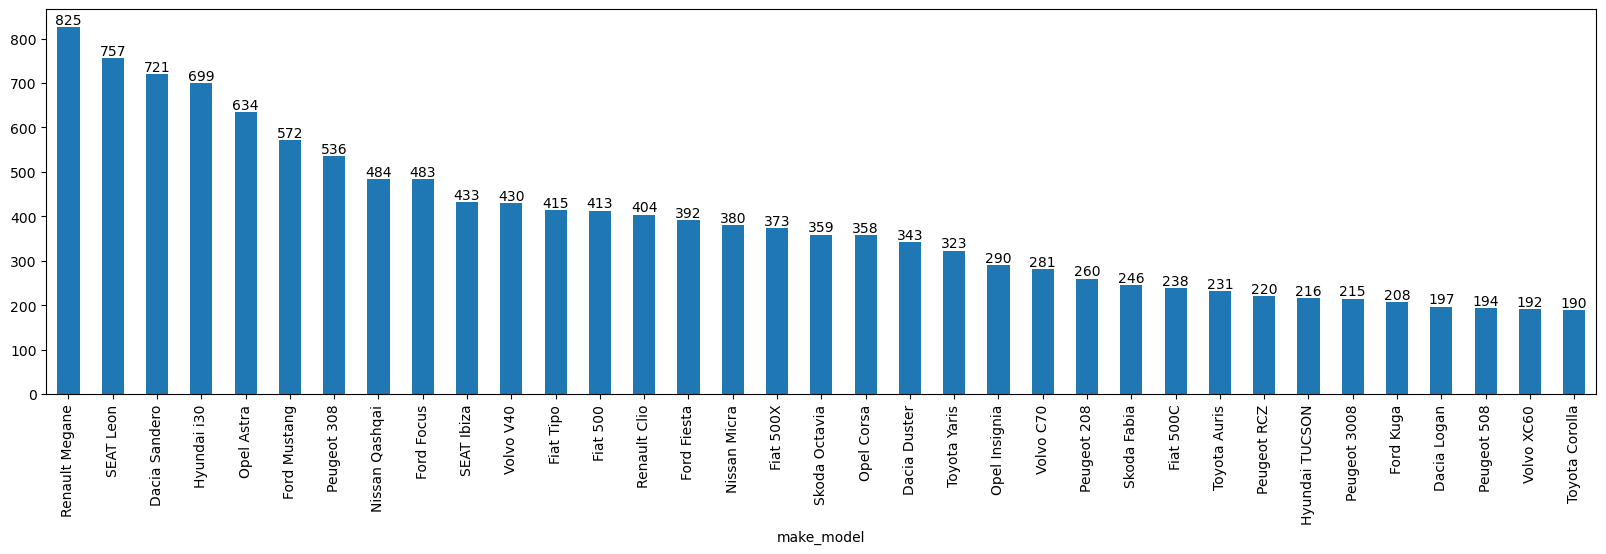

In [ ]:
ax = df.make_model.value_counts().iloc[:35].plot(kind ="bar", figsize=(20,5))

ax.bar_label(ax.containers[0]);

Bu kod parçacığı, veri çerçevesindeki en yaygın 35 araç modelinin gözlemlerini görselleştirmek için kullanılır:

df.make_model.value_counts().iloc[:35]: Bu, make_model sütunundaki her bir araç modelinin gözlem sayısını sayar ve en çok gözleme sahip ilk 35 modeli seçer.
.plot(kind="bar", figsize=(20,5)): Seçilen bu 35 modeli bir çubuk grafik (bar plot) olarak çizilir. Grafik genişliği 20, yüksekliği ise 5 birim olarak ayarlanır.
ax.bar_label(ax.containers[0]): Çubukların üzerine, her çubuğun yüksekliğini gösteren etiketler ekler. Bu, her modelin gözlem sayısını doğrudan grafikte görmenizi sağlar.
Sonuçta, bu grafik, veri setinizde en fazla gözleme sahip 35 araç modelini ve her birinin gözlem sayısını gösterir.

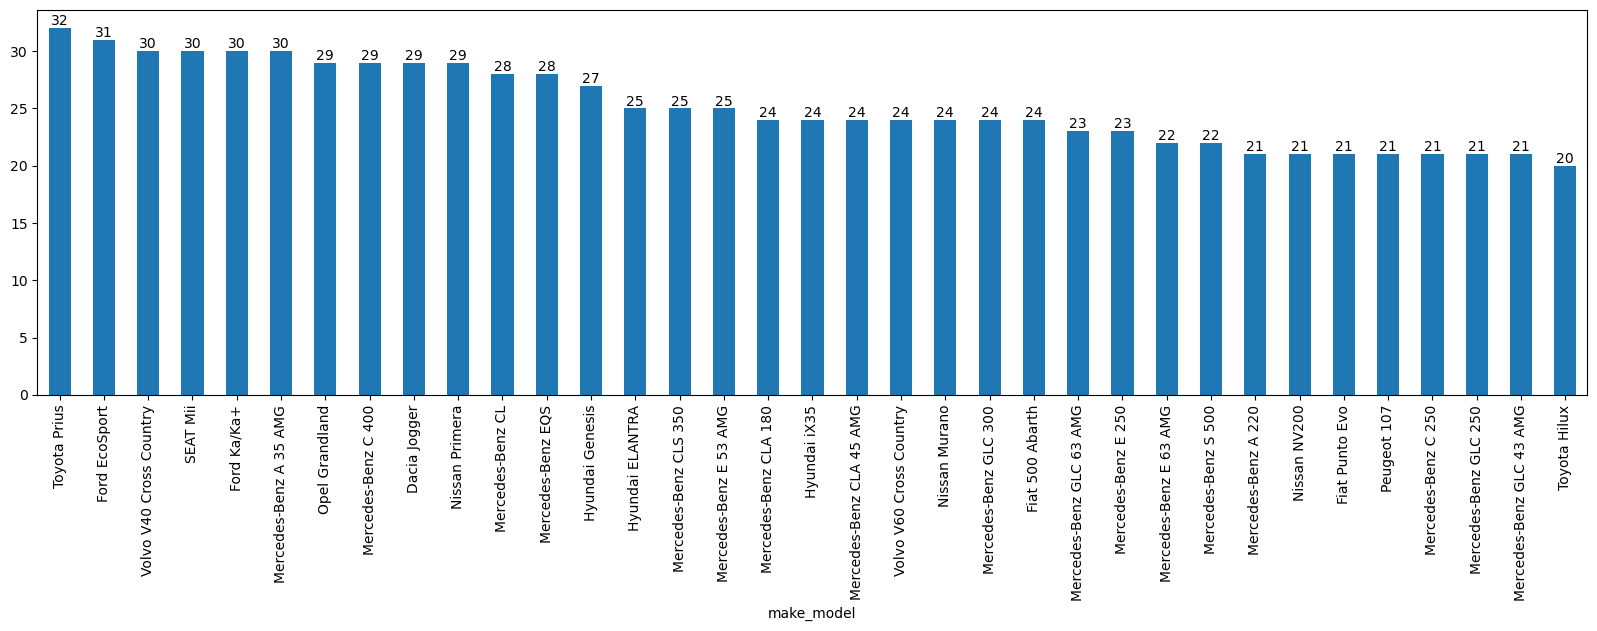

In [ ]:
ax = df.make_model.value_counts().iloc[-35:].plot(kind ="bar", figsize=(20,5))

ax.bar_label(ax.containers[0]);

Bu kod, veri setindeki en az gözleme sahip 35 araç modelini görselleştirmek için kullanılır:

df.make_model.value_counts().iloc[-35:]: Bu, make_model sütunundaki her bir araç modelinin gözlem sayısını sayar ve en az gözleme sahip son 35 modeli seçer.
.plot(kind="bar", figsize=(20,5)): Bu 35 aracı bir çubuk grafik (bar plot) olarak çizer. Grafik genişliği 20, yüksekliği ise 5 birim olarak ayarlanır.
ax.bar_label(ax.containers[0]): Çubukların üzerine, her çubuğun yüksekliğini gösteren etiketler ekler. Bu etiketler, her modelin gözlem sayısını doğrudan grafikte görmenizi sağlar.
Sonuç olarak, bu grafik, veri setinizde gözlem sayısı en düşük olan 35 araç modelini ve her birinin gözlem sayısını gösterir. Bu, veri setindeki nadir araç modellerinin dağılımını anlamanıza yardımcı olur.

In [ ]:
df2 = df.copy()

Bu kod, mevcut veri çerçevesi olan df'in bir kopyasını oluşturur ve bu kopyayı df2 olarak adlandırır. df.copy() komutunun amacı, df veri çerçevesindeki verileri değiştirmeden yeni bir veri çerçevesi üzerinde işlemler yapabilmektir. Yani, df2 üzerinde yapılan değişiklikler, df üzerinde herhangi bir değişikliğe yol açmaz. Bu yöntem, veri üzerinde deneyler yaparken veya dönüşümler gerçekleştirirken orijinal verilerin korunmasını sağlar.

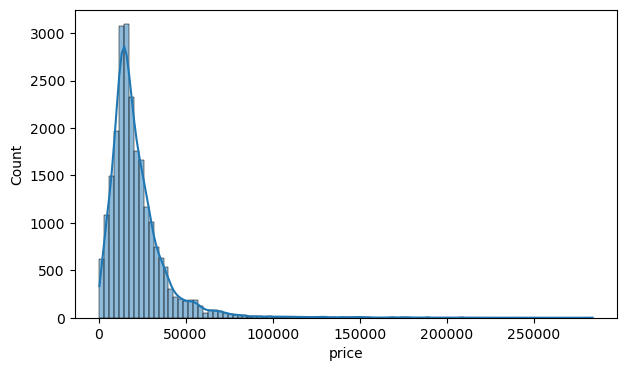

In [ ]:
sns.histplot(df.price, bins=100, kde=True);


Bu kod, df.price değişkeninin dağılımını göstermek için seaborn kütüphanesi kullanarak bir histogram ve yoğunluk tahmin (kde) grafiği oluşturur. Bu tür bir görselleştirme, verinin dağılımını anlamak ve aykırı değerleri (outlier'ları) belirlemek için oldukça faydalıdır.

Açıklama:

Histogram ve KDE (Kernel Density Estimate): Histogram, fiyatların belirli aralıklara göre dağılımını gösterirken, KDE, bu dağılımın sürekli bir tahminini sunar. İkisi birlikte kullanıldığında, veri kümesinin genel yapısını ve yoğunluk bölgelerini daha iyi anlayabiliriz.

Aykırı Değerler: Grafik, 70.000 EURO'nun üzerinde çok az araç olduğunu gösteriyor. Bu, bu fiyat aralığında yeterince veri bulunmadığını ve bu aralıktaki araçların modelleme için yetersiz olabileceğini gösteriyor. Yani, bu fiyat aralığında veri sayısı az olabilir ve bu durum, modelin bu aralıkta yeterince iyi performans göstermesine engel olabilir.

Karar Verme: Aykırı değerlerin veya az sayıda gözlemin model performansını nasıl etkilediğini anlamak için bu tür görselleştirmeleri kullanarak, bu veri noktalarını çıkarmak veya çıkarıp çıkarmamak gerektiğine karar verebiliriz. Ayrıca, modelin bu veri noktaları olmadan nasıl performans gösterdiğini değerlendirmek için eğitim sürecini tekrarlayabiliriz.

Grup Bazında Aykırı Değerler: Genel histogram tüm veriyi gösterirken, her bir araç modeline (Opel Astra, Ford Fiesta, Volvo S60 vb.) göre aykırı değerlerin belirlenmesi daha doğru olabilir. Yani, her model için ayrı histogramlar oluşturarak her bir modelin veri dağılımını ve potansiyel aykırı değerleri incelemek daha sağlıklı sonuçlar verebilir.

Bu yöntemler, modelin genel performansını ve güvenilirliğini artırmak için veri temizleme ve aykırı değerlerin belirlenmesi süreçlerinde kritik öneme sahiptir.

In [ ]:
skew(df.price)

3.739248483619921

Fiyat dağılımının çarpıklık (skew) değeri 3.74, verinin sağa doğru çarpık olduğunu, yani fiyatların çoğunun düşük değerlerde yoğunlaştığını ve yüksek fiyatların nadir olduğunu gösterir. Bu durum, modelinizin düşük fiyatlar üzerinde daha iyi öğrenebileceğini ancak yüksek fiyatları yeterince iyi temsil edemeyebileceğini belirtir. Ayrıca, yüksek çarpıklık dönüşüm tekniklerinin (örneğin log dönüşümü) uygulanmasını gerektirebilir ve aykırı değerlerin analiz edilmesi, modelin doğruluğunu artırabilir.

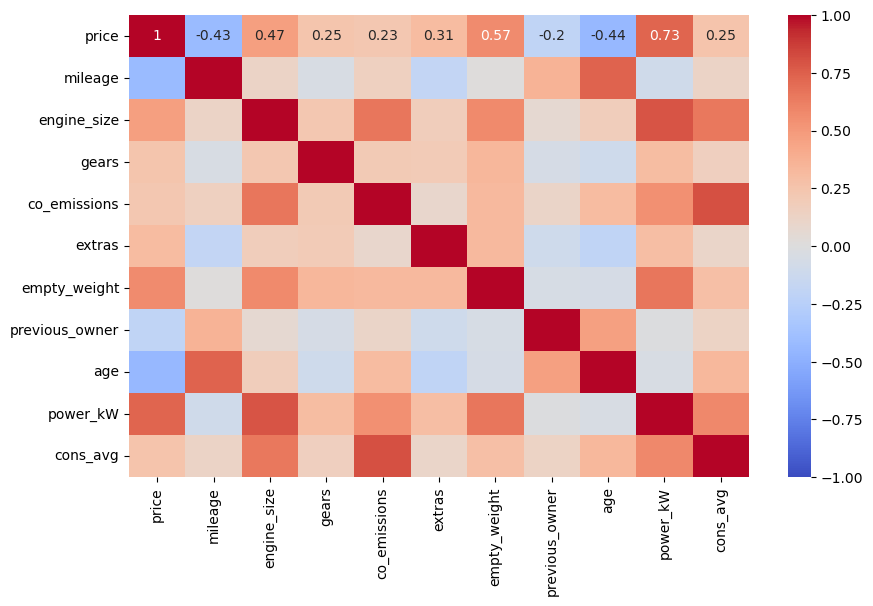

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot =True, cmap="coolwarm");

Bu kod parçası, bir ısı haritası (heatmap) oluşturarak veri çerçevesindeki sayısal değişkenler arasındaki korelasyonları görselleştirir. Isı haritası, değişkenler arasındaki ilişkiyi renkler aracılığıyla gösterir: kırmızı tonları yüksek pozitif korelasyonu, mavi tonları ise yüksek negatif korelasyonu temsil eder. Renk skalası, -1 (tam negatif korelasyon) ile 1 (tam pozitif korelasyon) arasında değişir. Her hücredeki sayılar, ilgili değişkenler arasındaki korelasyon katsayısını gösterir. Bu tür bir görselleştirme, hangi sayısal değişkenlerin birbirleriyle güçlü bir şekilde ilişkili olduğunu ve hangi değişkenlerin bağımsız olduğunu anlamanızı sağlar.

## multicollinearity control

In [ ]:
df.corr(numeric_only=True)[(abs(df.corr(numeric_only=True))>= 0.9) & (abs(df.corr(numeric_only=True)) < 1)] .any().any()


False

Bu kod parçası, sayısal değişkenler arasındaki yüksek korelasyonları kontrol ederek çoklu doğrusallığı (multicollinearity) tespit etmeyi amaçlar. İlk olarak, değişkenler arasındaki korelasyon matrisini hesaplar. Ardından, mutlak değeri 0.9 ile 1 arasında olan korelasyonları filtreler, bu da yüksek derecede pozitif veya negatif ilişki gösteren değerleri belirler. Son olarak, bu yüksek korelasyonlardan herhangi birinin olup olmadığını kontrol eder ve varsa, çoklu doğrusallık sorunlarının varlığını gösterir. Eğer yüksek korelasyonlar bulunursa, bu durum modelleme sürecinde dikkat edilmesi gereken bir veri sorununu işaret eder.

### VIF (Variance Inflation Factor) Score for Multicolliniearity

In [ ]:
# conda install -c anaconda statsmodels
# !pip install statsmodels


Bu komutlar, statsmodels kütüphanesini yüklemek için kullanılır. conda install -c anaconda statsmodels komutu, Anaconda dağıtımı üzerinden statsmodels kütüphanesini yüklerken, !pip install statsmodels komutu ise Python'un pip paket yöneticisini kullanarak kütüphaneyi yükler. Her iki komut da istatistiksel ve ekonomik modelleme için kullanılan statsmodels kütüphanesini kurarak, çeşitli regresyon analizi ve modelleme işlevlerine erişim sağlar.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


variance_inflation_factor (VIF), çoklu regresyon analizlerinde kullanılan bir ölçümdür ve her bir bağımsız değişkenin diğer bağımsız değişkenlerle olan yüksek korelasyonunu belirlemek için kullanılır. Bu, çoklu bağlantılılık (multicollinearity) sorunlarını teşhis etmekte yardımcı olur. Yüksek VIF değerleri, bir bağımsız değişkenin diğer bağımsız değişkenlerle yüksek derecede ilişkilendiğini ve bu durumun modelin tahmin gücünü etkileyebileceğini gösterir.

In [ ]:
df_numeric = df.select_dtypes(include ="number")
X_vif = df_numeric.drop(columns='price')
X_vif.head()

mileage  engine_size  gears  co_emissions  extras  empty_weight  \
0  18900.000     1991.000  8.000       162.000       1      1555.000   
1  18995.000     1991.000  7.000       169.000       1      1455.000   
2 197000.000     2143.000  7.000       162.000       1      1545.000   
3  83339.000     1595.000  7.000       134.000       3      1410.000   
4  48900.000     1991.000  7.000       141.000       2      1450.000   

   previous_owner   age  power_kW  cons_avg  
0           2.000 2.000   310.000     8.400  
1           2.000 2.000   225.000     7.300  
2           2.000 7.000   100.000     4.900  
3           3.000 4.000    90.000     6.100  
4           2.000 3.000   140.000     6.100


Bu kod parçasında, df veri çerçevesinden yalnızca sayısal türdeki veriler df_numeric olarak seçilmiştir. Ardından, price (fiyat) sütunu hariç tüm sayısal sütunlar X_vif adlı yeni bir veri çerçevesinde toplanmıştır. X_vif veri çerçevesi, modelleme ve çoklu bağlantılılık (multicollinearity) analizi için kullanılacak bağımsız değişkenleri içerir. Bu sütunlar arasında mileage (kilometre), engine_size (motor hacmi), gears (vites sayısı), co_emissions (CO emisyonları), extras (ekstra özellik sayısı), empty_weight (boş ağırlık), previous_owner (önceki sahip sayısı), age (yaş), power_kW (güç) ve cons_avg (ortalama yakıt tüketimi) bulunmaktadır. Bu veriler, çoklu bağlantılılığı değerlendirmek için VIF hesaplamaları yapılacak olan bağımsız değişkenleri temsil eder.

In [ ]:
df_vif = pd.DataFrame()
df_vif['features'] = X_vif.columns
df_vif

features
0         mileage
1     engine_size
2           gears
3    co_emissions
4          extras
5    empty_weight
6  previous_owner
7             age
8        power_kW
9        cons_avg

Bu kod parçasında, X_vif veri çerçevesindeki bağımsız değişkenler df_vif adlı yeni bir veri çerçevesinde liste haline getirilmiştir. df_vif veri çerçevesinde, features adında bir sütun oluşturulmuş olup, bu sütun X_vif'in tüm sütun adlarını içermektedir. Bu sütun, modelde kullanılacak olan bağımsız değişkenlerin isimlerini içeren bir liste sağlar ve değişkenler sırasıyla mileage (kilometre), engine_size (motor hacmi), gears (vites sayısı), co_emissions (CO emisyonları), extras (ekstra özellik sayısı), empty_weight (boş ağırlık), previous_owner (önceki sahip sayısı), age (yaş), power_kW (güç) ve cons_avg (ortalama yakıt tüketimi) olarak sıralanmıştır. Bu liste, değişkenlerin varyans enflasyon faktörü (VIF) hesaplamalarında kullanılacak olan sütunları temsil eder.

In [ ]:
variance_inflation_factor(X_vif.values, 0)

5.277887442436901

Bu kod, variance_inflation_factor fonksiyonunu kullanarak X_vif veri çerçevesindeki mileage özelliğinin varyans enflasyon faktörünü (VIF) hesaplar. variance_inflation_factor fonksiyonu, verilen bir özellik (bu durumda mileage) ile diğer tüm bağımsız değişkenler arasındaki ilişkiyi ölçen VIF değerini döndürür.

VIF, bir bağımsız değişkenin diğer bağımsız değişkenlerle ne kadar güçlü bir şekilde ilişkili olduğunu gösterir. Yüksek VIF değerleri, multikolinearitenin (yani, bağımsız değişkenler arasındaki yüksek korelasyon) varlığını işaret eder. Bu durumda, mileage özelliği ile diğer değişkenler arasındaki ilişki değerlendirilir.

In [ ]:
df_vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

Bu kod, variance_inflation_factor fonksiyonunu kullanarak, X_vif veri çerçevesindeki her bir özelliğin diğer özelliklerle olan ilişkisini ölçen VIF (Varyans Şişirme Faktörü) değerlerini hesaplar. Hesaplanan VIF değerleri, her bir özelliğin ne kadar fazla multikolineariteye sahip olduğunu gösterir ve bu değerler df_vif veri çerçevesine eklenir. Sonuç olarak, her bir özelliğin VIF değeriyle birlikte multikolinearite düzeyleri belirlenmiş olur.

In [ ]:
df_vif


features    VIF
0         mileage  5.278
1     engine_size 22.849
2           gears 18.180
3    co_emissions 23.139
4          extras  2.909
5    empty_weight 29.154
6  previous_owner  4.847
7             age  6.704
8        power_kW 14.845
9        cons_avg 24.850

df_vif veri çerçevesi, her bir özelliğin VIF (Varyans Şişirme Faktörü) değerlerini gösterir. VIF değerleri, özelliklerin diğer özelliklerle olan multikolinearitesini ölçer ve genellikle 1 ile 5 arasında olan değerler kabul edilebilir, ancak 5'in üzerindeki değerler dikkat gerektirir. Bu tabloda, engine_size, gears, co_emissions, empty_weight, power_kW ve cons_avg gibi özelliklerin VIF değerleri 10'un üzerinde, bu da bu özelliklerin yüksek derecede multikolineariteye sahip olduğunu gösterir. Bu durum, bu özelliklerin modelde doğruluğu etkileyebileceği ve dikkatli bir şekilde ele alınması gerektiği anlamına gelir. Bu yüzden, doğruluk ve model performansını artırmak için düzenleme tekniklerinin (örneğin, Lasso veya Ridge regresyonu) kullanılması önerilir.

## Outliers in Price Column

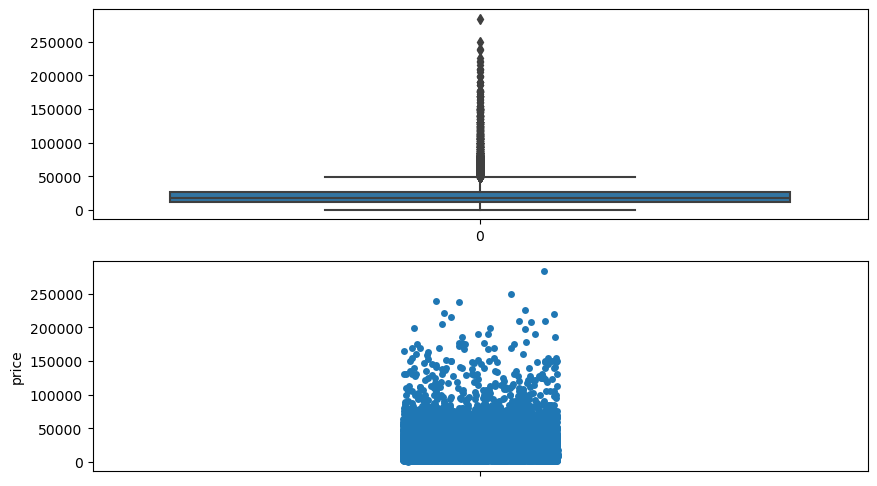

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(211)
sns.boxplot(df.price)

plt.subplot(212)
sns.stripplot(df.price);

Grafikte, üstteki boxplot, araç fiyatlarının dağılımını ve olası uç değerleri (outliers) görselleştirir. Boxplot, 50 bin EURO ve üzeri fiyatları uç değerler olarak gösterir. Ancak, alttaki stripplot, fiyatların dağılımını daha ayrıntılı bir şekilde gösterir ve 50 bin EURO civarındaki araçların sayısının aslında çok az olmadığını ortaya koyar. Bu iki grafik birlikte, genel fiyat dağılımı hakkında daha derin bir anlayış sağlar; ancak, uç değer analizi yaparken, verilerin gruplar bazında (örneğin, model bazında) incelenmesi gerektiğini belirtir.

In [ ]:
#conda install -c anaconda ipywidgets

Bu komut, conda paket yöneticisi kullanarak ipywidgets adlı Python kütüphanesini yükler.

In [ ]:
df[df.make_model=="Volvo V60"]

make_model     price      body_type            type warranty    mileage  \
22563  Volvo V60 10990.000  Station wagon            Used       No 239760.000   
22564  Volvo V60 43900.000  Station wagon            Used       No  92700.000   
22568  Volvo V60 42960.000  Station wagon            Used       No  63054.000   
22569  Volvo V60 10900.000  Station wagon            Used       No 172000.000   
22570  Volvo V60 27490.000  Station wagon            Used      Yes  94358.000   
22572  Volvo V60 32990.000  Station wagon            Used       No  67500.000   
22574  Volvo V60 38990.000  Station wagon            Used       No  52147.000   
22575  Volvo V60 33920.000  Station wagon            Used       No  78211.000   
22576  Volvo V60 20350.000  Station wagon            Used       No  81398.000   
22577  Volvo V60 17990.000  Station wagon            Used      Yes 139803.000   
22578  Volvo V60 38990.000  Station wagon            Used       No  69000.000   
22580  Volvo V60 49940.000  Station wagon   Demonstration      Yes  21000.000   
22581  Volvo V60 33999.000  Station wagon            Used      Yes  28400.000   
22582  Volvo V60 26900.000  Station wagon            Used       No 105000.000   
22584  Volvo V60 46880.000  Station wagon            Used      Yes  21946.000   
22585  Volvo V60 47450.000  Station wagon            Used       No  16714.000   
22586  Volvo V60 31990.000  Station wagon            Used      Yes  95689.000   
22587  Volvo V60 35940.000  Station wagon            Used      Yes  89759.000   
22588  Volvo V60 26950.000  Station wagon            Used       No  46990.000   
22589  Volvo V60 44500.000  Station wagon            Used      Yes   8500.000   
22590  Volvo V60 53990.000  Station wagon   Demonstration      Yes  54034.000   
22592  Volvo V60 18990.000  Station wagon            Used       No 191900.000   
22593  Volvo V60 46980.000  Station wagon            Used      Yes  18846.000   
22594  Volvo V60 22990.000  Station wagon            Used      Yes 111332.000   
22595  Volvo V60 29775.000  Station wagon            Used       No 104900.000   
22598  Volvo V60 23700.000  Station wagon            Used       No  88600.000   
22599  Volvo V60 12250.000  Station wagon            Used      Yes 120752.000   
22603  Volvo V60 36400.000  Station wagon            Used       No  25600.000   
22605  Volvo V60 35960.000  Station wagon            Used      Yes  31588.000   
22606  Volvo V60 26500.000  Station wagon            Used      Yes  74871.000   
22607  Volvo V60 34960.000  Station wagon            Used      Yes  49445.000   
22608  Volvo V60 28330.000  Station wagon            Used       No  48438.000   
22614  Volvo V60 24700.000  Station wagon            Used       No  88600.000   
22615  Volvo V60 45660.000  Station wagon            Used      Yes  15197.000   
22617  Volvo V60 35440.000  Station wagon            Used      Yes  66864.000   
22618  Volvo V60 18990.000  Station wagon            Used      Yes 126603.000   
22620  Volvo V60 58889.000  Station wagon            Used       No  42000.000   
22622  Volvo V60 59780.000  Station wagon            Used       No   2287.000   
22628  Volvo V60  7890.000  Station wagon            Used      Yes 247015.000   
22631  Volvo V60 42450.000  Station wagon            Used      Yes  62914.000   
22633  Volvo V60 36400.000  Station wagon            Used      Yes  23300.000   
22636  Volvo V60 36500.000  Station wagon            Used      Yes  72200.000   
22637  Volvo V60 28990.000  Station wagon            Used      Yes  51662.000   
22639  Volvo V60 35960.000  Station wagon            Used      Yes  30246.000   
22641  Volvo V60 54890.000  Station wagon            Used       No  20394.000   
22644  Volvo V60 48900.000  Station wagon            Used       No   7727.000   
22647  Volvo V60 29950.000  Station wagon            Used       No 116550.000   
22650  Volvo V60 34770.000  Station wagon            Used      Yes  65546.000   
22651  Volvo V60 52900.000  Station w


Bu komut, make_model özelliği "Volvo V60" olan satırları seçer ve bu araç modeline ait tüm verileri görüntüler. Eğer bu komutu çalıştırırsanız, "Volvo V60" modeline sahip araçların fiyat, kilometre, vites türü ve diğer özelliklerini içeren detaylı bir veri kümesini görürsünüz. Bu, belirli bir araç modelinin özelliklerini incelemek ve modelin genel veri yapısını anlamak için kullanışlıdır.

In [ ]:
from ipywidgets import interact

def box_strip(model):
    sns.boxplot(data = df[df.make_model==model],
                x= "make_model",
                y = "price",
                palette='bright')

    sns.stripplot(data = df[df.make_model==model],
                x= "make_model",
                y = "price",
                palette='Set1')
model = df.make_model.unique()
interact(box_strip, model=model);


interactive(children=(Dropdown(description='model', options=('Mercedes-Benz A 45 AMG', 'Mercedes-Benz A 35 AMG…


Bu kod, ipywidgets ve seaborn kütüphanelerini kullanarak etkileşimli bir görselleştirme sağlar. box_strip fonksiyonu, seçilen araç modeli için hem bir kutu grafiği (boxplot) hem de bir dağılım grafiği (stripplot) çizer. Kutu grafiği, fiyatların genel dağılımını ve uç değerleri gösterirken, dağılım grafiği ise her bir veri noktasını ayrıntılı olarak sunar. interact fonksiyonu, kullanıcıların bir açılır menü aracılığıyla araç modelleri arasında seçim yapabilmesini sağlar ve seçilen modele göre grafiği günceller. Bu etkileşimli araç, farklı araç modellerinin fiyat dağılımlarını ve olası uç değerlerini daha iyi anlamak için kullanışlıdır.

In [ ]:
df.make_model.unique()


array(['Mercedes-Benz A 45 AMG', 'Mercedes-Benz A 35 AMG',
       'Mercedes-Benz CLA 180', 'Mercedes-Benz A 220',
       'Mercedes-Benz A 200', 'Mercedes-Benz A 250',
       'Mercedes-Benz A 180', 'Mercedes-Benz GLC 220',
       'Mercedes-Benz E 220', 'Mercedes-Benz AMG GT', 'Mercedes-Benz EQS',
       'Mercedes-Benz CL', 'Mercedes-Benz E 350', 'Mercedes-Benz CLA 200',
       'Mercedes-Benz E 53 AMG', 'Mercedes-Benz SLK 200',
       'Mercedes-Benz E 400', 'Mercedes-Benz C 400',
       'Mercedes-Benz C 43 AMG', 'Mercedes-Benz C 63 AMG',
       'Mercedes-Benz C 300', 'Mercedes-Benz E 300',
       'Mercedes-Benz C 200', 'Mercedes-Benz E 200',
       'Mercedes-Benz C 180', 'Mercedes-Benz C 250',
       'Mercedes-Benz C 220', 'Mercedes-Benz E 250',
       'Mercedes-Benz S 500', 'Mercedes-Benz CLA 45 AMG',
       'Mercedes-Benz CLS 350', 'Mercedes-Benz GLC 43 AMG',
       'Mercedes-Benz GLC 63 AMG', 'Mercedes-Benz GLC 250',
       'Mercedes-Benz GLC 300', 'Mercedes-Benz E 63 AMG', 'Opel Cors

Veri setindeki make_model sütunu, her araç modelini temsil eder ve bu sütunda benzersiz araç modellerinin listesi bulunur. Bu liste, veri kümesindeki her araç modelinin adlarını içerir. Kod df.make_model.unique() kullanılarak, veri setindeki tüm benzersiz araç modelleri elde edilir. Bu liste, araç markaları ve modellerinin çeşitliliğini ve veri setinde hangi modellerin yer aldığını gösterir.

In [ ]:
df[df["make_model"]== "Mercedes-Benz A 180"]["price"]

9      24400.000
11      7450.000
14     29800.000
16     21000.000
17     26800.000
18     32900.000
21     21000.000
26     32950.000
29     18390.000
30     25900.000
31     25400.000
32     29900.000
33     14490.000
34     20630.000
35      8490.000
36     23850.000
38     29900.000
39     25900.000
40     16700.000
41     23850.000
42     27460.000
45     20630.000
46     21000.000
47     29900.000
49     25600.000
50     26850.000
52     25990.000
54     27800.000
55     29999.000
61     27900.000
64     27490.000
65     24780.000
66      9770.000
67     23850.000
70     31950.000
71     25000.000
72     14700.000
77      8950.000
91     10950.000
92     16750.000
95     12950.000
96     12445.000
102    14945.000
105    16950.000
114    19950.000
117     6400.000
118    13990.000
119    23990.000
120    16800.000
123    23990.000
130    27800.000
131    26850.000
132    31450.000
133    17944.000
136    23536.000
141    12245.000
144    27800.000
145    16945.000
147    26980.0

Bu kod, Mercedes-Benz A 180 modelinin fiyatlarını gösterir. Özellikle df[df["make_model"]== "Mercedes-Benz A 180"]["price"] ifadesi, sadece Mercedes-Benz A 180 modeline ait fiyatları içeren bir seriyi döndürür. Bu seriyi inceleyerek, bu modelin fiyat aralığını ve olası uç değerleri (outlier) belirlemeye çalışırız. Eğer bu modelin fiyatları belirgin şekilde farklılık gösteriyorsa, bu durum, veri kümesindeki bazı uç değerlerin analiz edilmesi gerektiğini gösterebilir.

In [ ]:
total_outliers = []

for model in df.make_model.unique():

    car_prices = df[df["make_model"]== model]["price"]

    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5*IQR
    upper_lim = Q3 + 1.5*IQR

    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()

    total_outliers.append(count_of_outliers)

    print(f" The count of outlier for {model:<24} : {count_of_outliers:<2},\
    The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))


 The count of outlier for Mercedes-Benz A 45 AMG   : 0 ,    The rate of outliers : 0.0
 The count of outlier for Mercedes-Benz A 35 AMG   : 0 ,    The rate of outliers : 0.0
 The count of outlier for Mercedes-Benz CLA 180    : 0 ,    The rate of outliers : 0.0
 The count of outlier for Mercedes-Benz A 220      : 0 ,    The rate of outliers : 0.0
 The count of outlier for Mercedes-Benz A 200      : 0 ,    The rate of outliers : 0.0
 The count of outlier for Mercedes-Benz A 250      : 4 ,    The rate of outliers : 0.091
 The count of outlier for Mercedes-Benz A 180      : 0 ,    The rate of outliers : 0.0
 The count of outlier for Mercedes-Benz GLC 220    : 4 ,    The rate of outliers : 0.114
 The count of outlier for Mercedes-Benz E 220      : 0 ,    The rate of outliers : 0.0
 The count of outlier for Mercedes-Benz AMG GT     : 1 ,    The rate of outliers : 0.015
 The count of outlier for Mercedes-Benz EQS        : 0 ,    The rate of outliers : 0.0
 The count of outlier for Mercedes-Be

Bu kod, her bir otomobil modeli için fiyatların uç değerlerini belirlemek amacıyla IQR (interquartile range) yöntemi kullanarak analiz yapar. Her model için, fiyatların alt ve üst sınırları hesaplanır ve bu sınırların dışında kalan fiyatlar uç değer olarak değerlendirilir. Kod, her modeldeki uç değerlerin sayısını ve oranını hesaplar, ardından toplam uç değer sayısını ve bu oranın tüm veri setine oranını raporlar. Sonuçlar, veri setinde toplam 559 uç değer olduğunu ve bu uç değerlerin tüm verilerin yaklaşık %2.4'ünü oluşturduğunu gösterir. Bu analiz, özellikle fiyatların belirli modellerde ne kadar yayılma gösterdiğini ve uç değerlerin hangi modellerde daha fazla olduğunu belirlemek için kullanılır.
1.5 whisker değerine göre, her bir grup için outlier (aykırı değer) olarak kabul ettiğimiz verileri belirliyoruz.

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.


Veri setinizi modelleme öncesinde eğitim ve test olarak ikiye ayırmanız gerekmektedir. Eğitim setiyle modelinizi eğittikten sonra, test seti üzerinde modelin performansını değerlendirirsiniz. Bu değerlendirme için çeşitli regresyon metrikleri (örneğin, MAE, MSE, R-squared) kullanabilirsiniz ve bu metrikleri bir fonksiyon aracılığıyla birlikte görüntüleyebilirsiniz. Ayrıca, modelin performansını daha güvenilir şekilde ölçmek için çapraz doğrulama (cross validation) yöntemini uygulayarak, farklı veri örnekleri üzerinde modelin başarımını değerlendirip sonuçların ortalamasını alabilirsiniz.

### OneHotEncoder

#### Example

In [ ]:
import sklearn
sklearn.__version__


'1.5.1'

scikit-learn sürüm 1.5.1, makine öğrenimi uygulamaları için kapsamlı araçlar sunar. Bu sürümde, veriyi eğitim ve test setlerine ayırabilir, çeşitli regresyon modellerini eğitebilir ve bu modellerin performansını çeşitli metriklerle değerlendirebilirsiniz. Ayrıca, çapraz doğrulama yöntemleri ile modelin farklı veri örneklerinde nasıl performans gösterdiğini test edebilir ve sonuçları ortalama skorlar ile değerlendirebilirsiniz.

In [ ]:
data = {"col": ['bad','worst','good', 'good', 'bad', "bed",'good', 'good', 'bad', "car"], "y": [1,2,3,4,5,6,7,8,9,10]}
data = pd.DataFrame(data)
data

col   y
0    bad   1
1  worst   2
2   good   3
3   good   4
4    bad   5
5    bed   6
6   good   7
7   good   8
8    bad   9
9    car  10

Bu veri seti, iki sütun içeriyor: col ve y. col sütunu, çeşitli niteliksel kategorileri temsil eden değerler ("bad", "worst", "good", "bed", "car") içerirken, y sütunu ise her kategoriye karşılık gelen sayısal değerleri (1'den 10'a kadar) gösteriyor. Veri çerçevesi, bu kategorik değerlerin sayısal bir hedef değişkenle ilişkisini incelemek amacıyla kullanılabilir.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[["col"]], data["y"], test_size=0.3, shuffle=False)


Bu kod parçası, veriyi eğitim ve test setlerine ayırmak için train_test_split fonksiyonunu kullanır. data[["col"]] ifadesi, col sütununu özellikler (özgüvenler) olarak belirlerken, data["y"] hedef değişkeni temsil eder. test_size=0.3 parametresi, verinin %30'unun test seti olarak ayrılmasını sağlar ve shuffle=False seçeneği verilerin karıştırılmadan sıralı bir şekilde bölünmesini garanti eder. Sonuç olarak, X_train ve X_test eğitim ve test setlerindeki özellikler, y_train ve y_test ise bu setlerdeki hedef değişken değerlerini temsil eder.

In [ ]:
X_train

col
0    bad
1  worst
2   good
3   good
4    bad
5    bed
6   good


X_train değişkeni, eğitim setindeki özellikleri içerir ve burada sadece col sütunu bulunur. Bu sütun, bad, worst, good, bed, ve car gibi kategorik değerleri içerir. Eğitim seti verisi, test setine ayrılmadan önce col sütununun değerlerini temsil eder ve bu özellikler modelin eğitilmesi sırasında kullanılır.

In [ ]:
X_test

col
7  good
8   bad
9   car


X_test değişkeni, test setindeki özellikleri içerir ve sadece col sütununu içerir. Bu sütun, good, bad, ve car gibi kategorik değerleri temsil eder. Test seti, modelin eğitiminden sonra performansını değerlendirmek için kullanılır ve col sütunundaki bu kategorik değerler, modelin genel tahmin yeteneğini test etmek amacıyla kullanılır.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")

OneHotEncoder sınıfı, kategorik verileri 0 ve 1'ler şeklinde dönüştürerek modelin bu verileri sayısal olarak işlemesini sağlar. Bu işlem, kategorik verilerdeki tüm benzersiz değerleri ayrı sütunlar halinde temsil eder. handle_unknown="ignore" parametresi, test setindeki eğitim setinde bulunmayan kategorilere sahip gözlemleri 0 olarak dönüştürür, böylece modelin bilinmeyen kategorilerle karşılaştığında hata vermesini engeller. sparse_output=False ve set_output(transform="pandas") ayarları ise dönüşümden sonra verileri pandas DataFrame olarak döndürür, bu da verilerin daha kolay işlenmesini sağlar. Bu yöntem, get_dummies() fonksiyonuna göre veri sızıntısını önler, çünkü OneHotEncoder yalnızca eğitim setinde gördüğü kategorilere göre dönüşüm yapar.
OneHotEncoder sınıfının sparse parametresi, sklearn 1.2 ve üzeri sürümlerde kullanımdan kaldırılmıştır. Bunun yerine sparse_output parametresi kullanılmalıdır. sparse_output=False ayarı, dönüşüm sonucunda verilerin dense (yoğun) bir biçimde, yani bir pandas DataFrame olarak döndürülmesini sağlar. Eğer sparse_output=True olursa, dönüşüm sonucunda veriler sparse (seyrek) matris formatında döner, bu da büyük veri setlerinde bellek tasarrufu sağlar ancak pandas DataFrame ile işlemek daha karmaşık olabilir.

In [ ]:
enc.fit_transform(X_train)


col_bad  col_bed  col_good  col_worst
0    1.000    0.000     0.000      0.000
1    0.000    0.000     0.000      1.000
2    0.000    0.000     1.000      0.000
3    0.000    0.000     1.000      0.000
4    1.000    0.000     0.000      0.000
5    0.000    1.000     0.000      0.000
6    0.000    0.000     1.000      0.000

enc.fit_transform(X_train) komutu, OneHotEncoder nesnesinin fit işlemini eğitim verisi üzerinde gerçekleştirip, aynı zamanda eğitim verisini dönüştürür. Eğitim verisinde bulunan her bir kategorik değer, OneHotEncoder tarafından ikili (0 ve 1) sütunlara dönüştürülür ve bu sütunlar, eğitim setindeki benzersiz kategorilere göre oluşturulur. Bu dönüşüm sonucu, her bir kategorik değere karşılık gelen yeni sütunlar (col_bad, col_bed, col_good, col_worst) elde edilir ve her gözlem için bu sütunlar 1 veya 0 değerlerini alır. Bu şekilde, kategorik veriler sayısal verilere dönüştürülerek modelleme için uygun hale getirilir. Dönüşüm, yalnızca eğitim setindeki benzersiz gözlemler dikkate alınarak yapılır, böylece test setinde eğitim setinde bulunmayan kategorilerle karşılaşıldığında hata oluşmaz.

In [ ]:
enc.transform(X_test)


col_bad  col_bed  col_good  col_worst
7    0.000    0.000     1.000      0.000
8    1.000    0.000     0.000      0.000
9    0.000    0.000     0.000      0.000


enc.transform(X_test) komutu, test setindeki kategorik verileri eğitim setine göre dönüştürür. Dönüşüm, yalnızca eğitim setindeki benzersiz kategorik değerler (bad, bed, good, worst) baz alınarak yapılır. Bu nedenle, test setinde hem eğitim setinde bulunan benzersiz kategorik değerler (bad, good) 1'e, hem de eğitim setinde bulunmayan kategorik değerler (car) 0'a dönüştürülür. Bu işlem, test setindeki kategorik gözlemleri, eğitim setinde öğrendiği verilere göre dönüştürerek, modelin eğitim sırasında gördüğü verilerle uyumlu hale getirir. Bu sayede, model eğitim verilerinde bulunmayan kategorik değerler nedeniyle hata yapmaz.

### OrdinalEncoder

#### Example

In [ ]:
data = {"col": ['bad','worst','good', 'good', 'bad', 'good', 'good', 'bad', "ugly", "worst"], "y": [1,2,3,4,5,6,7,8,9,10]}
data = pd.DataFrame(data)
data

col   y
0    bad   1
1  worst   2
2   good   3
3   good   4
4    bad   5
5   good   6
6   good   7
7    bad   8
8   ugly   9
9  worst  10


Veri setindeki kategorik değişkenlerin (örneğin col sütunu: 'bad', 'worst', 'good', 'ugly' gibi) her biri arasında hiyerarşik bir üstünlük (örneğin 'worst' en kötü, 'bad' kötü, 'good' iyi gibi) varsa, modelin bu gözlemleri kendi aralarındaki üstünlüğe göre değerlendirmesi için OrdinalEncoder dönüşüm algoritması kullanılır. OrdinalEncoder sayesinde model, her bir kategorik gözlemi sıralı bir biçimde değerlendirir ve böylece gözlemler arasındaki üstünlük veya sıralamayı dikkate alarak performansını artırabilir. Özellikle ağaç tabanlı modellerde, gözlemler arasında bir hiyerarşi olmasa bile, OrdinalEncoder kullanımı tavsiye edilir; çünkü bu tür modeller, kategorik değişkenleri sıralı sayılar olarak daha verimli işleyebilir.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[["col"]], data["y"], test_size=0.4, shuffle=False)

Bu kod, bir veri kümesini eğitim ve test olarak ikiye ayırıyor. train_test_split fonksiyonu kullanılarak, özellikler (X_train ve X_test) ve hedef değişkenler (y_train ve y_test) oluşturuluyor. Veri kümesi data içindeki "col" sütunu bağımsız değişken (X) olarak seçiliyor, "y" ise bağımlı değişken (y) olarak kullanılıyor. test_size=0.4 ifadesi, veri setinin %40'ının test verisi, %60'ının eğitim verisi olacağını belirtiyor. shuffle=False parametresi, verilerin karıştırılmadan sırayla bölünmesini sağlıyor.

In [ ]:
X_train

col
0    bad
1  worst
2   good
3   good
4    bad
5   good


X_train değişkeni, eğitim verilerini temsil eden bir DataFrame'dir ve "col" adlı tek bir sütunu içerir. Bu sütunda sırasıyla "bad", "worst", "good", "good", "bad", ve "good" değerleri yer almaktadır. Bu veriler, modelin öğrenmesi için kullanılan bağımsız değişkenlerdir. Verilerin 0'dan 5'e kadar olan indeksleri orijinal veri setinden alınmış olup, sıralı bir şekilde eğitim setine dahil edilmiştir.

In [ ]:
X_test

col
6   good
7    bad
8   ugly
9  worst


X_test değişkeni, test verilerini temsil eden bir DataFrame'dir ve "col" adlı tek bir sütundan oluşur. Bu sütunda "good", "bad", "ugly", ve "worst" değerleri sırasıyla indeksler 6, 7, 8 ve 9'a karşılık gelmektedir. Bu veriler, modelin eğitim sürecinde görmediği bağımsız değişkenlerdir ve modelin performansını test etmek için kullanılır. Veriler, shuffle=False parametresi nedeniyle orijinal sırayla test setine alınmıştır.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

categories = ['worst','bad','good']

enc_2 = OrdinalEncoder(categories=[categories], handle_unknown="use_encoded_value", unknown_value=-1).set_output(transform="pandas")


Bu kod, kategorik verileri sıralı bir şekilde sayısal değerlere dönüştürmek için OrdinalEncoder kullanıyor. Kategoriler 'worst', 'bad', ve 'good' olarak sıralanmış ve bu sıraya göre sayısal değerler atanıyor. Bilinmeyen kategorilerle karşılaşıldığında, unknown_value=-1 parametresi ile bu kategorilere -1 değeri atanıyor, böylece sıralamaya uymayan veriler işaretleniyor. Çıktı formatı Pandas DataFrame olarak ayarlanmış, bu sayede dönüşüm sonucu bir DataFrame olarak elde ediliyor.

In [ ]:
enc_2.fit_transform(X_train)

col
0 1.000
1 0.000
2 2.000
3 2.000
4 1.000
5 2.000

enc_2.fit_transform(X_train) ifadesi, X_train içindeki kategorik verileri sıralı bir şekilde sayısal değerlere dönüştürür. "worst", "bad" ve "good" kategorileri sırasıyla 0, 1 ve 2 olarak kodlanmıştır. Bu işlem sonucunda, "bad" değerleri 1, "worst" 0, ve "good" 2 olarak dönüştürülmüştür. Çünkü önceden tanımlanan sıralamaya göre "worst" en düşük, "good" en yüksek sıradadır. Bu kodlamada bilinmeyen kategori olmadığı için -1 değeri kullanılmamıştır.

In [ ]:
enc_2.transform(X_test)

col
6  2.000
7  1.000
8 -1.000
9  0.000


enc_2.transform(X_test) ifadesi, X_test verisindeki kategorik değerleri sıralı sayılara dönüştürür. Tanımlı kategoriler olan "good", "bad" ve "worst" sırasıyla 2.000, 1.000 ve 0.000 olarak kodlanırken, daha önce tanımlanmayan "ugly" kategorisine, unknown_value=-1 parametresi sayesinde -1.000 değeri atanmıştır. Bu şekilde bilinmeyen kategoriler işaretlenir.

### Train | Test Split

In [ ]:
X= df.drop(columns="price")
y= df.price


Bu kod, veri çerçevesi df'den hedef değişken olan "price" sütununu ayırır ve geri kalan tüm sütunları özellik matrisi olarak kullanır.

X = df.drop(columns="price"): df veri çerçevesinden "price" sütunu çıkarılarak geri kalan sütunlar özellik (bağımsız değişkenler) matrisi X olarak atanır.

y = df.price: "price" sütunu, hedef (bağımlı değişken) olarak y değişkenine atanır.

Sonuç olarak, X bağımsız değişkenleri, y ise hedef fiyat değerlerini içerir. Bu ayrım, genellikle makine öğrenmesi modellerinin eğitiminde kullanılır.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Bu kod, X ve y veri kümesini eğitim ve test setlerine böler:

X_train ve y_train: Eğitim setini oluşturan özellikler ve hedef değişkenlerdir.
X_test ve y_test: Test setini oluşturan özellikler ve hedef değişkenlerdir.
Parametreler:

test_size=0.2: Veri kümesinin %20'sinin test seti olarak ayrılacağını belirtir, geri kalan %80'i ise eğitim seti olarak kullanılır.
random_state=42: Sonuçların tekrar üretilebilir olmasını sağlamak için rastgelelik kontrol edilir. Aynı random_state değeri kullanıldığında, aynı veri bölünmesi elde edilir.
Bu işlem, modelin performansını değerlendirmek için veri kümesini ikiye böler: eğitim verileri modelin öğrenmesi için, test verileri ise modelin genel performansını değerlendirmek için kullanılır.

### Converting Object Features into Numerical Features Using Make Column Transformer

In [ ]:
df.select_dtypes(include="object").head(1)

make_model body_type  type warranty    gearbox fuel_type  \
0  Mercedes-Benz A 45 AMG   Compact  Used      Yes  Automatic   Benzine   

   seller drivetrain full_service_history         upholstery  \
0  Dealer        4WD                   No  Part/Full Leather   

  energy_efficiency_class comfort_&_convenience_Package  \
0             unefficient                      Standard   

  entertainment_&_media_Package    safety_&_security_Package  
0                      Standard  Safety Premium Plus Package

df.select_dtypes(include="object").head(1) kodu, df veri çerçevesindeki tüm kategorik (nesne türündeki) sütunları seçer ve ilk satırı gösterir. Bu satırda, aracın markası ve modeli, gövde tipi, durumu, garanti durumu, şanzıman tipi, yakıt türü, satıcı türü, sürüş tipi, servis geçmişi, döşeme türü, enerji verimliliği sınıfı gibi özellikler bulunmaktadır. Bu özellikler, genellikle metin verisi içerir ve modelleme öncesi işlem adımları için önemlidir.

In [ ]:
cat_onehot = ['make_model', 'body_type', 'warranty', 'gearbox', 'fuel_type', 'seller', 'drivetrain', 'full_service_history',
              'upholstery', 'energy_efficiency_class']
cat_ordinal = ['type', 'comfort_&_convenience_Package', 'entertainment_&_media_Package', 'safety_&_security_Package']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']



Bu kod, df veri çerçevesindeki kategorik özellikleri iki gruba ayırır: cat_onehot ve cat_ordinal. cat_onehot listesi, one-hot kodlama uygulanacak özellikleri içerir; bu, her kategoriyi ayrı bir sütun olarak kodlar. cat_ordinal listesi ise sıralı kodlama uygulanacak özellikleri içerir; burada kategorilere belirli bir sıralama atanır. Özellikle cat_for_type, cat_for_comfort, cat_for_ent, ve cat_for_safety listeleri, sıralı kodlama için kullanılan kategorilerin belirli bir sıralamasını tanımlar. Bu ayrım, modelin her bir özelliği nasıl kodlayacağını belirler ve sıralı kategoriler için sıralama sağlar, böylece model verileri doğru bir şekilde öğrenebilir.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
                        (OrdinalEncoder(categories= [cat_for_type,
                                                     cat_for_comfort,
                                                     cat_for_ent,
                                                     cat_for_safety]),cat_ordinal),
                         remainder='passthrough',
                         verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")


Bu kod, veri ön işleme adımlarını otomatikleştirmek için make_column_transformer fonksiyonunu kullanır. Özellikle, cat_onehot listesindeki kategorik özellikler için OneHotEncoder kullanılarak, bu özellikler one-hot kodlamasıyla dönüştürülür; handle_unknown="ignore" parametresi sayesinde, eğitim setinde bulunmayan test verileri sıfır olarak kodlanır. cat_ordinal listesindeki diğer kategorik özellikler ise, belirli bir sıralama düzenine göre OrdinalEncoder ile dönüştürülür. Bu sıralama, her özelliğin sıralı kodlama için belirlenen kategorilere göre yapılır. remainder='passthrough' parametresi, dönüşüm işlemi uygulanmayan diğer özelliklerin olduğu gibi bırakılacağını belirtir. verbose_feature_names_out=False ayarı, dönüşüm yapılan özelliklerin isimlerinin öneklerini kaldırarak daha temiz bir çıktı sağlar. Bu yapı, özellik dönüşümünü düzenli ve hatasız bir şekilde gerçekleştirir.

In [ ]:
X_train.head()

make_model         body_type            type warranty    mileage  \
16071    Nissan Micra           Compact  Pre-registered      Yes   3281.000   
16228     Nissan 370Z       Convertible            Used      Yes  47748.000   
2117       Opel Astra       Convertible            Used       No 160000.000   
22283      Volvo XC60  Off-Road/Pick-up            Used       No  58000.000   
17617  Nissan Qashqai             Sedan            Used      Yes  62096.000   

         gearbox fuel_type          seller  engine_size  gears  co_emissions  \
16071     Manual   Benzine          Dealer      999.000  5.000       104.000   
16228     Manual   Benzine          Dealer     3696.000  6.000       288.000   
2117      Manual   Benzine  Private seller     2198.000  5.000       197.000   
22283  Automatic   Benzine          Dealer     1969.000  8.000        49.000   
17617     Manual    Diesel          Dealer     1600.000  6.000       116.000   

      drivetrain  extras  empty_weight full_service_history  \
16071      Front       1      1076.000                   No   
16228       Rear       3      1610.000                   No   
2117        Rear       5      1393.000                   No   
22283        4WD      16      2169.000                  Yes   
17617      Front       1      1331.000                   No   

              upholstery  previous_owner energy_efficiency_class    age  \
16071              Cloth           1.000               efficient  1.000   
16228  Part/Full Leather           1.000             unefficient  3.000   
2117   Part/Full Leather           2.000               efficient 19.000   
22283  Part/Full Leather           1.000               efficient  4.000   
17617  Part/Full Leather           1.000               efficient  5.000   

       power_kW  cons_avg comfort_&_convenience_Package  \
16071    68.000     4.500                      Standard   
16228   245.000    10.900                      Standard   
2117    108.000     8.200                      Standard   
22283   298.000     2.100                       Premium   
17617    96.000     4.700                      Standard   

      entertainment_&_media_Package safety_&_security_Package  
16071                      Standard    Safety Premium Package  
16228                      Standard    Safety Premium Package  
2117                       Standard    Safety Premium Package  
22283                          Plus    Safety Premium Package  
17617                      Standard   Safety Standard Package

X_train.head() kodu, X_train veri çerçevesinin ilk birkaç satırını gösterir. Bu genellikle veri setindeki örneklerin nasıl göründüğünü ve dönüşüm işlemlerinin başarılı olup olmadığını kontrol etmek için kullanılır. Özellikle, X_train veri çerçevesinin başındaki ilk beş satır, tüm özelliklerin uygulanan dönüşümler sonrası nasıl düzenlendiğini ve formatlandığını gösterir.

Eğer veri dönüşümleri yapılmışsa, örneğin one-hot kodlama veya sıralı kodlama, bu dönüşümlerin X_train üzerindeki etkilerini burada görebilirsiniz.

In [ ]:
X_test.head()

make_model      body_type  type warranty    mileage  \
10810            SEAT Leon  Station wagon  Used      Yes 219000.000   
1288   Mercedes-Benz C 200          Sedan  Used      Yes 114673.000   
5535        Renault Megane          Sedan  Used      Yes  38022.000   
12655          Skoda Scala          Sedan  Used       No  35482.000   
8603             Fiat Tipo          Coupe  Used       No  90000.000   

         gearbox           fuel_type          seller  engine_size  gears  \
10810     Manual              Diesel          Dealer     1598.000  5.000   
1288   Automatic              Diesel          Dealer     1597.000  7.000   
5535   Automatic             Benzine          Dealer     1798.000  6.000   
12655  Automatic              Diesel          Dealer     1598.000  7.000   
8603      Manual  Liquid/Natural Gas  Private seller     1368.000  6.000   

       co_emissions drivetrain  extras  empty_weight full_service_history  \
10810       109.000      Front       1      1331.000                   No   
1288        136.000       Rear       9      1650.000                  Yes   
5535        161.000      Front       4      1315.000                  Yes   
12655       106.000      Front       2      1339.000                   No   
8603        117.000      Front       2      1395.000                   No   

              upholstery  previous_owner energy_efficiency_class   age  \
10810              Cloth           4.000             unefficient 8.000   
1288               Cloth           1.000               efficient 3.000   
5535               Cloth           2.000               efficient 4.000   
12655              Cloth           1.000               efficient 3.000   
8603   Part/Full Leather           1.000               efficient 5.000   

       power_kW  cons_avg comfort_&_convenience_Package  \
10810    77.000     3.800                      Standard   
1288    118.000     4.300                      Standard   
5535    206.000     6.900                      Standard   
12655    85.000     4.000                      Standard   
8603     88.000     4.600                      Standard   

      entertainment_&_media_Package safety_&_security_Package  
10810                      Standard    Safety Premium Package  
1288                           Plus    Safety Premium Package  
5535                       Standard    Safety Premium Package  
12655                          Plus    Safety Premium Package  
8603                           Plus    Safety Premium Package


X_test.head() komutu, X_test veri çerçevesinin ilk birkaç satırını gösterir. Bu, modelin test aşamasında kullanacağı veri kümesinin nasıl göründüğünü ve özelliklerin dönüştürülüp dönüştürülmediğini kontrol etmek için yararlıdır. X_test, eğitim sürecinde kullanılmayan ve modelin genel performansını değerlendirmek için ayrılmış veri kümesidir.

In [ ]:
X_train.shape, X_test.shape

((18587, 24), (4647, 24))

X_train.shape ve X_test.shape komutları, eğitim ve test veri setlerinin boyutlarını verir:

X_train.shape: (18587, 24) – Bu, X_train veri çerçevesinin 18,587 satır ve 24 sütun içerdiğini gösterir. Yani, eğitim setinde 18,587 örnek bulunur ve her örnek 24 özellik içerir.

X_test.shape: (4647, 24) – Bu, X_test veri çerçevesinin 4,647 satır ve 24 sütun içerdiğini gösterir. Yani, test setinde 4,647 örnek bulunur ve her örnek 24 özellik içerir.

Her iki veri seti de aynı sayıda özellik içerdiği için, modelin hem eğitim hem de test aşamalarında aynı özellikleri kullanarak değerlendirme yapılabilir.

In [ ]:
column_trans.fit_transform(X_train).head()

make_model_Dacia Dokker  make_model_Dacia Duster  \
16071                    0.000                    0.000   
16228                    0.000                    0.000   
2117                     0.000                    0.000   
22283                    0.000                    0.000   
17617                    0.000                    0.000   

       make_model_Dacia Jogger  make_model_Dacia Lodgy  \
16071                    0.000                   0.000   
16228                    0.000                   0.000   
2117                     0.000                   0.000   
22283                    0.000                   0.000   
17617                    0.000                   0.000   

       make_model_Dacia Logan  make_model_Dacia Sandero  \
16071                   0.000                     0.000   
16228                   0.000                     0.000   
2117                    0.000                     0.000   
22283                   0.000                     0.000   
17617                   0.000                     0.000   

       make_model_Dacia Spring  make_model_Fiat 124 Spider  \
16071                    0.000                       0.000   
16228                    0.000                       0.000   
2117                     0.000                       0.000   
22283                    0.000                       0.000   
17617                    0.000                       0.000   

       make_model_Fiat 500  make_model_Fiat 500 Abarth  make_model_Fiat 500C  \
16071                0.000                       0.000                 0.000   
16228                0.000                       0.000                 0.000   
2117                 0.000                       0.000                 0.000   
22283                0.000                       0.000                 0.000   
17617                0.000                       0.000                 0.000   

       make_model_Fiat 500L  make_model_Fiat 500X  make_model_Fiat 500e  \
16071                 0.000                 0.000                 0.000   
16228                 0.000                 0.000                 0.000   
2117                  0.000                 0.000                 0.000   
22283                 0.000                 0.000                 0.000   
17617                 0.000                 0.000                 0.000   

       make_model_Fiat Panda  make_model_Fiat Punto  \
16071                  0.000                  0.000   
16228                  0.000                  0.000   
2117                   0.000                  0.000   
22283                  0.000                  0.000   
17617                  0.000                  0.000   

       make_model_Fiat Punto Evo  make_model_Fiat Tipo  \
16071                      0.000                 0.000   
16228                      0.000                 0.000   
2117                       0.000                 0.000   
22283                      0.000                 0.000   
17617                      0.000                 0.000   

       make_model_Ford EcoSport  make_model_Ford Edge  make_model_Ford Fiesta  \
16071                     0.000                 0.000                   0.000   
16228                     0.000                 0.000                   0.000   
2117                      0.000                 0.000                   0.000   
22283                     0.000                 0.000                   0.000   
17617                     0.000                 0.000                   0.000   

       make_model_Ford Focus  make_model_Ford Ka/Ka+  make_model_Ford Kuga  \
16071                  0.000                   0.000                 0.000   
16228                  0.000                   0.000                 0.000   
2117                   0.000                   0.000                 0.000   
22283                  0.000                   0.000                 0.000   
17617                  0.000                   0.000                 0.000   

       

column_trans adlı bir ColumnTransformer nesnesinin fit_transform metoduyla X_train veri setinin dönüştürülmüş halini göstermektedir. Bu veri seti, kategorik ve sayısal özelliklerin bir karışımını içeriyor ve dönüştürme işlemi sonrasında şu anda yalnızca sayısal değerleri görüyorum. İşte genel bir özet:

Özniteliklerin Dönüştürülmesi: column_trans.fit_transform(X_train) işlemi, verileri dönüştürürken bir ColumnTransformer kullanıldığını gösterir. Bu işlem genellikle kategorik verileri sayısal verilere dönüştürür, örneğin one-hot encoding (tekil sıcak kodlama) yöntemini kullanarak kategorik özellikler için yeni sütunlar oluşturur. Sayısal özellikler ise normalleştirilmiş veya standartlaştırılmış olabilir.

Veri Çerçevesinin Yapısı:

Veriler, genellikle sıfır ve birler ile temsil edilen çok sayıda sütun içerir. Bu durum, one-hot encoding kullanımını işaret eder; yani, her bir kategorik değişken için ayrı bir sütun oluşturulmuş ve uygun olanlar için 1 değeri, diğerleri için 0 değeri verilmiştir.
Sayısal veriler de mevcuttur ve belirli özelliklerin sayısal değerleri bu sütunlarda yer alır. Örneğin, mileage, engine_size, power_kW gibi özellikler burada görünür.
Örnekler:

Her bir satır, belirli bir aracın özelliklerini temsil eder. Örneğin, ilk satırda birçok sütunda değerler 0, bir sütunda ise 1 olarak verilmiş. Bu durum, araç modelinin bu kategoriye ait olduğunu gösterir. Aynı şekilde diğer sayısal değerler de araçla ilgili çeşitli bilgileri sunar (örneğin, mileage - kilometre, engine_size - motor hacmi).
Sonuç olarak, fit_transform işleminden sonra, verileriniz hem sayısal hem de kategorik özelliklerin makine öğrenimi algoritmalarına uygun hale getirilmiş bir formatta. Her sütun, özelliklerin belirli bir temsilini içerir ve bu da modelin eğitiminde kullanılacak temizlik ve düzenlemeyi sağlar.








In [ ]:
X_train_trans = column_trans.fit_transform(X_train)
X_test_trans = column_trans.transform(X_test)

Kodda, X_train ve X_test veri kümesine ön işleme uygulamak için column_trans kullanılıyor. X_train_trans elde etmek için fit_transform() yöntemi kullanılarak, eğitim verisindeki istatistikler veya dönüşüm parametreleri hesaplanır ve eğitim verisi bu parametrelerle dönüştürülür. Bu dönüşümler, özelliklerin ölçeklenmesi, kodlanması veya başka bir şekilde işlenmesini içerir. Ardından, test verisi transform() yöntemiyle aynı dönüşümlerle işlenir, ancak bu sefer eğitim verisindeki hesaplamalar kullanılır, böylece test verisiyle eğitim verisi arasında tutarlılık sağlanır. Bu yöntemler, modelin yalnızca eğitim verisine dayanarak öğrenmesini ve test verisindeki aşırı uyumu önler.

In [ ]:
X_train_trans.shape, X_test_trans.shape # 24 features --> 110 features

((18587, 214), (4647, 214))


Veri kümenizdeki özellik sayısının 24'ten 214'e çıkmış olması, dönüşüm işlemlerinin oldukça kapsamlı bir etki yarattığını gösteriyor. Başlangıçta 24 özelliğe sahip olan veriniz, yapılan ön işleme ve özellik mühendisliği işlemleri sonucu önemli ölçüde genişlemiş. Bu genişleme, genellikle kategorik değişkenlerin one-hot encoding ile dönüştürülmesi, etkileşimli özelliklerin eklenmesi veya diğer dönüşüm tekniklerinin uygulanması gibi nedenlerle gerçekleşir. Sonuç olarak, bu süreç, modelinizin daha fazla özelliği analiz etmesini ve potansiyel olarak daha detaylı öngörüler yapmasını sağlar. Ancak, çok sayıda özelliğin olması, modelin karmaşıklığını artırabilir ve bu durum, performans iyileştirmeleri için özellik seçimi veya boyut indirgeme yöntemlerinin kullanılmasını gerektirebilir.

In [ ]:
X_train_trans.head()

make_model_Dacia Dokker  make_model_Dacia Duster  \
16071                    0.000                    0.000   
16228                    0.000                    0.000   
2117                     0.000                    0.000   
22283                    0.000                    0.000   
17617                    0.000                    0.000   

       make_model_Dacia Jogger  make_model_Dacia Lodgy  \
16071                    0.000                   0.000   
16228                    0.000                   0.000   
2117                     0.000                   0.000   
22283                    0.000                   0.000   
17617                    0.000                   0.000   

       make_model_Dacia Logan  make_model_Dacia Sandero  \
16071                   0.000                     0.000   
16228                   0.000                     0.000   
2117                    0.000                     0.000   
22283                   0.000                     0.000   
17617                   0.000                     0.000   

       make_model_Dacia Spring  make_model_Fiat 124 Spider  \
16071                    0.000                       0.000   
16228                    0.000                       0.000   
2117                     0.000                       0.000   
22283                    0.000                       0.000   
17617                    0.000                       0.000   

       make_model_Fiat 500  make_model_Fiat 500 Abarth  make_model_Fiat 500C  \
16071                0.000                       0.000                 0.000   
16228                0.000                       0.000                 0.000   
2117                 0.000                       0.000                 0.000   
22283                0.000                       0.000                 0.000   
17617                0.000                       0.000                 0.000   

       make_model_Fiat 500L  make_model_Fiat 500X  make_model_Fiat 500e  \
16071                 0.000                 0.000                 0.000   
16228                 0.000                 0.000                 0.000   
2117                  0.000                 0.000                 0.000   
22283                 0.000                 0.000                 0.000   
17617                 0.000                 0.000                 0.000   

       make_model_Fiat Panda  make_model_Fiat Punto  \
16071                  0.000                  0.000   
16228                  0.000                  0.000   
2117                   0.000                  0.000   
22283                  0.000                  0.000   
17617                  0.000                  0.000   

       make_model_Fiat Punto Evo  make_model_Fiat Tipo  \
16071                      0.000                 0.000   
16228                      0.000                 0.000   
2117                       0.000                 0.000   
22283                      0.000                 0.000   
17617                      0.000                 0.000   

       make_model_Ford EcoSport  make_model_Ford Edge  make_model_Ford Fiesta  \
16071                     0.000                 0.000                   0.000   
16228                     0.000                 0.000                   0.000   
2117                      0.000                 0.000                   0.000   
22283                     0.000                 0.000                   0.000   
17617                     0.000                 0.000                   0.000   

       make_model_Ford Focus  make_model_Ford Ka/Ka+  make_model_Ford Kuga  \
16071                  0.000                   0.000                 0.000   
16228                  0.000                   0.000                 0.000   
2117                   0.000                   0.000                 0.000   
22283                  0.000                   0.000                 0.000   
17617                  0.000                   0.000                 0.000   

       

Veri kümenizde, her bir satır bir otomobilin özelliklerini temsil etmektedir ve her özelliğin sütunlarda gösterildiği oldukça geniş bir veri setiniz var. Özellikler, araçların markalarını, modellerini, gövde tiplerini, garanti durumlarını, şanzıman türlerini, yakıt türlerini, satış türlerini, sürüş türlerini ve daha birçok faktörü içerir. Bunun yanı sıra, araçların kilometre bilgisi, motor büyüklüğü, güç, ağırlık gibi sayısal veriler ve enerji verimliliği gibi kategorik bilgiler de bulunmaktadır. Her araç için bu özelliklerin bir veya birkaçını 0 veya 1 şeklinde gösteren bir dizi sütun bulunur. Örneğin, bir araç "Dacia Sandero" markasına sahip olabilir ve "Automatic" şanzıman, "Diesel" yakıt türü gibi belirli özelliklere sahip olabilir. Veri setindeki bu geniş özellik yelpazesi, araçların çeşitli yönlerini ve özelliklerini kapsamlı bir şekilde temsil eder, böylece modelleme ve analizler sırasında daha derinlemesine bilgi sağlanabilir.

In [ ]:
X_test_trans.head()

make_model_Dacia Dokker  make_model_Dacia Duster  \
10810                    0.000                    0.000   
1288                     0.000                    0.000   
5535                     0.000                    0.000   
12655                    0.000                    0.000   
8603                     0.000                    0.000   

       make_model_Dacia Jogger  make_model_Dacia Lodgy  \
10810                    0.000                   0.000   
1288                     0.000                   0.000   
5535                     0.000                   0.000   
12655                    0.000                   0.000   
8603                     0.000                   0.000   

       make_model_Dacia Logan  make_model_Dacia Sandero  \
10810                   0.000                     0.000   
1288                    0.000                     0.000   
5535                    0.000                     0.000   
12655                   0.000                     0.000   
8603                    0.000                     0.000   

       make_model_Dacia Spring  make_model_Fiat 124 Spider  \
10810                    0.000                       0.000   
1288                     0.000                       0.000   
5535                     0.000                       0.000   
12655                    0.000                       0.000   
8603                     0.000                       0.000   

       make_model_Fiat 500  make_model_Fiat 500 Abarth  make_model_Fiat 500C  \
10810                0.000                       0.000                 0.000   
1288                 0.000                       0.000                 0.000   
5535                 0.000                       0.000                 0.000   
12655                0.000                       0.000                 0.000   
8603                 0.000                       0.000                 0.000   

       make_model_Fiat 500L  make_model_Fiat 500X  make_model_Fiat 500e  \
10810                 0.000                 0.000                 0.000   
1288                  0.000                 0.000                 0.000   
5535                  0.000                 0.000                 0.000   
12655                 0.000                 0.000                 0.000   
8603                  0.000                 0.000                 0.000   

       make_model_Fiat Panda  make_model_Fiat Punto  \
10810                  0.000                  0.000   
1288                   0.000                  0.000   
5535                   0.000                  0.000   
12655                  0.000                  0.000   
8603                   0.000                  0.000   

       make_model_Fiat Punto Evo  make_model_Fiat Tipo  \
10810                      0.000                 0.000   
1288                       0.000                 0.000   
5535                       0.000                 0.000   
12655                      0.000                 0.000   
8603                       0.000                 1.000   

       make_model_Ford EcoSport  make_model_Ford Edge  make_model_Ford Fiesta  \
10810                     0.000                 0.000                   0.000   
1288                      0.000                 0.000                   0.000   
5535                      0.000                 0.000                   0.000   
12655                     0.000                 0.000                   0.000   
8603                      0.000                 0.000                   0.000   

       make_model_Ford Focus  make_model_Ford Ka/Ka+  make_model_Ford Kuga  \
10810                  0.000                   0.000                 0.000   
1288                   0.000                   0.000                 0.000   
5535                   0.000                   0.000                 0.000   
12655                  0.000                   0.000                 0.000   
8603                   0.000                   0.000                 0.000   

       


Tablodaki veriler, otomobil fiyat tahmin modeli için kullanılan çeşitli özellikleri içermektedir. Her bir satır bir araç örneğini temsil eder ve her sütun bu araçların belirli özelliklerini veya kategorilerini belirtir. Özellikler, araç markası ve modelinden motor özelliklerine, şanzıman türünden yakıt tipine kadar geniş bir yelpazeyi kapsar. Ayrıca, aracın garanti durumu, bakım geçmişi, iç döşeme türü gibi ek bilgiler de vardır. Sayısal değerler ise aracın yaşını, motor hacmini, kilometreyi, güç değerlerini ve diğer teknik özellikleri ifade eder. Veriler, modelin eğitiminde kullanılmak üzere, araçların farklı özelliklerini ve durumlarını belirten bir dizi kategori ve ölçüm içermektedir.

In [ ]:
X_train_trans.join(y_train).corr()

make_model_Dacia Dokker  \
make_model_Dacia Dokker                                1.000   
make_model_Dacia Duster                               -0.006   
make_model_Dacia Jogger                               -0.002   
make_model_Dacia Lodgy                                -0.003   
make_model_Dacia Logan                                -0.005   
make_model_Dacia Sandero                              -0.009   
make_model_Dacia Spring                               -0.002   
make_model_Fiat 124 Spider                            -0.003   
make_model_Fiat 500                                   -0.007   
make_model_Fiat 500 Abarth                            -0.002   
make_model_Fiat 500C                                  -0.005   
make_model_Fiat 500L                                  -0.003   
make_model_Fiat 500X                                  -0.006   
make_model_Fiat 500e                                  -0.002   
make_model_Fiat Panda                                 -0.003   
make_model_Fiat Punto                                 -0.002   
make_model_Fiat Punto Evo                             -0.002   
make_model_Fiat Tipo                                  -0.007   
make_model_Ford EcoSport                              -0.002   
make_model_Ford Edge                                  -0.002   
make_model_Ford Fiesta                                -0.006   
make_model_Ford Focus                                 -0.007   
make_model_Ford Ka/Ka+                                -0.002   
make_model_Ford Kuga                                  -0.005   
make_model_Ford Mondeo                                -0.004   
make_model_Ford Mustang                               -0.008   
make_model_Ford Puma                                  -0.002   
make_model_Ford Ranger                                -0.002   
make_model_Hyundai BAYON                              -0.002   
make_model_Hyundai Coupe                              -0.002   
make_model_Hyundai ELANTRA                            -0.002   
make_model_Hyundai Genesis                            -0.002   
make_model_Hyundai IONIQ                              -0.003   
make_model_Hyundai KONA                               -0.003   
make_model_Hyundai SANTA FE                           -0.002   
make_model_Hyundai TUCSON                             -0.005   
make_model_Hyundai VELOSTER                           -0.002   
make_model_Hyundai i10                                -0.003   
make_model_Hyundai i20                                -0.004   
make_model_Hyundai i30                                -0.009   
make_model_Hyundai i40                                -0.003   
make_model_Hyundai iX20                               -0.002   
make_model_Hyundai iX35                               -0.002   
make_model_Mercedes-Benz A 180                        -0.004   
make_model_Mercedes-Benz A 200                        -0.003   
make_model_Mercedes-Benz A 220                        -0.001   
make_model_Mercedes-Benz A 250                        -0.002   
make_model_Mercedes-Benz A 35 AMG                     -0.002   
make_model_Mercedes-Benz A 45 AMG                     -0.003   
make_model_Mercedes-Benz AMG GT                       -0.003   
make_model_Mercedes-Benz C 180                        -0.002   
make_model_Mercedes-Benz C 200                        -0.003   
make_model_Mercedes-Benz C 220                        -0.003   
make_model_Mercedes-Benz C 250                        -0.001   
make_model_Mercedes-Benz C 300                        -0.002   
make_model_Mercedes-Benz C 400                        -0.002   
make_model_Mercedes-Benz C 43 AMG                     -0.002   
make_model_Mercedes-Benz C 63 AMG                     -0.002   
make_model_Mercedes-Benz CL                           -0.002   
make_model_Mercedes-Benz CLA 180                      -0.002   
make_model_Mercedes-Benz CLA 200                      -0.002   
make_model_Mercedes-Benz CLA 45 AMG                   -0.002   
make_

X_train_trans.join(y_train).corr() komutu, X_train_trans veri çerçevesi ile y_train hedef değişkenini birleştirip bu birleşim üzerinden tüm değişkenler arasındaki korelasyonları hesaplar. Sonuç olarak, her bir özellik ile diğer özellikler ve hedef değişken arasındaki ilişkinin gücünü ve yönünü gösteren bir korelasyon matrisi elde edilir. Bu matris, hangi özelliklerin hedef değişkenle daha güçlü bir ilişkiye sahip olduğunu belirlemeye ve modelinizin hangi özelliklere daha fazla odaklanması gerektiğini anlamanıza yardımcı olur.

In [ ]:
import plotly.express as px

corr = X_train_trans.join(y_train).corr()
fig = px.imshow(corr,width=1000, height=1000)
fig.show()

Kod, X_train_trans ve y_train veri çerçevelerini birleştirip aralarındaki korelasyon matrisini hesaplar ve plotly.express kütüphanesi ile bu korelasyon matrisini görselleştiren bir ısı haritası (heatmap) oluşturur. px.imshow(corr, width=1000, height=1000) komutu, korelasyon matrisini görselleştiren bir grafik oluşturur ve bu grafik, her bir değişken arasındaki korelasyonları renkler aracılığıyla gösterir. Grafik, değişkenler arasındaki ilişkilerin güçlü veya zayıf olduğunu ve hangi değişkenlerin hedef değişkenle daha yakın bir ilişkiye sahip olduğunu anlamayı kolaylaştırır.

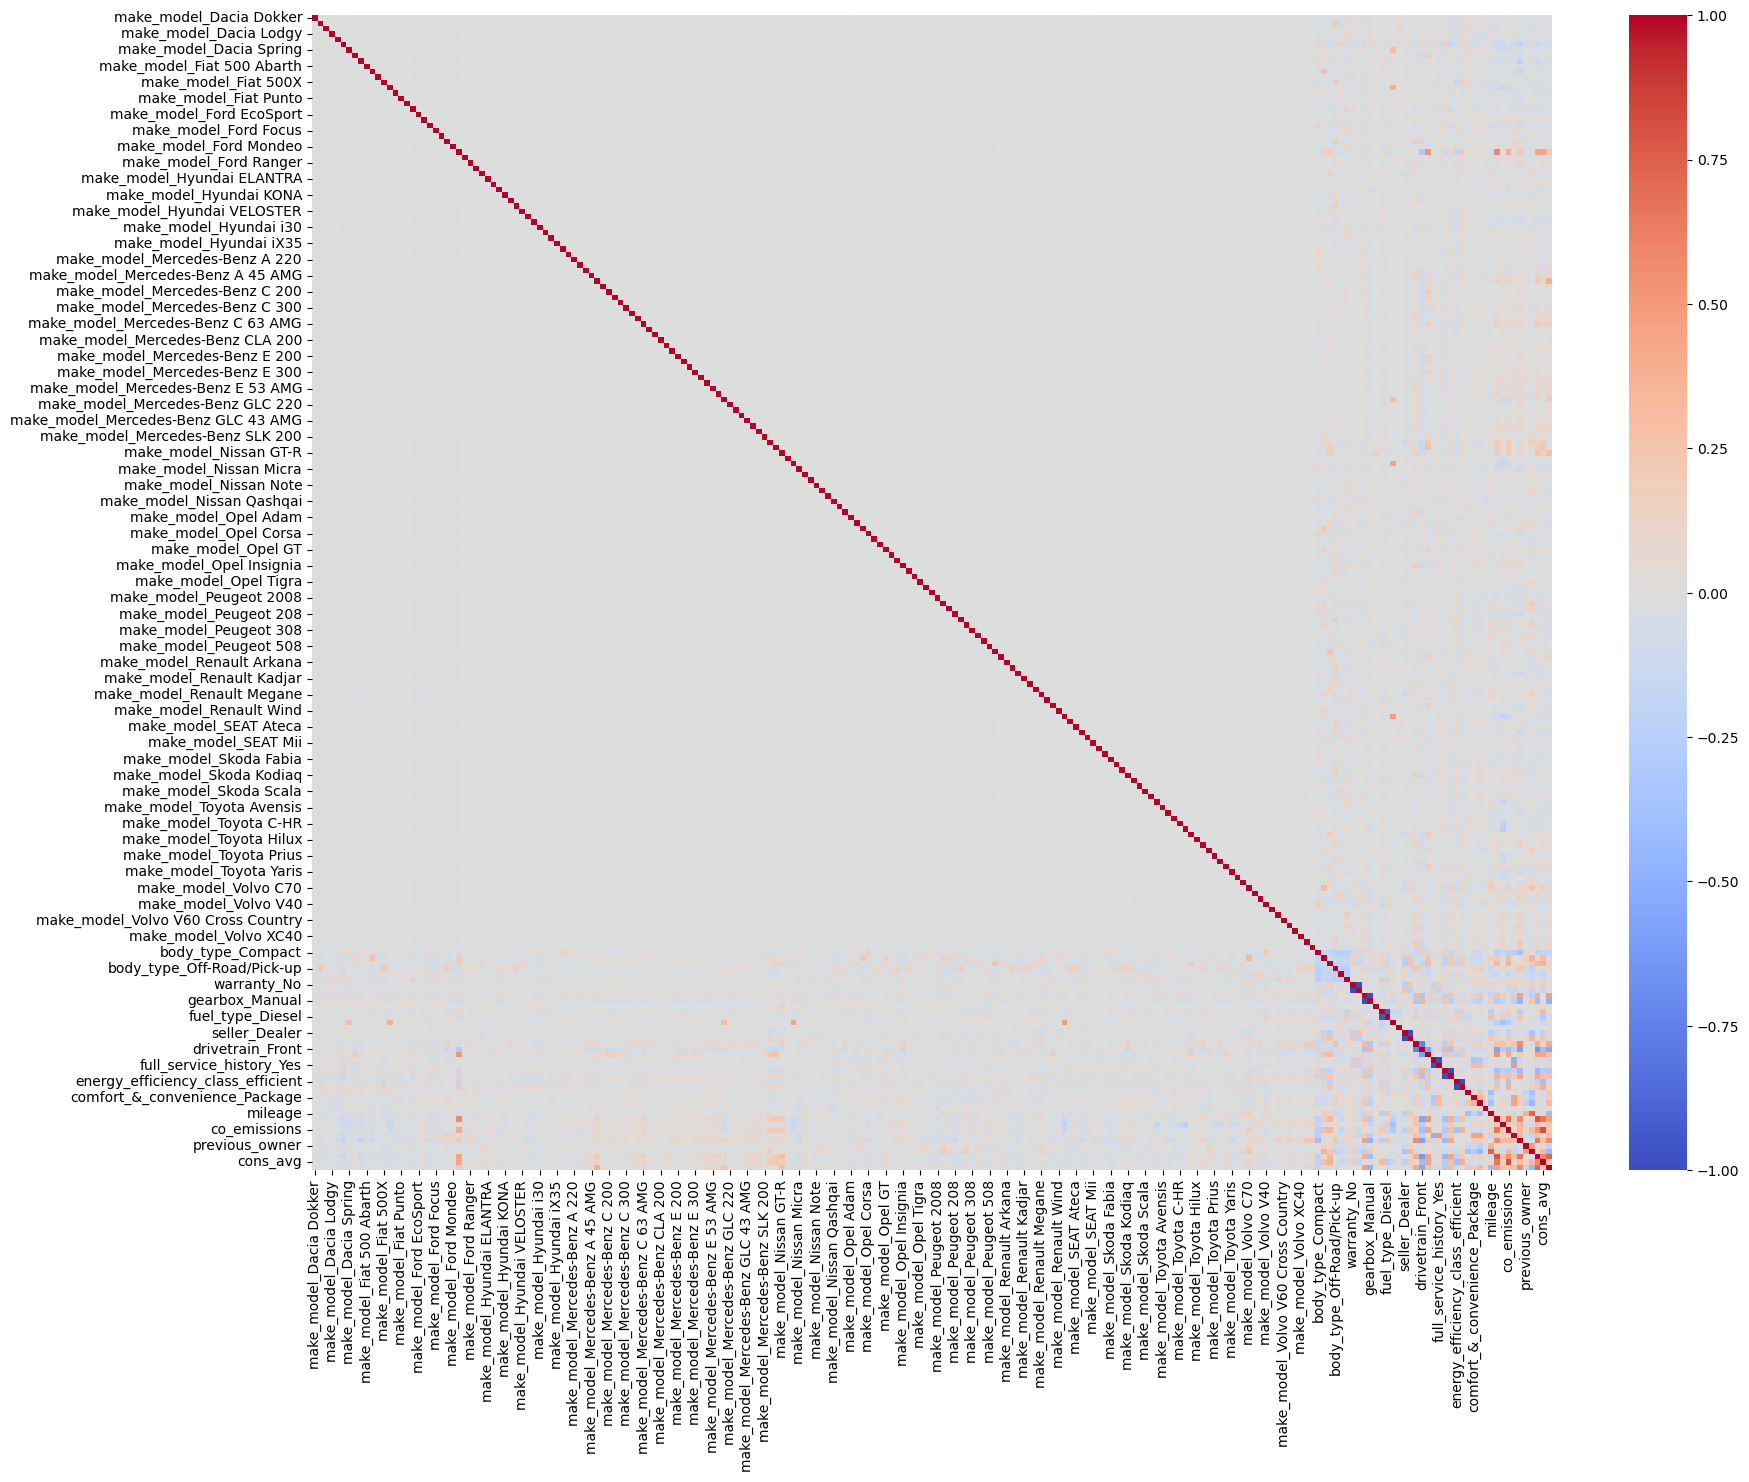

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(X_train_trans.join(y_train).corr(), vmin=-1, vmax=1, cmap="coolwarm");


Bu kod parçası, X_train_trans ve y_train veri çerçevelerinin korelasyon matrisini bir ısı haritası (heatmap) olarak görselleştirir. plt.figure(figsize=(20,15)) ile görselleştirmenin boyutları ayarlanır ve sns.heatmap() fonksiyonu, korelasyon matrisini renkli bir harita olarak gösterir. vmin=-1 ve vmax=1 ayarları, korelasyon değerlerinin -1 ile 1 arasında bir renk skalasında gösterilmesini sağlar. cmap="coolwarm" renk paleti, düşük korelasyonları soğuk tonlarda ve yüksek korelasyonları sıcak tonlarda gösterir. Bu, değişkenler arasındaki ilişkileri ve hedef değişkenle olan bağlantıları hızlıca analiz etmeye yardımcı olur.

### Scaling

In [ ]:
scaler = MinMaxScaler().set_output(transform="pandas")
scaler.fit(X_train_trans)

X_train_scaled = scaler.transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)


Bu kod parçası, verileri standart bir ölçekleme işlemine tabi tutar. İlk olarak, MinMaxScaler sınıfı kullanılarak bir ölçekleyici (scaler) oluşturulur. Bu ölçekleyici, verileri 0 ile 1 arasına ölçeklemek için kullanılır ve .set_output(transform="pandas") metodu ile sonuçların pandas veri çerçevesi formatında döndürülmesi sağlanır.

scaler.fit(X_train_trans) komutu, X_train_trans eğitim verilerini kullanarak ölçekleyiciyi eğitir, yani veri setindeki değerlerin minimum ve maksimum değerlerini belirler.

Sonrasında, scaler.transform(X_train_trans) ile eğitim verileri (X_train_trans) ve scaler.transform(X_test_trans) ile test verileri (X_test_trans) ölçeklenir. Bu işlem sonucunda, veriler 0 ile 1 arasında normalize edilerek X_train_scaled ve X_test_scaled veri çerçevelerine aktarılır. Bu, modelin daha iyi performans göstermesine yardımcı olabilir, çünkü ölçeklenmiş veriler genellikle makine öğrenimi algoritmalarının daha etkili çalışmasına olanak tanır.

In [ ]:
X_train_scaled.head()

make_model_Dacia Dokker  make_model_Dacia Duster  \
16071                    0.000                    0.000   
16228                    0.000                    0.000   
2117                     0.000                    0.000   
22283                    0.000                    0.000   
17617                    0.000                    0.000   

       make_model_Dacia Jogger  make_model_Dacia Lodgy  \
16071                    0.000                   0.000   
16228                    0.000                   0.000   
2117                     0.000                   0.000   
22283                    0.000                   0.000   
17617                    0.000                   0.000   

       make_model_Dacia Logan  make_model_Dacia Sandero  \
16071                   0.000                     0.000   
16228                   0.000                     0.000   
2117                    0.000                     0.000   
22283                   0.000                     0.000   
17617                   0.000                     0.000   

       make_model_Dacia Spring  make_model_Fiat 124 Spider  \
16071                    0.000                       0.000   
16228                    0.000                       0.000   
2117                     0.000                       0.000   
22283                    0.000                       0.000   
17617                    0.000                       0.000   

       make_model_Fiat 500  make_model_Fiat 500 Abarth  make_model_Fiat 500C  \
16071                0.000                       0.000                 0.000   
16228                0.000                       0.000                 0.000   
2117                 0.000                       0.000                 0.000   
22283                0.000                       0.000                 0.000   
17617                0.000                       0.000                 0.000   

       make_model_Fiat 500L  make_model_Fiat 500X  make_model_Fiat 500e  \
16071                 0.000                 0.000                 0.000   
16228                 0.000                 0.000                 0.000   
2117                  0.000                 0.000                 0.000   
22283                 0.000                 0.000                 0.000   
17617                 0.000                 0.000                 0.000   

       make_model_Fiat Panda  make_model_Fiat Punto  \
16071                  0.000                  0.000   
16228                  0.000                  0.000   
2117                   0.000                  0.000   
22283                  0.000                  0.000   
17617                  0.000                  0.000   

       make_model_Fiat Punto Evo  make_model_Fiat Tipo  \
16071                      0.000                 0.000   
16228                      0.000                 0.000   
2117                       0.000                 0.000   
22283                      0.000                 0.000   
17617                      0.000                 0.000   

       make_model_Ford EcoSport  make_model_Ford Edge  make_model_Ford Fiesta  \
16071                     0.000                 0.000                   0.000   
16228                     0.000                 0.000                   0.000   
2117                      0.000                 0.000                   0.000   
22283                     0.000                 0.000                   0.000   
17617                     0.000                 0.000                   0.000   

       make_model_Ford Focus  make_model_Ford Ka/Ka+  make_model_Ford Kuga  \
16071                  0.000                   0.000                 0.000   
16228                  0.000                   0.000                 0.000   
2117                   0.000                   0.000                 0.000   
22283                  0.000                   0.000                 0.000   
17617                  0.000                   0.000                 0.000   

       

X_train_scaled.head() komutu, ölçeklenmiş eğitim veri setinin ilk birkaç satırını görüntüler. Burada kullanılan head() metodu, varsayılan olarak veri çerçevesinin ilk 5 satırını gösterir. Bu, verilerin doğru bir şekilde ölçeklenip ölçeklenmediğini ve sonuçların beklenen biçimde olup olmadığını kontrol etmek için kullanılır. Özellikle, verilerin 0 ile 1 arasında ölçeklendiğini doğrulamak amacıyla bu tür bir görüntüleme yapılır.

In [ ]:
X_test_scaled.head()

make_model_Dacia Dokker  make_model_Dacia Duster  \
10810                    0.000                    0.000   
1288                     0.000                    0.000   
5535                     0.000                    0.000   
12655                    0.000                    0.000   
8603                     0.000                    0.000   

       make_model_Dacia Jogger  make_model_Dacia Lodgy  \
10810                    0.000                   0.000   
1288                     0.000                   0.000   
5535                     0.000                   0.000   
12655                    0.000                   0.000   
8603                     0.000                   0.000   

       make_model_Dacia Logan  make_model_Dacia Sandero  \
10810                   0.000                     0.000   
1288                    0.000                     0.000   
5535                    0.000                     0.000   
12655                   0.000                     0.000   
8603                    0.000                     0.000   

       make_model_Dacia Spring  make_model_Fiat 124 Spider  \
10810                    0.000                       0.000   
1288                     0.000                       0.000   
5535                     0.000                       0.000   
12655                    0.000                       0.000   
8603                     0.000                       0.000   

       make_model_Fiat 500  make_model_Fiat 500 Abarth  make_model_Fiat 500C  \
10810                0.000                       0.000                 0.000   
1288                 0.000                       0.000                 0.000   
5535                 0.000                       0.000                 0.000   
12655                0.000                       0.000                 0.000   
8603                 0.000                       0.000                 0.000   

       make_model_Fiat 500L  make_model_Fiat 500X  make_model_Fiat 500e  \
10810                 0.000                 0.000                 0.000   
1288                  0.000                 0.000                 0.000   
5535                  0.000                 0.000                 0.000   
12655                 0.000                 0.000                 0.000   
8603                  0.000                 0.000                 0.000   

       make_model_Fiat Panda  make_model_Fiat Punto  \
10810                  0.000                  0.000   
1288                   0.000                  0.000   
5535                   0.000                  0.000   
12655                  0.000                  0.000   
8603                   0.000                  0.000   

       make_model_Fiat Punto Evo  make_model_Fiat Tipo  \
10810                      0.000                 0.000   
1288                       0.000                 0.000   
5535                       0.000                 0.000   
12655                      0.000                 0.000   
8603                       0.000                 1.000   

       make_model_Ford EcoSport  make_model_Ford Edge  make_model_Ford Fiesta  \
10810                     0.000                 0.000                   0.000   
1288                      0.000                 0.000                   0.000   
5535                      0.000                 0.000                   0.000   
12655                     0.000                 0.000                   0.000   
8603                      0.000                 0.000                   0.000   

       make_model_Ford Focus  make_model_Ford Ka/Ka+  make_model_Ford Kuga  \
10810                  0.000                   0.000                 0.000   
1288                   0.000                   0.000                 0.000   
5535                   0.000                   0.000                 0.000   
12655                  0.000                   0.000                 0.000   
8603                   0.000                   0.000                 0.000   

       

X_test_scaled.head() komutu, ölçeklenmiş test veri setinin ilk birkaç satırını gösterir. Bu komut, test veri setindeki verilerin MinMaxScaler kullanılarak 0 ile 1 arasına nasıl dönüştürüldüğünü görmek için kullanılır. head() metodu, genellikle veri çerçevesinin ilk 5 satırını görüntüler ve bu sayede test verisinin ölçekleme işleminden sonra doğru bir şekilde dönüştürülüp dönüştürülmediğini kontrol etmek mümkündür.

## Implement Linear Regression

 - Import the modul
 - Fit the model
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics

*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

Modülü İçe Aktarma:

İlk olarak, gerekli kütüphaneleri içe aktarmamız gerekiyor. scikit-learn'ün LinearRegression modeli ve performans ölçütlerini kullanacağız.
Modeli Eğitim Verilerine Uygulama (Fit):

LinearRegression modelinin bir örneğini oluşturup, eğitim verileri (X_train ve y_train) ile modelimizi eğiteceğiz.
Test Setini Tahmin Etme:

Eğittiğimiz modeli kullanarak, test setindeki (X_test) veriler için tahminlerde bulunacağız.
Özellik Katsayılarını Belirleme:

Modelin öğrenme sürecinde elde ettiği katsayıları inceleyerek, her özelliğin hedef değişken üzerindeki etkisini belirleyeceğiz.
Model Performansını Değerlendirme:

Modelin performansını değerlendirmek için regresyon performans ölçütlerini (örneğin, R^2 skoru, Ortalama Kare Hata (MSE), Ortalama Mutlak Hata (MAE)) ve çapraz doğrulama sonuçlarını (cross_val_score) kullanacağız.
Farklı Değerlendirme Ölçütlerini Karşılaştırma:

Farklı performans ölçütlerinin sonuçlarını karşılaştırarak modelimizin hangi açılardan iyi veya kötü performans gösterdiğini anlayacağız.

In [1]:
def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : mean_squared_error(y_train, y_train_pred, squared=False),
    "mape" :mean_absolute_percentage_error(y_train, y_train_pred)},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : mean_squared_error(y_test, y_pred, squared=False),
    "mape" :mean_absolute_percentage_error(y_test, y_pred)}}

    return pd.DataFrame(scores)

Bu train_val fonksiyonu, bir regresyon modelinin eğitim ve test setleri üzerindeki performansını değerlendirir ve çeşitli regresyon performans ölçütleri ile sonuçları döndürür.

Fonksiyon, öncelikle modelin test ve eğitim setleri üzerindeki tahminlerini yapar. Daha sonra, her iki set için de aşağıdaki performans ölçütlerini hesaplar:

R^2 Skoru: Modelin hedef değişkenin varyansını ne kadar açıkladığını gösterir.
Ortalama Mutlak Hata (MAE): Tahminlerin gerçek değerlerden ne kadar uzak olduğunu gösterir.
Ortalama Kare Hata (MSE): Tahmin hatalarının karelerinin ortalamasını verir; büyük hataları daha fazla cezalandırır.
Karekök Ortalama Kare Hata (RMSE): MSE'nin karekökü olup, hata birimlerini orijinal veriyle aynı birimde verir.
Ortalama Mutlak Yüzde Hata (MAPE): Tahmin hatalarının gerçek değerlere oranının ortalamasını verir ve yüzdesel bir hata ölçüsüdür.
Sonuçlar, hem eğitim hem de test setleri için ayrı ayrı hesaplanır ve bir sözlük içinde düzenlenir. Fonksiyon, bu performans ölçütlerini içeren bir DataFrame döndürerek modelin eğitim ve test aşamalarındaki başarısını karşılaştırmanıza yardımcı olur.








In [3]:
90from sklearn.linear_model import LinearRegression
lm = LinearRegression()
m.fit(X_train_scaled, y_train)

Bu işlem sonucunda, model X_train_scaled veri kümesi kullanılarak eğitilmiş olur ve y_train hedef değişkenleriyle ilişkili doğrusal bir model öğrenir. Model, daha sonra test verileri üzerinde tahminler yapmak için kullanılabilir.








In [ ]:
pd.options.display.float_format = '{:.3f}'.format
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)


İlk satırda, pandas kütüphanesinin veri çerçevelerinde kayan noktalı sayıları üç ondalık basamakla gösterecek şekilde formatlanır. İkinci satırda ise train_val adlı bir fonksiyon çağrılarak, lm adlı makine öğrenmesi modeli kullanılarak eğitim (X_train_scaled, y_train) ve test (X_test_scaled, y_test) veri setleriyle modelin eğitilmesi ve doğrulanması yapılır. Bu, modelin öğrenme ve performans değerlendirme süreçlerini gerçekleştirir.

### Adjusted R2 Score

In [ ]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0] # number of observations
    p = X.shape[1] # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


Bu fonksiyon, modelin performansını değerlendirirken Düzeltilmiş R^2 Skoru'nu hesaplamak için kullanılır.
Düzeltilmiş R^2 skoru, özellikle verilerde çok fazla özellik varsa ama yeterince gözlem yoksa, ya da birçok yeni özellik (örneğin, dummy değişkenler) eklenmişse, R^2 skorunda yanıltıcı bir iyileşme olabilir. Bu durumlarda, düzeltilmiş R^2 skoru daha gerçekçi bir değerlendirme sunar. Özellikle gözlem sayısı ile özellik sayısı arasında büyük bir dengesizlik varsa, düzeltilmiş R^2 skoru ciddi şekilde düşebilir ve modelin performansını daha doğru bir şekilde yansıtabilir.
Fonksiyonun içeriği şöyle çalışır:

r2_score(y_test, y_pred) ile modelin R^2 skorunu hesaplar. Bu skor, modelin açıklayıcı gücünü ölçer.
n değişkeni, gözlem sayısını (yani veri setindeki satır sayısını) belirtir.
p değişkeni, bağımsız değişken sayısını belirtir.
adj_r2 değişkeni, düzeltilmiş R^2 skorunu hesaplar. Bu hesaplama, modelin açıklayıcı gücünü, gözlem sayısı ile özellik sayısının oranını dikkate alarak daha doğru bir şekilde değerlendirir.

In [ ]:
y_pred = lm.predict(X_test_scaled)

Bu kod satırı, lm modelini kullanarak test verileri (X_test_scaled) üzerinde tahminler yapar ve bu tahminleri y_pred değişkenine atar. Daha sonra, y_pred değişkenini yukarıda tanımladığımız Düzeltilmiş R^2 Skoru fonksiyonunda kullanmak üzere alırız. Yani, modelin test verileri üzerindeki tahmin sonuçlarını, modelin performansını daha doğru bir şekilde değerlendirmek için bu fonksiyona girdi olarak veririz.

In [ ]:
adj_r2(y_test, y_pred, X_test_scaled)

Bu kod satırı, daha önce tanımladığınız Düzeltilmiş R^2 Skoru fonksiyonunu kullanarak modelin performansını değerlendirir. adj_r2(y_test, y_pred, X_test_scaled) ifadesi, y_test (gerçek test değerleri), y_pred (modelin tahminleri) ve X_test_scaled (test verileri) parametrelerini fonksiyona geçirir.

Fonksiyon, bu parametreleri kullanarak düzeltilmiş R^2 skorunu hesaplar ve bu skoru döndürür. Düzeltilmiş R^2 skoru, modelin tahmin performansını ve özellik sayısına göre modelin ne kadar iyi genelleme yaptığını değerlendirir. Sonuç olarak, modelin test veri setindeki performansını daha gerçekçi bir şekilde ölçmüş olursunuz.

### Cross Validate

In [ ]:
model = LinearRegression()

scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error',
                                'neg_mean_absolute_percentage_error'],
                        cv =10,
                        return_train_score=True,
                        # return_indices=True
                       )


Bu kod, bir Linear Regression modelini kullanarak çapraz doğrulama (cross-validation) yapar. cross_validate fonksiyonu, modelin performansını 10 katlı çapraz doğrulama ile değerlendirir ve beş farklı performans metriği hesaplar: R^2 skoru, negatif ortalama mutlak hata (MAE), negatif ortalama kare hata (MSE), negatif karekök ortalama kare hata (RMSE), ve negatif ortalama mutlak yüzde hata (MAPE). return_train_score=True parametresi, hem eğitim hem de doğrulama (test) setleri için skorların döndürülmesini sağlar. return_indices=True seçeneği ise her iterasyonda eğitim ve doğrulama verilerinin indekslerini döndürür, ancak bu satır yorumlanmış durumda; yani kodda aktif değil. Bu çapraz doğrulama işlemi, modelin aşırı uyum (overfitting) yapıp yapmadığını kontrol etmek için eğitim ve doğrulama skorlarını karşılaştırmaya olanak tanır.

In [ ]:
pd.DataFrame(scores)


Bu kod, cross_validate fonksiyonundan elde edilen sonuçları bir pandas veri çerçevesi (DataFrame) olarak düzenler. scores değişkeni, çapraz doğrulama sonuçlarını ve hesaplanan performans metriklerini içerir. pd.DataFrame(scores) ifadesi, bu sonuçları bir tablo halinde düzenler, böylece metrikler ve skorlar daha okunabilir bir biçimde görüntülenebilir. Bu veri çerçevesi, eğitim ve doğrulama skorlarını, ayrıca her bir metrik için hesaplanan değerleri gösterecek şekilde yapılandırılır.

In [ ]:
pd.DataFrame(scores).iloc[:, 2:].mean()



Bu kod satırı, cross_validate fonksiyonundan elde edilen sonuçları pandas veri çerçevesine dönüştürdükten sonra, eğitim ve doğrulama setleri için hesaplanan metriklerin ortalamasını alır.

pd.DataFrame(scores).iloc[:, 2:] ifadesi, veri çerçevesinin yalnızca metriklerin bulunduğu sütunlarını (genellikle 3. sütundan itibaren) seçer ve ardından .mean() yöntemi ile bu sütunların ortalamalarını hesaplar.

Elde edilen ortalamalar, eğitim ve doğrulama setleri arasındaki skorların yakın olduğunu gösterir. Bu durum, modelin eğitim verisi ile doğrulama verisi arasında önemli bir performans farkı olmadığını, yani modelin aşırı uyum (overfitting) yapmadığını belirtir. Yani, model hem eğitim hem de doğrulama verisinde benzer performans gösteriyor ve bu da modelin genelleme yeteneğinin iyi olduğunu gösterir.

In [ ]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

Bu kod satırı, train_val adlı bir fonksiyonu çağırarak bir makine öğrenmesi modelinin eğitim ve test işlemlerini gerçekleştirir. Burada lm modelini (LinearRegression gibi bir model olabilir), X_train_scaled ve y_train eğitim verilerini, X_test_scaled ve y_test ise test verilerini temsil eder.

Fonksiyon, modelin eğitim verileri üzerinde eğitilmesini ve ardından test verileri üzerinde tahminler yapılmasını sağlar. Eğitim işlemi, modelin veriler üzerinde öğrenmesini sağlarken, test işlemi modelin performansını değerlendirmek için kullanılır. Yani, modelin öğrenme sürecinden sonra test verileriyle ne kadar iyi tahminler yapabildiğini kontrol ederiz. Bu süreç genellikle modelin doğruluğunu, genel performansını ve olası aşırı uyumu değerlendirmek için kullanılır.

### Prediction Error with Outliers

In [ ]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();


Bu kod, Yellowbrick kütüphanesini kullanarak modelin tahmin performansını görselleştirmek için iki farklı araç kullanır. İlk olarak, PredictionError görselleştiricisi, modelin tahmin hatalarını grafiksel olarak gösterir, böylece tahminlerin doğruluğunu değerlendiririz. Eğitim verileri (X_train_scaled, y_train) kullanılarak görselleştirici eğitilir ve test verileri (X_test_scaled, y_test) ile modelin performansı değerlendirilir. Grafik, modelin tahminlerinin ne kadar iyi olduğunu gösterir ve 70 bin EURO ve üzerindeki araçların en iyi uyum çizgisini düşürdüğü gözlemlenir. Bu, düşük fiyatlı araçların ve yüksek fiyatlı uç verilerin model performansını etkilediğini gösterir. Dolayısıyla, bu uç değerleri çıkararak ve model yeniden eğitilerek daha iyi sonuçlar elde edilebilir.

In [ ]:
y_pred=lm.predict(X_test_scaled)


plt.figure(figsize=(10,7))
plt.subplot(211)

sns.scatterplot(x = y_test, y = y_pred) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("y_pred")
plt.xlim([0,20000])
plt.ylim([-10000,20000])

plt.subplot(212)

sns.scatterplot(x = y_test, y = y_pred) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("y_pred")
plt.xlim([70000, 150000])
plt.ylim([0,80000])
plt.show();

Bu kod, modelin tahmin sonuçlarını değerlendirmek için iki adet dağılım grafiği (scatter plot) çizer. İlk grafikte, test verilerindeki gerçek değerler (y_test) ile modelin tahmin ettiği değerler (y_pred) arasındaki ilişki gösterilir; bu grafikte özellikle düşük fiyatlı araçların (7500 EURO ve altı) ve yüksek fiyatlı araçların (70 bin EURO ve üzeri) modelin tahminlerinde sorun yarattığı görülür. İkinci grafikte ise, yüksek fiyatlı araçlar arasındaki tahminler detaylandırılır. Grafiklerde, modelin bu uç değerler üzerinde yeterince iyi öğrenme yapmadığı ve tahminlerin doğruluğunun düşük olduğu gözlemlenir. Bu durum, bu fiyat aralıklarındaki araçların dağılımının ne olduğunu ve modelin bu uç verilerle nasıl başa çıktığını anlamak için hata grafiğinin incelenmesini gerektirir. Bu inceleme, lineer regresyonun bu belirli fiyat aralıkları için uygun bir model olup olmadığını değerlendirmek için önemlidir.








### Residual Plot with Outliers

In [ ]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();

Bu kod, Yellowbrick kütüphanesindeki ResidualsPlot görselleştiricisini kullanarak modelin hata dağılımını (residuals) analiz eder. İlk olarak, model LinearRegression() oluşturulur ve eğitim verileri (X_train_scaled, y_train) ile görselleştiriciye fit edilir. Daha sonra, test verileri (X_test_scaled, y_test) ile modelin performansı değerlendirilir. Grafik, modelin tahmin hatalarını gösterir ve düşük fiyatlı araçlar ile yüksek fiyatlı araçlar için lineer regresyonun uygun olmadığını açıkça ortaya koyar. Bu durum, lineer regresyon modelinin bu uç fiyat aralıklarında yeterli performansı sağlayamadığını ve modelin bu tür verilerle başa çıkmakta zorlandığını gösterir.

In [ ]:
y_pred=lm.predict(X_test_scaled)
y_pred_train = lm.predict(X_train_scaled)

residual_test = y_test-y_pred
residual_train = y_train-y_pred_train

plt.figure(figsize=(20,7))
plt.subplot(121)

sns.scatterplot(x = y_pred, y = residual_test, palette="deep", size=2, alpha=0.6)
sns.scatterplot(x = y_pred_train, y = residual_train, size=2, alpha=0.4)

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.xlabel("y_pred")

plt.subplot(122)

sns.scatterplot(x = y_pred, y = residual_test, palette="deep", size=2, alpha=0.6)
sns.scatterplot(x = y_pred_train, y = residual_train, size=2, alpha=0.4)

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.xlabel("y_pred")
plt.xlim([-10000,15000])
plt.ylim([-10000,20000])
plt.show();


Bu kod, modelin tahmin hatalarını (residuals) görselleştirmek için iki dağılım grafiği (scatter plot) oluşturur. İlk grafikte, test ve eğitim verilerindeki tahminler (y_pred, y_pred_train) ile bu tahminlere karşılık gelen hatalar (residual_test, residual_train) karşılaştırılır. İkinci grafikte ise, bu hatalar daha dar bir aralıkta incelenir. Grafikte, düşük fiyatlı ve yüksek fiyatlı araçların tahmin hatalarının 0 ekseninin etrafında dengeli dağılmadığı ve bu durumun residuals grafiğini bozduğu görülür. Bu, modelin düşük ve yüksek fiyatlı araçlar için kötü tahminler yaptığını gösterir. Bu sorunu gidermek için, 7500 EURO'nun altındaki ve 70 bin EURO'nun üstündeki araçları veri setinden çıkararak modelin performansını tekrar gözden geçireceğiz.

## Filtering Data and Rebuilding The Model

In [ ]:
df = df[(df.price > 7500)&(df.price <70000)]
df

make_model     price body_type  type warranty    mileage  \
0      Mercedes-Benz A 45 AMG 69900.000   Compact  Used      Yes  18900.000   
1      Mercedes-Benz A 35 AMG 46990.000   Compact  Used      Yes  18995.000   
2      Mercedes-Benz A 45 AMG 16800.000   Compact  Used      Yes 197000.000   
3       Mercedes-Benz CLA 180 22550.000   Compact  Used      Yes  83339.000   
4         Mercedes-Benz A 220 26900.000   Compact  Used      Yes  48900.000   
...                       ...       ...       ...   ...      ...        ...   
23227               Volvo S90 27190.000     Sedan  Used      Yes  93757.000   
23228               Volvo S90 27190.000     Sedan  Used      Yes  93757.000   
23229               Volvo V40 13000.000     Sedan  Used       No 114000.000   
23231               Volvo S90 37600.000     Sedan  Used      Yes  40345.000   
23233               Volvo S90 29900.000     Sedan  Used      Yes  94343.000   

         gearbox fuel_type          seller  engine_size  gears  co_emissions  \
0      Automatic   Benzine          Dealer     1991.000  8.000       162.000   
1      Automatic   Benzine          Dealer     1991.000  7.000       169.000   
2      Automatic    Diesel          Dealer     2143.000  7.000       162.000   
3         Manual    Diesel          Dealer     1595.000  7.000       134.000   
4      Automatic   Benzine          Dealer     1991.000  7.000       141.000   
...          ...       ...             ...          ...    ...           ...   
23227  Automatic    Diesel          Dealer     1969.000  8.000       127.000   
23228  Automatic    Diesel          Dealer     1969.000  8.000       127.000   
23229     Manual    Diesel  Private seller     1969.000  6.000        94.000   
23231  Automatic    Diesel          Dealer     1969.000  8.000       127.000   
23233  Automatic   Benzine          Dealer     1969.000  8.000       149.000   

      drivetrain  extras  empty_weight full_service_history  \
0            4WD       1      1555.000                   No   
1            4WD       1      1455.000                   No   
2            4WD       1      1545.000                   No   
3          Front       3      1410.000                   No   
4          Front       2      1450.000                   No   
...          ...     ...           ...                  ...   
23227      Front       1      1683.000                   No   
23228      Front       1      1683.000                   No   
23229      Front       9      1532.000                  Yes   
23231        4WD       1      2077.000                   No   
23233        4WD       2      1617.000                  Yes   

              upholstery  previous_owner energy_efficiency_class   age  \
0      Part/Full Leather           2.000             unefficient 2.000   
1      Part/Full Leather           2.000             unefficient 2.000   
2      Part/Full Leather           2.000             unefficient 7.000   
3      Part/Full Leather           3.000             unefficient 4.000   
4      Part/Full Leather           2.000               efficient 3.000   
...                  ...             ...                     ...   ...   
23227  Part/Full Leather           1.000               efficient 4.000   
23228  Part/Full Leather           1.000               efficient 4.000   
23229              Cloth           1.000               efficient 4.000   
23231  Part/Full Leather           2.000               efficient 3.000   
23233  Part/Full Leather           1.000               efficient 5.000   

       power_kW  cons_avg comfort_&_convenience_Package  \
0       310.000     8.400                      Standard   
1       225.000     7.300                      Standard   
2       100.000     4.900                      Standard   
3        90.000     6.100                      Standard   
4       140.000     6.100                      Standard   
...         ...       ...                           ...   
23227   140.000     4.400                      Sta


Bu kod, df adlı veri çerçevesinden, fiyatı 7500 EURO'nun üzerinde ve 70,000 EURO'nun altında olan araçları seçer. Yani, fiyat aralığı 7500 EURO ile 70,000 EURO arasında olan araçları içeren yeni bir veri çerçevesi oluşturur. Bu işlem, modelin düşük ve yüksek fiyatlı uç verilerden etkilenmesini önlemeyi ve daha dengeli bir veri seti elde etmeyi amaçlar. Sonuçta, df veri çerçevesi sadece bu fiyat aralığında olan araçları içerir.

In [ ]:
X = df.drop(columns = "price")
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Bu kod, uç değerleri çıkardıktan sonra veriyi işlemek ve model eğitimi için hazırlamak amacıyla birkaç adım uygular. İlk olarak, df veri çerçevesinden fiyat (price) sütunu çıkarılarak özellikler (X) ve hedef değişken (y) ayrılır. X, modelin öğrenmesi için kullanılan bağımsız değişkenleri, y ise hedef değişken olan fiyatları içerir. Daha sonra, veriyi eğitim ve test setlerine ayırmak için train_test_split fonksiyonu kullanılır; burada test_size=0.2 parametresi test setinin veri setinin %20'sini oluşturacağını belirtir ve random_state=42 parametresi, tekrar edilebilir sonuçlar elde etmek için rastgele bölme işlemini sabitler. Bu işlem, modelin eğitim ve test aşamaları için uygun verileri ayırır ve uç değerlerin etkisini ortadan kaldırarak daha dengeli bir veri seti sağlar.

In [ ]:
X_train= column_trans.fit_transform(X_train)
X_test= column_trans.transform(X_test)


Bu kod, özellik mühendisliği işlemlerini gerçekleştirmek için ColumnTransformer kullanır. İşlem adımları şu şekildedir:

X_train = column_trans.fit_transform(X_train):

Bu satırda, column_trans isimli ColumnTransformer nesnesi X_train veri setine uygulanarak hem eğitim veri setinin (X_train) dönüşümünü gerçekleştirir, hem de dönüşüm için gereken parametreleri (fit) öğrenir. fit_transform yöntemi, eğitim verilerini dönüştürüp aynı zamanda ColumnTransformer nesnesinin dönüşüm kurallarını öğrenir ve uygular.
X_test = column_trans.transform(X_test):

Bu satırda, aynı dönüşüm kuralları X_test veri setine uygulanır. Burada sadece transform yöntemi kullanılır çünkü X_test veri seti üzerinde sadece dönüşüm yapılır, dönüşüm kuralları zaten eğitim seti üzerinde öğrenilmiştir.
Bu adımlar, modelin eğitim ve test verileri üzerinde tutarlı bir şekilde uygulanan ön işleme adımlarını sağlar. Örneğin, eksik değerlerin doldurulması, kategorik değişkenlerin kodlanması veya verilerin ölçeklendirilmesi gibi işlemler bu adımlar aracılığıyla yapılır.

In [ ]:
X_train.head()

make_model_Dacia Dokker  make_model_Dacia Duster  \
5460                     0.000                    0.000   
13438                    0.000                    1.000   
138                      0.000                    0.000   
3121                     0.000                    0.000   
22353                    0.000                    0.000   

       make_model_Dacia Jogger  make_model_Dacia Lodgy  \
5460                     0.000                   0.000   
13438                    0.000                   0.000   
138                      0.000                   0.000   
3121                     0.000                   0.000   
22353                    0.000                   0.000   

       make_model_Dacia Logan  make_model_Dacia Sandero  \
5460                    0.000                     0.000   
13438                   0.000                     0.000   
138                     0.000                     0.000   
3121                    0.000                     0.000   
22353                   0.000                     0.000   

       make_model_Dacia Spring  make_model_Fiat 124 Spider  \
5460                     0.000                       0.000   
13438                    0.000                       0.000   
138                      0.000                       0.000   
3121                     0.000                       0.000   
22353                    0.000                       0.000   

       make_model_Fiat 500  make_model_Fiat 500 Abarth  make_model_Fiat 500C  \
5460                 0.000                       0.000                 0.000   
13438                0.000                       0.000                 0.000   
138                  0.000                       0.000                 0.000   
3121                 0.000                       0.000                 0.000   
22353                0.000                       0.000                 0.000   

       make_model_Fiat 500L  make_model_Fiat 500X  make_model_Fiat 500e  \
5460                  0.000                 0.000                 0.000   
13438                 0.000                 0.000                 0.000   
138                   0.000                 0.000                 0.000   
3121                  0.000                 0.000                 0.000   
22353                 0.000                 0.000                 0.000   

       make_model_Fiat Panda  make_model_Fiat Punto  \
5460                   0.000                  0.000   
13438                  0.000                  0.000   
138                    0.000                  0.000   
3121                   0.000                  0.000   
22353                  0.000                  0.000   

       make_model_Fiat Punto Evo  make_model_Fiat Tipo  \
5460                       0.000                 0.000   
13438                      0.000                 0.000   
138                        0.000                 0.000   
3121                       0.000                 0.000   
22353                      0.000                 0.000   

       make_model_Ford EcoSport  make_model_Ford Edge  make_model_Ford Fiesta  \
5460                      0.000                 0.000                   0.000   
13438                     0.000                 0.000                   0.000   
138                       0.000                 0.000                   0.000   
3121                      0.000                 0.000                   0.000   
22353                     0.000                 0.000                   0.000   

       make_model_Ford Focus  make_model_Ford Ka/Ka+  make_model_Ford Kuga  \
5460                   0.000                   0.000                 0.000   
13438                  0.000                   0.000                 0.000   
138                    0.000                   0.000                 0.000   
3121                   0.000                   0.000                 0.000   
22353                  0.000                   0.000                 0.000   

       

Bu kod satırı, X_train veri çerçevesinin veya dizisinin ilk birkaç satırını görüntüler. Bu, eğitim veri setinin içeriğini ve dönüşümden sonra nasıl göründüğünü kontrol etmek için kullanılır. Özellikle, ColumnTransformer uygulamasından sonra veri setinin yapısını ve formatını gözden geçirmek amacıyla kullanışlıdır. Çıktı, veri setindeki sütun adlarını ve her sütundaki ilk birkaç veri noktasını gösterir.
Sayılar ve Kategorik Veriler: Çıktıda görülen sütunlar, birçok kategorik özelliğin one-hot encoding yöntemiyle sayısal verilere dönüştürülmüş hallerini göstermektedir. Örneğin, make_model_Dacia Dokker, make_model_Fiat 124 Spider gibi sütunlar, araç markası ve modeline göre oluşturulmuş binary sütunlardır.

Yüzde 0 ve 1: Birçok sütun 0.000 veya 1.000 değerlerini alır, bu da bu sütunların belirli bir özelliğin varlığını ya da yokluğunu temsil ettiğini gösterir.

Diğer Özellikler: Diğer sütunlar ise sürekli değişkenler (örneğin, mileage, engine_size, power_kW gibi) ve sayısal veriler içerir.

Dönüştürülmüş Veri: ColumnTransformer uygulamasıyla, kategorik veriler one-hot encoding ile işlenmiş ve sayısal verilere dönüştürülmüştür. Bu işlem, makine öğrenimi algoritmalarının bu verileri işleyebilmesi için gereklidir.

Veri Formatı: Eğitim veri kümesinin her bir satırı, modelin öğrenme sürecinde kullanacağı bir örnektir ve tüm özelliklerin bir arada bulunduğu bir veri noktası olarak temsil edilir.

In [ ]:
X_test.head()

make_model_Dacia Dokker  make_model_Dacia Duster  \
22646                    0.000                    0.000   
5711                     0.000                    0.000   
1486                     0.000                    0.000   
10722                    0.000                    0.000   
4663                     0.000                    0.000   

       make_model_Dacia Jogger  make_model_Dacia Lodgy  \
22646                    0.000                   0.000   
5711                     0.000                   0.000   
1486                     0.000                   0.000   
10722                    0.000                   0.000   
4663                     0.000                   0.000   

       make_model_Dacia Logan  make_model_Dacia Sandero  \
22646                   0.000                     0.000   
5711                    0.000                     0.000   
1486                    0.000                     0.000   
10722                   0.000                     0.000   
4663                    0.000                     0.000   

       make_model_Dacia Spring  make_model_Fiat 124 Spider  \
22646                    0.000                       0.000   
5711                     0.000                       0.000   
1486                     0.000                       0.000   
10722                    0.000                       0.000   
4663                     0.000                       0.000   

       make_model_Fiat 500  make_model_Fiat 500 Abarth  make_model_Fiat 500C  \
22646                0.000                       0.000                 0.000   
5711                 0.000                       0.000                 0.000   
1486                 0.000                       0.000                 0.000   
10722                0.000                       0.000                 0.000   
4663                 0.000                       0.000                 0.000   

       make_model_Fiat 500L  make_model_Fiat 500X  make_model_Fiat 500e  \
22646                 0.000                 0.000                 0.000   
5711                  0.000                 0.000                 0.000   
1486                  0.000                 0.000                 0.000   
10722                 0.000                 0.000                 0.000   
4663                  0.000                 0.000                 0.000   

       make_model_Fiat Panda  make_model_Fiat Punto  \
22646                  0.000                  0.000   
5711                   0.000                  0.000   
1486                   0.000                  0.000   
10722                  0.000                  0.000   
4663                   0.000                  0.000   

       make_model_Fiat Punto Evo  make_model_Fiat Tipo  \
22646                      0.000                 0.000   
5711                       0.000                 0.000   
1486                       0.000                 0.000   
10722                      0.000                 0.000   
4663                       0.000                 0.000   

       make_model_Ford EcoSport  make_model_Ford Edge  make_model_Ford Fiesta  \
22646                     0.000                 0.000                   0.000   
5711                      0.000                 0.000                   0.000   
1486                      0.000                 0.000                   0.000   
10722                     0.000                 0.000                   0.000   
4663                      0.000                 0.000                   0.000   

       make_model_Ford Focus  make_model_Ford Ka/Ka+  make_model_Ford Kuga  \
22646                  0.000                   0.000                 0.000   
5711                   0.000                   0.000                 0.000   
1486                   0.000                   0.000                 0.000   
10722                  0.000                   0.000                 0.000   
4663                   0.000                   0.000                 0.000   

       

Bu kod satırı, X_test veri çerçevesinin veya dizisinin ilk birkaç satırını görüntüler. X_test, test verilerini içerir ve genellikle modelin performansını değerlendirmek için kullanılır. head() yöntemi, test veri setinin içeriğini ve dönüşümden sonra nasıl göründüğünü kontrol etmek için faydalıdır. Bu sayede, ColumnTransformer uygulamasının doğru şekilde yapıldığını ve test verilerinin beklenen formatta olduğunu doğrulayabilirsiniz.
İlk satır, 107415 km yol yapmış, 1969 model, 8 vitese sahip, 151 kW güç üreten bir araç ile ilgili bilgileri içerir.
İkinci satır, 25034 km yol yapmış, 1199 model, 6 vitese sahip, 98 kW güç üreten bir araç ile ilgili bilgileri içerir.
Bu veriler genellikle araçların özelliklerini analiz etmek, fiyat tahminleri yapmak ya da diğer öngörüsel modelleme çalışmalarında kullanılabilir.

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Özet
fit_transform: Eğitim verilerini hem öğrenir hem de dönüştürür.
transform: Öğrenilen parametreleri kullanarak yeni verileri dönüştürür.
Bu işlemler, makine öğrenmesi modellerinin eğitiminde ve testinde veri tutarlılığı sağlamak için kullanılır. Ölçeklendirilmiş veriler, modelin performansını artırabilir ve bazı algoritmaların daha etkili çalışmasını sağlar.

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train_scaled, y_train)

LinearRegression()

fit yöntemi, modelin veriler üzerinde öğrenme sürecini başlatır ve modelin en iyi tahminleri yapabilmesi için gerekli olan parametreleri belirler. Bu işlem sonucunda, lm2 doğrusal regresyon modeliniz X_train_scaled özelliklerini y_train hedef değerleri ile ilişkilendiren parametrelerle eğitilmiş olur. Eğitilen model, artık yeni veriler üzerinde tahmin yapabilecek duruma gelmiştir.

In [ ]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

train         test
R2          0.886        0.892
mae      2722.012     2714.950
mse  15585114.495 14855738.548
rmse     3947.799     3854.314
mape        0.136        0.136


Modelin eğitim ve test setlerinde performansı değerlendirildiğinde, R² skoru hem eğitim (0.886) hem de test setlerinde (0.892) yüksek olup, modelin verilerdeki varyansın büyük bir kısmını açıkladığını gösterir. Ortalama Mutlak Hata (MAE) ve Ortalama Kare Hata (MSE) değerleri eğitim setinde sırasıyla 2722.012 ve 15585114.495, test setinde ise 2714.950 ve 14855738.548 olup, modelin test setinde biraz daha iyi performans gösterdiğini belirtir. Karekök Ortalama Kare Hata (RMSE) değerleri de eğitim setinde 3947.799, test setinde ise 3854.314 olup, test setinde düşük hatalarla daha iyi tahminler yapıldığını gösterir. Ortalama Mutlak Yüzde Hata (MAPE) her iki sette de 0.136 olarak bulunmuş olup, modelin her iki sette de benzer doğrulukta tahminler sağladığını ve genel olarak iyi bir performans sergilediğini ifade eder.

### Prediction Error without Outliers

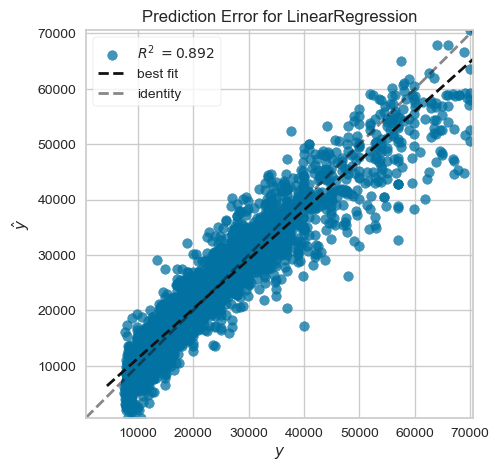

In [ ]:
visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();

Öncelikle, eğitim verilerini kullanarak modelin tahmin performansını görselleştirmek için PredictionError görselleştiricisi kullanılmıştır. Modelin eğitim verileriyle eğitildikten sonra, test verileri üzerinde değerlendirilmiştir. Sonuçlar, modelin tahminlerinin gerçek değerlere ne kadar yakın olduğunu gösterir. Özellikle, aykırı değerlerin çıkarılmasının ardından, en iyi uyum çizgisi ile kimlik çizgisi arasındaki açının daha da daraldığı gözlemlenmiştir. Bu durum, modelin tahminlerinin test verileri üzerinde daha doğru hale geldiğini ve aykırı değerlerin etkisinin azaltıldığını ifade eder.

### Residual Plot without Outliers

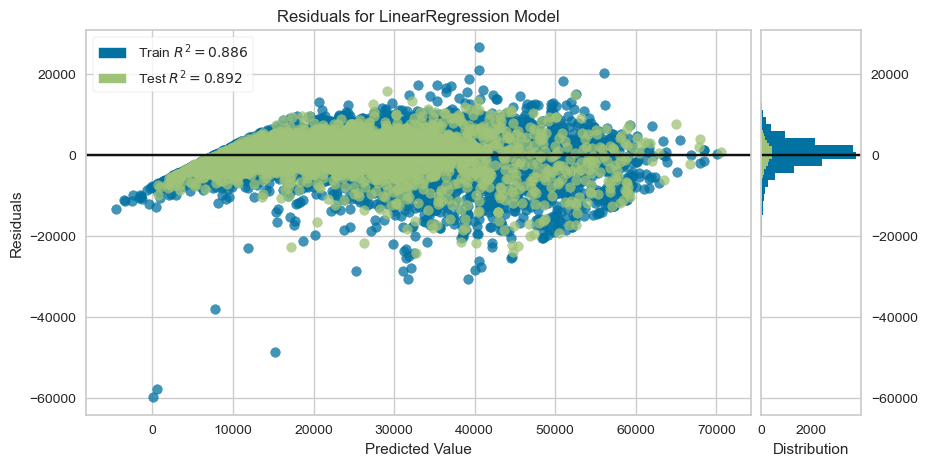

In [ ]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();

ResidualsPlot görselleştiricisi kullanılarak, modelin eğitim ve test verilerindeki hata dağılımı analiz edilmiştir. Model, eğitim verileriyle görselleştiriciye uygun hale getirilmiş ve ardından test verileri üzerinde değerlendirilmiştir. Sonuçlar, modelin tahmin hatalarının farklı fiyat aralıklarındaki dağılımını gösterir. Özellikle, araçların fiyatı yaklaşık 7500 EURO civarındayken, modelin performansının iyileşmesine rağmen, lineer regresyonun bu veri aralığında hala yeterli olmadığı gözlemlenmiştir. Bu durum, lineer regresyon modelinin bu fiyat aralığındaki verilerle yeterince iyi uyum sağlamadığını gösterir.

In [ ]:
model = LinearRegression()

scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error',
                                'neg_mean_absolute_percentage_error'],
                        cv =10,
                        return_train_score=True)

pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                            -54949923606986735616.000
train_r2                                                               0.887
test_neg_mean_absolute_error                               -711703105646.899
train_neg_mean_absolute_error                                      -2715.749
test_neg_mean_squared_error                -7646907737955898301163241472.000
train_neg_mean_squared_error                                   -15549715.912
test_neg_root_mean_squared_error                         -28537985615500.961
train_neg_root_mean_squared_error                                  -3943.252
test_neg_mean_absolute_percentage_error                        -13224940.276
train_neg_mean_absolute_percentage_error                              -0.135
dtype: float64

Modeli LinearRegression olarak tanımlayıp, çapraz doğrulama (cross-validation) yöntemiyle eğitim ve test verileri üzerinde performansını değerlendirdik. 10 katlı çapraz doğrulama kullanarak, çeşitli metrikler (R2, negatif ortalama mutlak hata, negatif ortalama kare hata, negatif kök ortalama kare hata, negatif ortalama mutlak yüzde hata) hesapladık. Sonuçlar, eğitim ve test puanlarının yanı sıra hata oranlarının birbirine yakın olduğunu gösterdi. Bu, modelin aşırı öğrenme (overfitting) yapmadığını ve hem eğitim hem de test verilerinde benzer performans sergilediğini gösteriyor. Ancak, test R2 değeri olağan dışı büyük negatif bir değer gösteriyor ki bu, veriyle ilgili olası bir sorun veya hesaplama hatasına işaret edebilir.

In [ ]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test) 8

train         test
R2          0.886        0.892
mae      2722.012     2714.950
mse  15585114.495 14855738.548
rmse     3947.799     3854.314
mape        0.136        0.136

Eğitim ve test veri setleri üzerindeki performans değerlendirmelerini karşılaştırdık. train_val fonksiyonu kullanarak, eğitim ve test setleri için R2, ortalama mutlak hata (MAE), ortalama kare hata (MSE), kök ortalama kare hata (RMSE) ve ortalama mutlak yüzde hata (MAPE) gibi metrikleri hesapladık. Eğitim verileri üzerindeki R2 değeri 0.886, test verileri üzerindeki R2 değeri ise 0.892 olarak bulunmuştur. Benzer şekilde, diğer hata metrikleri de eğitim ve test verileri arasında küçük farklılıklar göstermektedir. Eğitim ve test setlerinden elde edilen sonuçlar birbirine yakın olduğu için, test (hold-out) setinden elde edilen puanların tutarlı olduğunu ve modelin genel performansının güvenilir olduğunu söyleyebiliriz.

In [ ]:
y_pred = lm2.predict(X_test_scaled)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lm_mape= mean_absolute_percentage_error(y_test, y_pred)

Test verileri üzerinde, lm2 modelinin tahminlerini elde etmek için predict fonksiyonunu kullandık. Bu tahminlere dayanarak, modelin performansını değerlendirdik. r2_score ile modelin ne kadar iyi fit ettiğini ölçen R2 skorunu, mean_absolute_error ile ortalama mutlak hatayı, mean_squared_error ile kök ortalama kare hata (RMSE) değerini ve mean_absolute_percentage_error ile ortalama mutlak yüzde hatayı hesapladık. Bu skorları değişkenlere atayarak, elde edilen sonuçları karşılaştırmak ve modelin başarısını değerlendirmek istedik.

In [ ]:
pd.DataFrame(lm2.coef_, index = X_train.columns, columns=["Coef"])

Coef
make_model_Dacia Dokker                -99159903724888.422
make_model_Dacia Duster                -99159903725306.156
make_model_Dacia Jogger                -99159903724986.953
make_model_Dacia Lodgy                 -99159903725870.531
make_model_Dacia Logan                 -99159903726119.000
make_model_Dacia Sandero               -99159903728449.875
make_model_Dacia Spring                -99159903728594.656
make_model_Fiat 124 Spider             -99159903723817.938
make_model_Fiat 500                    -99159903727003.094
make_model_Fiat 500 Abarth             -99159903723358.375
make_model_Fiat 500C                   -99159903726009.031
make_model_Fiat 500L                   -99159903725277.375
make_model_Fiat 500X                   -99159903724378.938
make_model_Fiat 500e                   -99159903725026.875
make_model_Fiat Panda                  -99159903726446.062
make_model_Fiat Punto                  -99159903726908.688
make_model_Fiat Punto Evo              -99159903726625.906
make_model_Fiat Tipo                   -99159903727159.500
make_model_Ford EcoSport               -99159903726855.156
make_model_Ford Edge                   -99159903720140.656
make_model_Ford Fiesta                 -99159903726859.812
make_model_Ford Focus                  -99159903724914.938
make_model_Ford Ka/Ka+                 -99159903726766.344
make_model_Ford Kuga                   -99159903723664.062
make_model_Ford Mondeo                 -99159903724268.844
make_model_Ford Mustang                -99159903724347.531
make_model_Ford Puma                   -99159903724454.641
make_model_Ford Ranger                 -99159903715307.688
make_model_Hyundai BAYON               -99159903726940.906
make_model_Hyundai Coupe               -99159903722907.844
make_model_Hyundai ELANTRA             -99159903724979.125
make_model_Hyundai Genesis             -99159903730695.297
make_model_Hyundai IONIQ               -99159903724404.734
make_model_Hyundai KONA                -99159903724049.141
make_model_Hyundai SANTA FE            -99159903718481.906
make_model_Hyundai TUCSON              -99159903721251.203
make_model_Hyundai VELOSTER            -99159903726148.812
make_model_Hyundai i10                 -99159903728056.984
make_model_Hyundai i20                 -99159903727033.922
make_model_Hyundai i30                 -99159903726490.688
make_model_Hyundai i40                 -99159903724099.531
make_model_Hyundai iX20                -99159903726037.188
make_model_Hyundai iX35                -99159903723716.938
make_model_Mercedes-Benz A 180         -99159903719174.391
make_model_Mercedes-Benz A 200         -99159903718156.094
make_model_Mercedes-Benz A 220         -99159903719925.344
make_model_Mercedes-Benz A 250         -99159903718427.719
make_model_Mercedes-Benz A 35 AMG      -99159903712403.688
make_model_Mercedes-Benz A 45 AMG      -99159903719462.500
make_model_Mercedes-Benz C 180         -99159903718271.766
make_model_Mercedes-Benz C 200         -99159903717259.312
make_model_Mercedes-Benz C 220         -99159903719734.438
make_model_Mercedes-Benz C 250         -99159903720752.359
make_model_Mercedes-Benz C 300         -99159903714279.594
make_model_Mercedes-Benz C 400         -99159903718106.234
make_model_Mercedes-Benz C 43 AMG      -99159903714923.750
make_model_Mercedes-Benz C 63 AMG      -99159903715675.344
make_model_Mercedes-Benz CL            -99159903718095.875
make_model_Mercedes-Benz CLA 180       -99159903718185.406
make_model_Mercedes-Benz CLA 200       -99159903718790.953
make_model_Mercedes-Benz CLA 45 AMG    -99159903715761.672
make_model_Mercedes-Benz CLS 350       -99159903717316.875
make_model_Mercedes-Benz E 200         -99159903715997.141
make_model_Mercedes-Benz E 220         -99159903714249.312
make_model_Mercedes-Benz E 250         -99159903722790.078
make_model_Mercedes-Benz E 300         -99159903712341.703
make_model_Mercedes-Benz E 350         -99159903721397.453
make_model_Mercedes-Benz E 400         -99

lm2.coef_ kullanılarak hesaplanan regresyon katsayıları, modeldeki özelliklerin etkilerini gösterir. Ancak, bu katsayıların çok yüksek olması, "dummy variable trap" olarak bilinen bir sorunu işaret edebilir. Bu sorun, bağımsız değişkenlerin birbirleriyle ilişkili olduğu durumlarda ortaya çıkar; özellikle kategorik değişkenlerin one-hot encoding ile dönüştürülmesi sırasında meydana gelir. Örneğin, "cinsiyet" gibi bir değişkenin "erkek" ve "kadın" olarak iki ayrı dummy değişkenle temsil edilmesi, bu değişkenlerin birbirleriyle ilişkili olmasına yol açabilir. Bu durum, bazı değişkenlerin diğerlerinin toplamından türetilebilmesi nedeniyle modelde çok yüksek korelasyonlara ve doğruluk problemlerine neden olabilir. Dummy variable trap'i önlemek için, genellikle dummy değişkenlerden birinin atılması veya düzenleme (regularization) uygulanması tercih edilir. Kodda drop="first" parametresinin kullanılması, bir kategorik gözlemi düşürerek bu ilişkiyi zayıflatır; ancak, değişkenlerin önem derecesini belirlerken düzenleme daha uygun bir yaklaşımdır.

## Pipeline

In [ ]:
X = df.drop(columns = ["price"])
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Outlier gözlemleri çıkardıktan sonra, veri setindeki bağımsız değişkenler (X) ve bağımlı değişken (y) olarak ayrılır ve ardından veriler eğitim ve test setlerine (X_train, X_test, y_train, y_test) bölünür. Bu işlem, modelin eğitim ve test aşamalarında daha güvenilir sonuçlar elde etmesini sağlar.

In [ ]:
X_train.head()

make_model         body_type            type warranty  \
5460          Renault Clio             Sedan            Used      Yes   
13438         Dacia Duster  Off-Road/Pick-up            Used      Yes   
138    Mercedes-Benz A 200           Compact            Used      Yes   
3121            Opel Astra     Station wagon            Used      Yes   
22353           Volvo XC60  Off-Road/Pick-up  Pre-registered      Yes   

        mileage    gearbox fuel_type  seller  engine_size  gears  \
5460  97540.000     Manual   Benzine  Dealer     1149.000  5.000   
13438 31261.000     Manual   Benzine  Dealer     1598.000  5.000   
138   67953.000  Automatic   Benzine  Dealer     1332.000  7.000   
3121  84750.000     Manual    Diesel  Dealer     1598.000  6.000   
22353     9.000  Automatic    Diesel  Dealer     1969.000  8.000   

       co_emissions drivetrain  extras  empty_weight full_service_history  \
5460        127.000      Front       2      1157.000                   No   
13438       156.000      Front       4      1240.000                   No   
138           0.000      Front       4      1275.000                  Yes   
3121         89.000      Front       2      1293.000                   No   
22353       142.000      Front       1      1843.000                   No   

              upholstery  previous_owner energy_efficiency_class   age  \
5460               Cloth           2.000             unefficient 6.000   
13438              Cloth           1.000             unefficient 3.000   
138    Part/Full Leather           2.000               efficient 4.000   
3121               Cloth           1.000               efficient 4.000   
22353  Part/Full Leather           1.000               efficient 0.000   

       power_kW  cons_avg comfort_&_convenience_Package  \
5460     54.000     5.100                      Standard   
13438    84.000     6.800                       Premium   
138     121.000     5.200                      Standard   
3121     81.000     4.000                       Premium   
22353   145.000     0.000                      Standard   

      entertainment_&_media_Package    safety_&_security_Package  
5460                       Standard       Safety Premium Package  
13438                      Standard       Safety Premium Package  
138                            Plus       Safety Premium Package  
3121                           Plus       Safety Premium Package  
22353                          Plus  Safety Premium Plus Package

X_train veri çerçevesi, modelin eğitilmesi için kullanılan özellikleri içerir ve her satır bir araç örneğini temsil eder. Özellikler arasında araç markası, model tipi, garantisi, kilometre, şanzıman türü, yakıt türü, satıcı, motor hacmi, vites sayısı, emisyon değerleri, sürüş tipi, ek özellikler, boş ağırlık, servis geçmişi, döşeme türü, önceki sahip sayısı, enerji verimliliği sınıfı, yaş, güç (kW), ortalama yakıt tüketimi ve çeşitli paketlerin varlığı gibi bilgiler yer alır. Bu veriler, modelin araç fiyatını tahmin etmesi için eğitim setinde kullanılacaktır.

In [ ]:
cat_onehot = ['make_model', 'body_type', 'warranty', 'gearbox', 'fuel_type', 'seller', 'drivetrain', 'full_service_history',
              'upholstery', 'energy_efficiency_class']
cat_ordinal = ['type', 'comfort_&_convenience_Package', 'entertainment_&_media_Package', 'safety_&_security_Package']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

cat_onehot: Bu liste, birer "one-hot" kodlaması yapılacak kategorik değişkenleri içerir. One-hot kodlama, kategorik değişkenleri sayısal formata dönüştürmek için kullanılır ve her kategori için ayrı bir sütun oluşturur. Burada kullanılan değişkenler şunlardır: make_model (marka/model), body_type (gövde tipi), warranty (garanti durumu), gearbox (şanzıman türü), fuel_type (yakıt türü), seller (satıcı türü), drivetrain (sürüş tipi), full_service_history (tam servis geçmişi), upholstery (döşeme türü), ve energy_efficiency_class (enerji verimliliği sınıfı).

cat_ordinal: Bu liste, sıralı (ordinal) kategorik değişkenleri içerir. Sıralı değişkenler, belirli bir sıralama içeren kategorilerdir ve genellikle bu sıralama korunarak işlenir. Bu değişkenler şunlardır: type (araç türü), comfort_&_convenience_Package (konfor ve kullanım kolaylığı paketi), entertainment_&_media_Package (eğlence ve medya paketi), ve safety_&_security_Package (güvenlik paketi).

cat_for_type: type değişkeni için kullanılan kategorik değerlerdir: Used (kullanılmış), Employee's car (çalışan aracı), Demonstration (demonstrasyon aracı), ve Pre-registered (ön kayıtlı).

cat_for_comfort: comfort_&_convenience_Package değişkeni için sıralama: Standard (standart), Premium (premium), ve Premium Plus (premium plus).

cat_for_ent: entertainment_&_media_Package değişkeni için sıralama: Standard (standart) ve Plus (plus).

cat_for_safety: safety_&_security_Package değişkeni için sıralama: Safety Standard Package (güvenlik standart paketi), Safety Premium Package (güvenlik premium paketi), ve Safety Premium Plus Package (güvenlik premium plus paketi).

Bu listeleme, her değişkenin nasıl işleneceğine ve hangi kategorik değerlerin dikkate alınacağına dair bir yol haritası sağlar.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
enc_ordinal = OrdinalEncoder(categories= [cat_for_type, cat_for_comfort, cat_for_ent, cat_for_safety])

column_trans = make_column_transformer((enc_onehot, cat_onehot),
                                       (enc_ordinal, cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False) # MinMaxScaler()


Kategorik değişkenlerin işlenmesi için bir ön işleme aşaması oluşturulmuştur. Öncelikle, OneHotEncoder ve OrdinalEncoder kullanılarak iki farklı kodlama türü tanımlanmıştır. OneHotEncoder, cat_onehot listesinde belirtilen kategorik değişkenler için kullanılır ve bu değişkenlerin her bir kategorisini ayrı sütunlar halinde dönüştürür; bilinmeyen değerler ile başa çıkmak için handle_unknown="ignore" seçeneği ve veriyi sparse (seyrek) formatta değil, yoğun (dense) formatta döndürme seçeneği kullanılmıştır. OrdinalEncoder ise cat_ordinal listesinde belirtilen sıralı kategorik değişkenler için kullanılır ve her bir kategoriye bir sıra numarası atar; burada sıralama, cat_for_type, cat_for_comfort, cat_for_ent, ve cat_for_safety listelerindeki kategorilere göre yapılır. Son olarak, make_column_transformer fonksiyonu, her iki kodlama yöntemini belirli sütunlara uygulayacak şekilde yapılandırılmıştır ve diğer sütunları değişmeden geçirecek şekilde ayarlanmıştır (remainder='passthrough'). Bu işlem, veri setindeki kategorik değişkenlerin uygun şekilde dönüştürülmesini sağlar ve modelin bu verilerle daha iyi öğrenmesini destekler.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Ridge", Ridge())]

ridge_pipe = Pipeline(steps=operations).set_output(transform="pandas")
# If we want the outputs of the given transform algorithms to be dataframes,
# you can add set_output(transform="pandas") to the end of the pipeline.

ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncode...
                                                                              'Pre-registered'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

ridge_pipe isimli bir iş akışı (pipeline) oluşturulmuştur ve bu iş akışı verilerin ön işleme ve modelleme süreçlerini otomatikleştirmektedir. İlk olarak, OneHot_Ordinal_Encoder adımı, column_trans kullanarak eğitim verilerindeki kategorik değişkenlere uygun bir şekilde one-hot ve ordinal kodlama işlemlerini gerçekleştirir. Bu aşamada, cat_onehot değişkenleri için one-hot kodlama, cat_ordinal değişkenleri için ise sıralı kodlama uygulanır. Diğer sayısal özellikler ise değişmeden bırakılır (remainder='passthrough'). Sonraki adım olan MinMaxScaler, bu dönüştürülmüş ve ölçeklenmiş veriler üzerinde min-max ölçekleme işlemi yaparak verileri [0,1] aralığına getirir. Son olarak, Ridge regresyon modeli, dönüştürülmüş ve ölçeklenmiş eğitim verileri (X_train) ile eğitim verisi (y_train) kullanılarak eğitilir. Tahmin yapma aşamasında ise, test verileri (X_test) aynı şekilde dönüştürülür ve ölçeklenir. İlk olarak, test verileri column_trans ile kodlanır, ardından MinMaxScaler ile ölçeklenir ve son olarak Ridge modeline tahmin yapmak üzere sunulur. Bu pipeline, veri ön işleme ve modelleme adımlarını bir araya getirerek süreci daha düzenli ve otomatik hale getirir.

## Implement Ridge Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- Fit the model
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.


Ridge regresyonunu uygulamak için önce gerekli modülü import edin ve verilerinizi ölçeklendirmeyi unutmayın; bunu yapmanın bir yolu, Normalize=True parametresini kullanmaktır. Modelinizi Ridge sınıfını kullanarak eğitin ve test verilerini tahmin edin. Model performansını değerlendirmek için regresyon metriklerini kullanarak sonuçları analiz edin. Sonrasında, cross-validation yöntemiyle alpha hiperparametresini ayarlayın ve en uygun alpha değerini belirleyin. Son olarak, bu yeni alpha değeriyle modeli yeniden eğitin ve test verilerini tekrar tahmin edin.

## Ridge

In [ ]:
from sklearn.linear_model import Ridge

from sklearn.linear_model import Ridge ifadesi, Python'daki scikit-learn kütüphanesinden Ridge sınıfını içeri aktarmak için kullanılır. Ridge regresyonu, doğrusal regresyon analizi sırasında kullanılan bir düzenleme yöntemidir. Bu yöntemde, modelin karmaşıklığını kontrol etmek için bir düzenleme (penalizasyon) terimi eklenir. Bu, aşırı uyum (overfitting) riskini azaltarak modelin genellenebilirliğini artırır.

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncode...
                                                                              'Pre-registered'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

Bu kod parçasında, Ridge regresyon modelini kurmak ve uygulamak için bir Pipeline oluşturuluyor. İlk olarak, OneHot_Ordinal_Encoder adı verilen bir adım, column_trans adında tanımlanan sütun dönüştürücü ile kategorik verilerin one-hot ve ordinal kodlamasını yapar. Ardından, scaler adımında, MinMaxScaler() kullanılarak verilerin ölçeklendirilmesi gerçekleştirilir. Son olarak, Ridge adımında, Ridge regresyonu uygulanır. ridge_model.fit(X_train, y_train) komutu ise, bu pipeline'ı eğitim verileri (X_train ve y_train) ile eğitir. Bu şekilde, veriler sırasıyla dönüştürülüp ölçeklendirilir ve Ridge regresyon modeli ile tahmin yapılabilir.

In [ ]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

train         test
R2          0.886        0.892
mae      2720.436     2709.631
mse  15599340.453 14864510.047
rmse     3949.600     3855.452
mape        0.135        0.135

Ridge regresyon modelinin eğitim ve test setleri üzerindeki performansını değerlendirdiğimizde, modelin her iki sette de oldukça iyi sonuçlar verdiğini görüyoruz. Eğitim setindeki R kare değeri 0.886 ve test setindeki R karedeğeri 0.892, modelin verilerdeki varyansı iyi açıkladığını gösteriyor. Ortalama mutlak hata (MAE) eğitim setinde 2720.436, test setinde ise 2709.631; ortalama kare hata (MSE) eğitim setinde 15,599,340.453, test setinde 14,864,510.047 olarak hesaplandı. Kök ortalama kare hata (RMSE) eğitim setinde 3949.600, test setinde ise 3855.452. Ortalama mutlak yüzde hata (MAPE) her iki sette de %0.135 olarak gerçekleşti. Bu sonuçlar, Ridge regresyon modelinin hem eğitim hem de test verisinde tutarlı ve etkili bir şekilde performans gösterdiğini ve modelin overfitting veya underfitting sorunu yaşamadığını işaret ediyor.

## Cross Validation

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)


Bu kod parçasında, Ridge regresyon modelini değerlendirmek için bir Pipeline kullanarak çapraz doğrulama (cross-validation) yapıyoruz. İlk olarak, OneHot_Ordinal_Encoder, MinMaxScaler, ve Ridge adımlarından oluşan bir işlem sırası (pipeline) tanımlıyoruz. Pipeline, verileri sırasıyla dönüştürür ve modeli uygular.

cross_validate fonksiyonu, bu pipeline'ı kullanarak eğitim verisi üzerinde 10 katlı çapraz doğrulama gerçekleştirir. Bu süreçte, her bir fold'da eğitim ve test setleri oluşturulur; ardından, pipeline'daki tüm adımlar (ön işleme ve modelleme) uygulanarak performans ölçümleri hesaplanır. Burada, r2, neg_mean_absolute_error, neg_mean_squared_error, neg_root_mean_squared_error, ve neg_mean_absolute_percentage_error gibi çeşitli performans metrikleri kullanılır.

Önemli bir nokta, çapraz doğrulama sürecinde veri dönüşüm adımlarının (örneğin, one-hot encoding ve scaling) pipeline içinde yer almasıdır. Bu sayede, her iterasyonda hem eğitim hem de test verileri doğru şekilde dönüştürülür ve veri sızıntısı (data leakage) riski ortadan kaldırılır. Yani, eğitim ve test verileri arasında dönüşüm işlemleri sırasında veri sızıntısı olmaz ve modelin genel performansını daha güvenilir bir şekilde ölçmüş oluruz.

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores

fit_time  score_time  test_r2  train_r2  test_neg_mean_absolute_error  \
1      0.190       0.026    0.880     0.887                     -2862.653   
2      0.150       0.024    0.884     0.886                     -2750.150   
3      0.155       0.015    0.885     0.886                     -2822.310   
4      0.146       0.017    0.867     0.888                     -2748.478   
5      0.149       0.015    0.890     0.886                     -2672.116   
6      0.137       0.014    0.875     0.887                     -2776.752   
7      0.135       0.020    0.872     0.888                     -2815.975   
8      0.149       0.015    0.876     0.887                     -2796.204   
9      0.129       0.003    0.903     0.884                     -2655.661   
10     0.122       0.029    0.890     0.885                     -2726.087   

    train_neg_mean_absolute_error  test_neg_mean_squared_error  \
1                       -2701.461                -17242778.977   
2                       -2724.949                -14753097.854   
3                       -2710.260                -17402690.879   
4                       -2717.150                -18184445.547   
5                       -2731.224                -14233325.280   
6                       -2719.821                -16229825.358   
7                       -2711.434                -18205322.746   
8                       -2717.666                -16150131.560   
9                       -2733.613                -13664366.412   
10                      -2725.111                -15318229.759   

    train_neg_mean_squared_error  test_neg_root_mean_squared_error  \
1                  -15452804.320                         -4152.443   
2                  -15727433.726                         -3840.976   
3                  -15434898.724                         -4171.653   
4                  -15354624.648                         -4264.322   
5                  -15778230.244                         -3772.708   
6                  -15563389.760                         -4028.626   
7                  -15351879.390                         -4266.770   
8                  -15589625.343                         -4018.723   
9                  -15844718.411                         -3696.534   
10                 -15680664.510                         -3913.851   

    train_neg_root_mean_squared_error  \
1                           -3931.006   
2                           -3965.783   
3                           -3928.727   
4                           -3918.498   
5                           -3972.182   
6                           -3945.046   
7                           -3918.147   
8                           -3948.370   
9                           -3980.542   
10                          -3959.882   

    test_neg_mean_absolute_percentage_error  \
1                                    -0.139   
2                                    -0.139   
3                                    -0.137   
4                                    -0.137   
5                                    -0.140   
6                                    -0.136   
7                                    -0.135   
8                                    -0.142   
9                                    -0.135   
10                                   -0.131   

    train_neg_mean_absolute_percentage_error  
1                                     -0.134  
2                                     -0.135  
3                                     -0.135  
4                                     -0.135  
5                                     -0.135  
6                                     -0.135  
7                                     -0.135  
8                                     -0.135  
9                                     -0.136  
10                                    -0.136

Bu tabloda, Ridge regresyon modelinin 10 katlı çapraz doğrulama (cross-validation) sonuçları gösterilmektedir. Her bir kat (fold) için çeşitli performans metriklerinin yanı sıra modelin eğitim ve test süreçlerinde geçen süreler de yer almaktadır.

Tablonun ilk iki sütunu, modelin eğitim ve test aşamalarında geçen süreleri göstermektedir. Diğer sütunlar ise modelin performansını ölçen metrikleri sunar:

test_r2 ve train_r2: Test ve eğitim verilerindeki R² skorları, modelin ne kadar iyi uyduğunu ölçer. Test R² genellikle modelin genel performansını yansıtır, burada en yüksek değer 0.903 olarak gözüküyor.
test_neg_mean_absolute_error ve train_neg_mean_absolute_error: Test ve eğitim setlerindeki negatif ortalama mutlak hata (MAE) değerleri, hata ne kadar büyükse o kadar düşük olur; burada daha düşük negatif değerler daha iyi sonuçları ifade eder. En düşük test MAE değeri -2862.653'tür.
test_neg_mean_squared_error ve train_neg_mean_squared_error: Test ve eğitim setlerindeki negatif ortalama kare hata (MSE) değerleri, daha düşük negatif değerler modelin daha iyi performans gösterdiğini belirtir. En düşük test MSE değeri -13664366.412'dir.
test_neg_root_mean_squared_error ve train_neg_root_mean_squared_error: Test ve eğitim setlerindeki negatif kök ortalama kare hata (RMSE) değerleri, daha düşük negatif değerler modelin daha iyi performansını gösterir. En düşük test RMSE değeri -3696.534'tür.
test_neg_mean_absolute_percentage_error ve train_neg_mean_absolute_percentage_error: Test ve eğitim setlerindeki negatif ortalama mutlak yüzdelik hata (MAPE) değerleri, daha düşük negatif değerler modelin daha iyi tahmin yaptığını gösterir. En düşük test MAPE değeri -0.142'dir.
Genel olarak, test ve eğitim metrikleri arasındaki değerler oldukça yakındır, bu da modelin overfitting (aşırı uyum) riskinin düşük olduğunu ve modelin genelleme yeteneğinin iyi olduğunu gösterir. En iyi performansı sergileyen fold, test setindeki en yüksek R² skoru ve en düşük hata metrikleri ile 9. fold'dur.

In [ ]:
scores.iloc[:,2:].mean()

test_r2                                            0.882
train_r2                                           0.886
test_neg_mean_absolute_error                   -2762.639
train_neg_mean_absolute_error                  -2719.269
test_neg_mean_squared_error                -16138421.437
train_neg_mean_squared_error               -15577826.908
test_neg_root_mean_squared_error               -4012.661
train_neg_root_mean_squared_error              -3946.818
test_neg_mean_absolute_percentage_error           -0.137
train_neg_mean_absolute_percentage_error          -0.135
dtype: float64

Bu sonuçlar, Ridge regresyon modelinin 10 katlı çapraz doğrulama sürecindeki ortalama performansını gösterir. Modelin test verisindeki R² skoru ortalaması 0.882 olup, bu da modelin test setindeki varyansın %88.2'sini açıkladığını belirtir. Eğitim R² skoru ise 0.886'dır, bu da modelin eğitim setindeki performansının da yüksek olduğunu gösterir. Ortalama mutlak hata (MAE) ve ortalama kare hata (MSE) değerleri hem eğitim hem de test setinde oldukça yakındır, bu da modelin her iki sette de tutarlı performans gösterdiğini ve overfitting riskinin düşük olduğunu ortaya koyar. Ortalama kök kare hata (RMSE) ve ortalama mutlak yüzdelik hata (MAPE) değerleri de benzer şekilde düşük ve tutarlıdır, bu da modelin genel hata seviyelerinin düşük olduğunu ve hem eğitim hem de test verisinde iyi bir genelleme sağladığını gösterir.
test_r2: Test verisindeki R² skoru ortalaması 0.882'dir. Bu, modelin test verisindeki varyansın %88.2'sini açıkladığını ve genel olarak iyi bir uyum sağladığını gösterir.
train_r2: Eğitim verisindeki R² skoru ortalaması 0.886'dır. Eğitim setinde modelin varyansı açıklama kapasitesinin oldukça yüksek olduğunu belirtir, ancak test R²'den biraz daha yüksektir.
test_neg_mean_absolute_error: Test setindeki negatif ortalama mutlak hata ortalaması -2762.639'tur. Negatif değerler, daha düşük MAE'nin daha iyi olduğunu gösterir; bu nedenle, modelin ortalama hata değeri 2762.639'dur.
train_neg_mean_absolute_error: Eğitim setindeki negatif ortalama mutlak hata ortalaması -2719.269'dur, test MAE değerine oldukça yakındır ve modelin eğitim verisindeki performansının da iyi olduğunu gösterir.
test_neg_mean_squared_error: Test setindeki negatif ortalama kare hata ortalaması -16138421.437'dir. Negatif değerler daha iyi performansı gösterir; bu nedenle, modelin test setindeki ortalama kare hata değeri 16138421.437'dir.
train_neg_mean_squared_error: Eğitim setindeki negatif ortalama kare hata ortalaması -15577826.908'dir ve test MSE değerine yakındır, bu da modelin eğitim verisinde de iyi performans gösterdiğini ifade eder.
test_neg_root_mean_squared_error: Test setindeki negatif kök ortalama kare hata ortalaması -4012.661'dir. Negatif değerler daha iyi performansı gösterir; modelin test verisindeki RMSE değeri 4012.661'dir.
train_neg_root_mean_squared_error: Eğitim setindeki negatif kök ortalama kare hata ortalaması -3946.818'dir, test RMSE değerine yakındır ve eğitim performansının da iyi olduğunu gösterir.
test_neg_mean_absolute_percentage_error: Test setindeki negatif ortalama mutlak yüzdelik hata ortalaması -0.137'dir. Negatif değerler daha iyi performansı ifade eder; modelin test setindeki ortalama yüzdelik hata değeri %13.7'dir.
train_neg_mean_absolute_percentage_error: Eğitim setindeki negatif ortalama mutlak yüzdelik hata ortalaması -0.135'tir, test MAPE değerine yakındır ve eğitim setindeki performansın da tutarlı olduğunu gösterir.

## Finding best alpha for Ridge

In [ ]:
from sklearn.model_selection import GridSearchCV

GridSearchCV, model hiperparametrelerini ayarlamak ve en iyi hiperparametreleri bulmak için kullanılan bir yöntemdir. Bu yöntem, verilen hiperparametreler için bir ızgara (grid) oluşturur ve bu ızgaradaki her kombinasyonu model üzerinde değerlendirir. Sonuç olarak, modelin performansını en üst düzeye çıkarmak için en iyi hiperparametreler seçilir.

In [ ]:
alpha_space = np.linspace(0.001, 100, 100)


np.linspace(0.001, 100, 100) fonksiyonu, alpha hiperparametresi için bir dizi değer oluşturur. Bu değerler, Ridge regresyon modelinizde denenecek farklı alpha değerlerini temsil eder.

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha': alpha_space} # Parameter names should be used together with the model name defined
                                           # in the pipeline.

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

Bu kod, Ridge regresyon modelinin hiperparametrelerini optimize etmek için GridSearchCV kullanır. İlk olarak, veriyi kodlama ve ölçekleme işlemlerini içeren bir Pipeline oluşturulur ve ardından GridSearchCV aracılığıyla alpha hiperparametresi için bir değerler aralığı belirlenir. GridSearchCV, bu değerler aralığında model performansını değerlendirir, her bir alpha değeri için modelin çapraz doğrulama sonuçlarını hesaplar ve en iyi performansı sağlayan alpha değerini seçer. Bu süreç, veri sızıntısını önlemek ve modelin en iyi performansını elde etmek için veriyi her çapraz doğrulama iterasyonunda doğru şekilde dönüştürür. GridSearchCV, her alpha değeri için modelin performansını değerlendirir ve en iyi alpha değerini bulur. Bu sayede Ridge regresyon modelinin hiperparametrelerini optimize eder.
Bu süreç, modelin en iyi performansını elde etmek için hiperparametrelerin doğru bir şekilde ayarlanmasını sağlar ve veri sızıntısını önler.

In [ ]:
pipe_model.get_params()

{'memory': None,
 'steps': [('OneHot_Ordinal_Encoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['make_model', 'body_type', 'warranty',
                                     'gearbox', 'fuel_type', 'seller',
                                     'drivetrain', 'full_service_history',
                                     'upholstery', 'energy_efficiency_class']),
                                   ('ordinalencoder',
                                    OrdinalEncoder(categories=[['Used',
                                                                "Employee's car",
                                                                'Demonstration',
                                                                'Pre-registered'],
                         

Bu kod, Pipeline kullanılarak tanımlanan modelin parametrelerini gösterir. İlk olarak, pipeline içindeki adımları ve her bir adımın parametrelerini listeler. Burada:

OneHot_Ordinal_Encoder adımı, veri dönüştürme işlemlerini yönetir. Bu adımda, kategorik değişkenler OneHotEncoder ile kodlanır ve sıralı kategoriler OrdinalEncoder ile dönüştürülür.

scaler adımı, MinMaxScaler kullanarak veriyi ölçekler.

Ridge adımı, Ridge regresyon modelini içerir ve burada alpha gibi model hiperparametreleri bulunur.

Parametreler detaylı bir şekilde gösterilmiştir: OneHot_Ordinal_Encoder için encoder'lar ve parametreleri, scaler için ölçekleme aralığı ve Ridge için regresyon hiperparametreleri. Bu detaylar, modelin yapılandırmasını ve hiperparametrelerini kontrol etmek için kullanılır.

In [ ]:
ridge_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'warranty',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'seller',
                                                                          'drivetrain',
                                                                          'full_service_history',
                                                                          'upholstery',
                                                                          'energy_efficiency_class']),
                                                                        ('...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')


ridge_grid_model.fit(X_train, y_train) kodu, Ridge regresyon modeli için hiperparametreleri optimize etmek amacıyla grid search işlemini başlatır. Burada, X_train ve y_train veri setleri kullanılarak modelin farklı alpha değerleri ile eğitilmesi sağlanır. Grid search, belirli bir alpha aralığında en iyi performansı sağlayan değeri bulmak için çapraz doğrulama kullanır. Model, veri dönüşümleri ve ölçekleme adımları da dahil olmak üzere, tüm pipeline işlemleri ile birlikte eğitilir ve bu süreçte en iyi alpha değeri belirlenir.

In [ ]:
ridge_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncode...
                                                                              'Pre-registered'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge(alpha=0.001))])

ridge_grid_model.best_estimator_ kodu, grid search işleminde en iyi performansı sağlayan modelin tam konfigürasyonunu döndürür. Bu, en iyi alpha değerini ve diğer tüm model ayarlarını içerir. Eğer alpha parametresi varsayılan değeri olan 1.0'dan farklı bir değere ayarlandıysa, bu değer burada gösterilecektir. Ancak, varsayılan değeri koruyorsa, bu parametre görünmeyebilir çünkü varsayılan ayar değişmemiştir. Bu yöntem, en iyi modelin hangi hiperparametrelerle yapılandırıldığını anlamak için kullanılır.

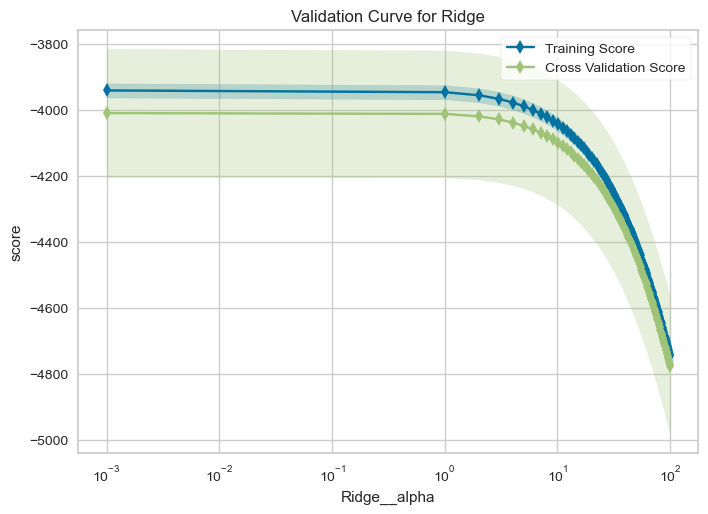

<Axes: title={'center': 'Validation Curve for Ridge'}, xlabel='Ridge__alpha', ylabel='score'>

In [ ]:
from yellowbrick.model_selection import ValidationCurve
viz = ValidationCurve(
    pipe_model, param_name="Ridge__alpha", param_range=np.linspace(0.001, 100, 100),
    logx=True, cv=10, scoring="neg_root_mean_squared_error", n_jobs=-1,
)

viz.fit(X_train, y_train)
viz.show()

ValidationCurve görselleştirici, modelin hiperparametrelerinin performansa etkisini incelemek için kullanılır. Bu örnekte, pipe_model isimli pipeline'ın Ridge modelinin alpha hiperparametresi için doğruluk eğrisini çizer. param_name="Ridge__alpha" parametresi, Ridge modelinin alpha hiperparametresinin etkisini göstermek üzere seçilir. param_range=np.linspace(0.001, 100, 100) ifadesi, alpha parametresinin 0.001 ile 100 arasındaki 100 farklı değeri ile performansın nasıl değiştiğini değerlendirir. logx=True seçeneği, alpha değerlerini logaritmik ölçekte göstermeyi sağlar, bu da geniş bir aralıktaki değerleri daha iyi analiz etmeye yardımcı olur. cv=10, 10 katlamalı çapraz doğrulama kullanarak modelin performansını değerlendirir, ve scoring="neg_root_mean_squared_error" hatayı negatif kök ortalama kare hata (RMSE) ile ölçer. n_jobs=-1 ise hesaplamaların tüm çekirdeklerde paralel olarak yapılmasını sağlar. viz.fit(X_train, y_train) modeli eğitim verileriyle eğitir ve viz.show() ise alpha değerlerinin model performansına etkisini gösteren grafiği oluşturur.

In [ ]:
pd.DataFrame(ridge_grid_model.cv_results_).loc[ridge_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -4010.298
mean_train_score   -3941.589
Name: 0, dtype: object

ridge_grid_model.cv_results_ ile elde edilen sonuçlar, GridSearchCV sırasında farklı hiperparametre kombinasyonları için hesaplanan performans ölçütlerini içerir. pd.DataFrame(ridge_grid_model.cv_results_) ifadesi, bu sonuçları bir DataFrame'e dönüştürür. ridge_grid_model.best_index_ kullanılarak, en iyi hiperparametre kombinasyonu için indeks bulunur. loc[ridge_grid_model.best_index_, ["mean_test_score", "mean_train_score"]] ile bu en iyi kombinasyon için test ve eğitim verileri üzerindeki ortalama performans skorları alınır. Sonuç olarak, mean_test_score (-4010.298) ve mean_train_score (-3941.589) değerleri, en iyi alpha değeri ile modelin test ve eğitim veri kümelerindeki ortalama negatif kök ortalama kare hata (RMSE) skorlarını gösterir. Bu, modelin test ve eğitim veri kümesindeki genel hata performansını karşılaştırmak için kullanılır.

In [ ]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

train         test
R2          0.887        0.892
mae      2713.845     2705.726
mse  15563787.577 14814604.968
rmse     3945.097     3848.975
mape        0.135        0.135

train_val(ridge_grid_model, X_train, y_train, X_test, y_test) fonksiyonu kullanılarak, optimize edilmiş Ridge regresyon modelinin eğitim ve test veri kümesi üzerindeki performansı değerlendirilmiştir. Eğitim setindeki R2 skoru 0.887 ve test setindeki R2 skoru 0.892, modelin her iki veri kümesinde de yüksek doğruluk sağladığını gösterir. Ortalama mutlak hata (MAE) eğitim setinde 2713.845 ve test setinde 2705.726, modelin tahminlerinin oldukça yakın olduğunu ifade eder. Ortalama kare hata (MSE) ve kök ortalama kare hata (RMSE) değerleri sırasıyla eğitim setinde 15563787.577 ve 3945.097, test setinde ise 14814604.968 ve 3848.975'tir; bu da modelin test setinde eğitim setine yakın bir hata seviyesine sahip olduğunu gösterir. Ortalama mutlak yüzde hata (MAPE) her iki set için de 0.135 olarak kalır, bu da modelin genel olarak düşük hata yüzdesine sahip olduğunu gösterir. Bu sonuçlar, optimize edilmiş Ridge modelinin hem eğitim hem de test veri setlerinde tutarlı ve başarılı bir performans sergilediğini göstermektedir.

In [ ]:
y_pred = ridge_grid_model.predict(X_test)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = mean_squared_error(y_test, y_pred, squared=False)
rm_mape= mean_absolute_percentage_error(y_test, y_pred)


y_pred = ridge_grid_model.predict(X_test) ile optimize edilmiş Ridge regresyon modelinden test veri kümesi için tahminler elde edilmiştir. Bu tahminler kullanılarak modelin performansı şu şekilde değerlendirilmiştir: r2_score(y_test, y_pred) ile R2 skoru hesaplanmış, test setindeki doğruluk ölçülmüştür. mean_absolute_error(y_test, y_pred) ile ortalama mutlak hata (MAE) bulunmuş, modelin tahminlerinin gerçek değerlerden ne kadar uzak olduğunu göstermiştir. mean_squared_error(y_test, y_pred, squared=False) kullanılarak kök ortalama kare hata (RMSE) hesaplanmış, tahminlerin hata büyüklüğünü ölçmüştür. Son olarak, mean_absolute_percentage_error(y_test, y_pred) ile ortalama mutlak yüzde hata (MAPE) hesaplanmış, modelin tahminlerinin gerçek değerlere oranla ne kadar doğru olduğunu belirtmiştir. Bu metrikler, modelin test verileri üzerindeki genel başarısını ve tahmin doğruluğunu özetler.

In [ ]:
ridge_grid_model.best_estimator_["Ridge"].coef_

array([-3.30426972e+03, -3.64235217e+03, -3.52664111e+03, -4.33476592e+03,
       -4.57865652e+03, -6.89508868e+03, -6.55134248e+03, -2.21208841e+03,
       -5.30098100e+03, -1.93679965e+03, -4.34359246e+03, -3.64271787e+03,
       -2.66707737e+03, -3.47671359e+03, -4.84254588e+03, -5.57314456e+03,
       -5.05828963e+03, -5.56735699e+03, -4.92910401e+03,  1.78070594e+03,
       -5.25697486e+03, -3.28178284e+03, -5.34381952e+03, -1.82034926e+03,
       -2.44572399e+03, -2.51256711e+03, -2.71869266e+03,  6.56704266e+03,
       -5.37393004e+03, -1.12255182e+03, -3.50181247e+03, -8.77540929e+03,
       -2.74694234e+03, -2.36296576e+03,  3.37222470e+03,  3.89965329e+02,
       -4.51650978e+03, -6.52660889e+03, -5.40175476e+03, -4.85211618e+03,
       -2.45421102e+03, -4.52906116e+03, -1.91654727e+03,  2.59683071e+03,
        3.69819841e+03,  1.98012606e+03,  3.35256208e+03,  9.42148585e+03,
        2.27797395e+03,  3.40481917e+03,  4.56336239e+03,  2.12365713e+03,
        9.41181226e+02,  


ridge_grid_model.best_estimator_["Ridge"].coef_ ifadesi, GridSearchCV işlemi sonucunda en iyi bulunan Ridge regresyon modelinin öğrenme sürecinde elde edilen regresyon katsayılarını döndürür. Bu katsayılar, her bir özellik için modelin tahminleri oluştururken ne kadar etkili olduğunu gösterir.

Bu katsayılar, modelin her bir bağımsız değişkenin hedef değişken üzerindeki etkisini gösterir. Pozitif bir katsayı, bağımsız değişkenin artışının hedef değişkeni artırdığını, negatif bir katsayı ise azalttığını gösterir. Ridge regresyon, özellikle yüksek boyutlu verilerle çalışırken, modelin karmaşıklığını düzenlemek ve overfitting riskini azaltmak için düzenleyici bir terim ekler, bu da katsayıların genellikle daha küçük olmasına yol açar.

Bu katsayıları incelemek, modelin hangi özelliklere ne kadar önem verdiğini anlamaya yardımcı olabilir.

In [ ]:
ridge_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out()

array(['make_model_Dacia Dokker', 'make_model_Dacia Duster',
       'make_model_Dacia Jogger', 'make_model_Dacia Lodgy',
       'make_model_Dacia Logan', 'make_model_Dacia Sandero',
       'make_model_Dacia Spring', 'make_model_Fiat 124 Spider',
       'make_model_Fiat 500', 'make_model_Fiat 500 Abarth',
       'make_model_Fiat 500C', 'make_model_Fiat 500L',
       'make_model_Fiat 500X', 'make_model_Fiat 500e',
       'make_model_Fiat Panda', 'make_model_Fiat Punto',
       'make_model_Fiat Punto Evo', 'make_model_Fiat Tipo',
       'make_model_Ford EcoSport', 'make_model_Ford Edge',
       'make_model_Ford Fiesta', 'make_model_Ford Focus',
       'make_model_Ford Ka/Ka+', 'make_model_Ford Kuga',
       'make_model_Ford Mondeo', 'make_model_Ford Mustang',
       'make_model_Ford Puma', 'make_model_Ford Ranger',
       'make_model_Hyundai BAYON', 'make_model_Hyundai Coupe',
       'make_model_Hyundai ELANTRA', 'make_model_Hyundai Genesis',
       'make_model_Hyundai IONIQ', 'make_model

ridge_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out() komutu, modelde kullanılan ColumnTransformer'ın uyguladığı tüm özelliklerin isimlerini döndürür. Bu, özellikle modelin hangi özelliklere dayalı olarak tahminler yaptığını anlamak için yararlıdır. Özellik isimleri, veri setindeki kategorik değişkenlerin her bir düzeyinin nasıl kodlandığını ve sayısal özelliklerin isimlerini içerir.

Örneğin, bu liste, make_model, body_type, warranty gibi kategorik değişkenlerin her bir benzersiz değerinin ve ayrıca sayısal değişkenlerin isimlerini içerir. Ayrıca, ColumnTransformer'ın uyguladığı OneHotEncoder ve OrdinalEncoder gibi ön işleme adımlarının etkilerini de gösterir. Bu isimler, modelin tahminlerinde hangi özelliklerin kullanıldığını ve bu özelliklerin nasıl dönüştürüldüğünü anlamanıza yardımcı olur.

In [ ]:
pd.DataFrame(data= ridge_grid_model.best_estimator_["Ridge"].coef_,
             index=ridge_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(),
             columns=["Coef"]).sort_values("Coef")

Coef
mileage                             -23968.130
age                                 -21170.412
make_model_Hyundai Genesis           -8775.409
make_model_Renault Twingo            -7883.191
make_model_Toyota Aygo X             -7464.835
make_model_Dacia Sandero             -6895.089
make_model_Peugeot 108               -6886.815
make_model_Toyota Aygo               -6838.665
make_model_Renault ZOE               -6816.361
make_model_Dacia Spring              -6551.342
make_model_Hyundai i10               -6526.609
make_model_Opel Corsa                -6467.648
make_model_Opel Adam                 -6289.116
make_model_Nissan Leaf               -5992.401
make_model_Nissan Micra              -5821.369
make_model_Fiat Punto                -5573.145
make_model_Fiat Tipo                 -5567.357
make_model_Nissan 370Z               -5556.788
make_model_Hyundai i20               -5401.755
make_model_Hyundai BAYON             -5373.930
make_model_Nissan Murano             -5350.670
make_model_Ford Ka/Ka+               -5343.820
make_model_Fiat 500                  -5300.981
make_model_Ford Fiesta               -5256.975
make_model_Opel Astra                -5227.488
make_model_Fiat Punto Evo            -5058.290
make_model_Skoda Fabia               -5021.763
make_model_SEAT Mii                  -5006.987
make_model_Ford EcoSport             -4929.104
make_model_Hyundai i30               -4852.116
make_model_Fiat Panda                -4842.546
make_model_SEAT Ibiza                -4799.152
make_model_Renault Laguna            -4771.204
make_model_Opel Crossland X          -4654.458
make_model_Peugeot 207               -4583.577
make_model_Dacia Logan               -4578.657
make_model_Opel Cascada              -4567.341
make_model_Hyundai iX20              -4529.061
make_model_Hyundai VELOSTER          -4516.510
make_model_Skoda Citigo              -4431.082
make_model_Nissan Note               -4366.783
make_model_Skoda Scala               -4362.577
make_model_Renault Clio              -4362.185
make_model_Fiat 500C                 -4343.592
make_model_Dacia Lodgy               -4334.766
make_model_SEAT Leon                 -4334.633
make_model_Peugeot 208               -4311.541
make_model_Peugeot 407               -4141.120
make_model_Nissan Pulsar             -4016.980
make_model_Opel Crossland            -3916.117
make_model_Opel Mokka X              -3905.754
make_model_Fiat 500L                 -3642.718
make_model_Dacia Duster              -3642.352
make_model_Renault Wind              -3604.271
make_model_Toyota Yaris              -3570.673
make_model_Dacia Jogger              -3526.641
make_model_Hyundai ELANTRA           -3501.812
make_model_Fiat 500e                 -3476.714
make_model_Opel Insignia             -3353.709
make_model_SEAT Arona                -3333.213
make_model_Dacia Dokker              -3304.270
make_model_Ford Focus                -3281.783
co_emissions                         -3170.530
make_model_Renault Captur            -3100.069
make_model_Renault Megane            -2985.509
make_model_Opel Mokka                -2857.422
make_model_Toyota Avensis            -2838.142
make_model_Nissan Juke               -2824.891
make_model_Nissan Townstar           -2791.767
make_model_Peugeot 107               -2769.627
make_model_Skoda Rapid/Spaceback     -2768.971
make_model_Hyundai IONIQ             -2746.942
make_model_Ford Puma                 -2718.693
make_model_Fiat 500X                 -2667.077
make_model_Peugeot 308               -2629.383
make_model_Opel GT                   -2557.977
make_model_Ford Mustang              -2512.567
make_model_Volvo V40                 -2472.453
make_model_Peugeot RCZ               -2463.908
make_model_Hyundai i40               -2454.211
make_model_Ford Mondeo               -2445.724
make_model_Hyundai KONA              -2362.966
make_model_Peugeot 307               -2358.809
make_model_Opel Grandland X          -2315.057
make_model_Renault Talisman          -2222.666



ridge_grid_model.best_estimator_["Ridge"].coef_ komutu, Ridge regresyon modelinin öğrenme sürecinde her özelliğe atanan katsayıları döndürür. Bu katsayılar, modelin tahminlerini yaparken her bir özelliğin etkisini ölçer. Verilen DataFrame, bu katsayıları özellik isimleriyle eşleştirerek sıralar ve hangi özelliklerin modelin tahminlerinde daha fazla veya daha az etkili olduğunu gösterir. Örneğin, mileage ve age gibi özellikler büyük negatif katsayılara sahipken, power_kW ve make_model_Renault Alpine A110 gibi özellikler yüksek pozitif katsayılara sahiptir. Bu, mileage ve age'in tahminlerde daha fazla negatif etkiye sahip olduğunu, power_kW ve bazı özel araç modellerinin ise pozitif etki yarattığını gösterir. Özelliklerin sıralanması, hangi faktörlerin modelin tahminlerine en fazla katkıda bulunduğunu anlamaya yardımcı olur.

## 5. Implement Lasso Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

Lasso regresyonunu uygulamak için önce gerekli modülü import etmelisiniz. Veriyi ölçeklemek veya normalize etmek önemli olabilir, bu yüzden veriyi uygun şekilde ölçekleyin ya da normalize parametresini True olarak ayarlayın. Modeli fit ettikten sonra test seti üzerinde tahminler yapın ve performansı regresyon metrikleri kullanarak değerlendirin. Alpha hiperparametresini çapraz doğrulama ile ayarlayıp en uygun alpha değerini belirleyin, ardından bu yeni alpha değeriyle tekrar modelinizi fit edin ve tahminlerde bulunun. Son olarak, farklı alpha değerlerinin özellik katsayıları üzerindeki etkilerini gözlemleyerek, model performansını ve değerlendirme metriklerini karşılaştırın. Bu, alpha değerinin modelin nasıl çalıştığını ve özelliklerin önem derecelerini nasıl etkilediğini anlamanıza yardımcı olur.

In [ ]:
from sklearn.linear_model import Lasso


Lasso regresyonu, özellikle özelliklerin sayısını azaltmak ve modelin genel performansını artırmak amacıyla kullanılan bir regresyon tekniğidir. sklearn.linear_model modülünde bulunan Lasso sınıfı, bu tekniği uygulamak için kullanılır.

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso())]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncode...
                                                                              'Pre-registered'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso())])

Bu kod parçasında, Lasso regresyonu için bir işlem hattı (pipeline) oluşturulmuştur. Öncelikle, OneHot_Ordinal_Encoder adlı adımda kategorik değişkenler dönüştürülür ve ardından MinMaxScaler kullanılarak tüm veriler ölçeklenir. Son olarak, Lasso regresyonu uygulanır. Bu işlemler sırasıyla Pipeline içinde tanımlanmış ve lasso_model isimli model oluşturulmuştur. Model, X_train ve y_train veri seti kullanılarak fit edilmiştir, yani eğitim verilerek modelin öğrenmesi sağlanmıştır. Bu süreç, modelin veri üzerinde öğrenme yaparak tahminler yapabilmesi için gerekli tüm ön işleme ve modelleme adımlarını kapsar.

In [ ]:
train_val(lasso_model, X_train, y_train, X_test, y_test)

train         test
R2          0.885        0.890
mae      2740.059     2734.062
mse  15767648.909 15079014.170
rmse     3970.850     3883.171
mape        0.136        0.136

lasso_model ile yapılan eğitim ve test değerlendirmesi sonuçlarına göre, modelin performansı şu şekildedir: Eğitim setinde R² değeri 0.885, test setinde ise 0.890'tır, bu da modelin veriyi ne kadar iyi açıkladığını gösterir. Ortalama mutlak hata (MAE) eğitim setinde 2740.059, test setinde ise 2734.062 olarak ölçülmüştür, bu da tahminlerin gerçek değerlerden ne kadar saptığını belirtir. Ortalama kare hata (MSE) eğitim setinde 15,767,648.909, test setinde ise 15,079,014.170'tir; bu değerler, tahminlerin ne kadar büyük hata içerdiğini gösterir. Kök ortalama kare hata (RMSE) eğitim setinde 3970.850, test setinde ise 3883.171'dir, bu da tahminlerin standart sapmasını temsil eder. Ortalama mutlak yüzde hata (MAPE) her iki sette de 0.136'dır, bu da modelin tahminlerinin gerçek değerlere oranla ne kadar doğru olduğunu gösterir. Genel olarak, lasso modelinin test verisi üzerindeki performansı oldukça iyi ve tutarlı görünmektedir.

## Cross Validation

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso())]

pipe_model = Pipeline(steps=operations)
scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)


Bu kod parçası, pipe_model adlı bir işlem hattı kullanarak modelin çapraz doğrulama (cross-validation) performansını değerlendirir. İşlem hattı, sırasıyla OneHot_Ordinal_Encoder ile kategorik verileri dönüştürür, MinMaxScaler ile verileri ölçeklendirir ve Lasso regresyon modelini uygular. cross_validate fonksiyonu, modelin eğitim verisi üzerinde 10 katlı çapraz doğrulama ile çeşitli performans metriklerini hesaplar: R² skoru, negatif ortalama mutlak hata (MAE), negatif ortalama kare hata (MSE), negatif kök ortalama kare hata (RMSE) ve negatif ortalama mutlak yüzde hata (MAPE). Bu metrikler, hem eğitim hem de test setlerinde modelin ne kadar iyi performans gösterdiğini değerlendirir ve sonuçları scores değişkeninde saklar.

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.881
train_r2                                           0.885
test_neg_mean_absolute_error                   -2779.394
train_neg_mean_absolute_error                  -2738.052
test_neg_mean_squared_error                -16284153.938
train_neg_mean_squared_error               -15737469.442
test_neg_root_mean_squared_error               -4030.776
train_neg_root_mean_squared_error              -3966.993
test_neg_mean_absolute_percentage_error           -0.138
train_neg_mean_absolute_percentage_error          -0.136
dtype: float64


Bu kod parçası, çapraz doğrulama sonuçlarını içeren scores veri çerçevesinden test ve eğitim setleri için çeşitli performans metriklerinin ortalamalarını hesaplar. Ortalama R² skoru, test setinde 0.881 ve eğitim setinde 0.885 olarak belirlenmiştir, bu da modelin her iki set üzerinde de oldukça iyi bir açıklama gücüne sahip olduğunu gösterir. Ortalama negatif ortalama mutlak hata (MAE), test setinde -2779.394 ve eğitim setinde -2738.052'dir; bu, modelin tahminlerde ortalama olarak bu kadar hata yaptığını gösterir. Ortalama negatif ortalama kare hata (MSE) ve negatif kök ortalama kare hata (RMSE) sırasıyla -16284153.938 ve -4030.776'dır; bu metrikler modelin hata büyüklüğünü değerlendirir. Ortalama negatif ortalama mutlak yüzde hata (MAPE), test setinde -0.138 ve eğitim setinde -0.136'dır, bu da modelin yüzde hata oranının oldukça düşük olduğunu gösterir.

## Finding best alpha for Lasso

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso())]

model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

Bu kod parçası, Lasso regresyon modelinin hiperparametrelerini optimize etmek için GridSearchCV kullanır. İlk olarak, OneHot_Ordinal_Encoder, MinMaxScaler ve Lasso'yu içeren bir Pipeline oluşturulur. param_grid sözlüğü, Lasso modelinin alpha hiperparametresi için denenmesi gereken değerleri (alpha_space) belirler. GridSearchCV, bu parametre değerlerini kullanarak modelin performansını 10 katlı çapraz doğrulama ile değerlendirir ve en iyi alpha değerini bulmaya çalışır. Bu süreç, neg_root_mean_squared_error metriğini kullanarak modelin performansını değerlendirir ve n_jobs=-1 ayarı ile işlemleri paralel olarak çalıştırarak hızlandırır. return_train_score=True seçeneği, hem eğitim hem de test skorlarının döndürülmesini sağlar.

In [ ]:
lasso_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'warranty',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'seller',
                                                                          'drivetrain',
                                                                          'full_service_history',
                                                                          'upholstery',
                                                                          'energy_efficiency_class']),
                                                                        ('...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

lasso_grid_model.fit(X_train, y_train) komutu, GridSearchCV kullanarak tanımlanan lasso_grid_model nesnesini, belirtilen alpha değerleri arasında en uygun olanını bulmak amacıyla eğitim verileriyle (X_train ve y_train) eğitir. Bu süreç, her bir alpha değeri için Lasso modelini eğitim verileriyle eğitir, çapraz doğrulama (10 katlı) ile model performansını değerlendirir ve en iyi performansı gösteren alpha değerini belirler. Bu işlem sonucunda, en düşük neg_root_mean_squared_error değerine sahip olan en iyi model seçilir ve lasso_grid_model nesnesinde saklanır.

In [ ]:
lasso_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncode...
                                                                              'Pre-registered'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=0.001))])

lasso_grid_model.best_estimator_ ifadesi, GridSearchCV tarafından bulunmuş olan en iyi modelin tam konfigürasyonunu döndürür. Yani, bu nesne, eğitim verileriyle en iyi performansı sergileyen Lasso regresyon modelini ve bu modelin kullanıldığı en uygun alpha hiperparametre değerini içerir. Bu model, seçilen hiperparametrelerle (alpha) optimize edilmiş olup, veri üzerinde en iyi regresyon sonuçlarını sağlamak için kullanılır.

viz = ValidationCurve(
    model, param_name="Lasso__alpha", param_range=np.linspace(0.001, 100, 100),
    logx=True, cv=10, scoring="neg_root_mean_squared_error", n_jobs=-1,
)

viz.fit(X_train, y_train)
viz.show()

ValidationCurve fonksiyonu, Lasso regresyon modelinin performansını farklı alpha hiperparametre değerleriyle değerlendirir ve modelin kök ortalama kare hata (RMSE) skorunu bu değerler üzerinde gösterir. Bu görselleştirme, alpha değerinin modelin doğruluğu üzerindeki etkisini anlamak için kullanılır. logx=True parametresi, alpha değerlerini logaritmik bir ölçekle gösterir. cv=10 çapraz doğrulama kullanılarak modelin performansı 10 katmanlı doğrulama ile değerlendirilir. n_jobs=-1 ise işlemleri paralel olarak çalıştırır, böylece işlem süresi kısalır. viz.show() komutu, elde edilen sonuçları görsel olarak gösterir, böylece hangi alpha değerinin model performansını en iyi şekilde optimize ettiğini belirleyebilirsiniz.

In [ ]:
pd.DataFrame(lasso_grid_model.cv_results_).loc[lasso_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -4010.836
mean_train_score   -3941.589
Name: 0, dtype: object


lasso_grid_model.cv_results_ üzerinden elde edilen pd.DataFrame ile, GridSearchCV işleminin sonucunda en iyi performansı gösteren modelin test ve eğitim setindeki ortalama skorları incelenmiştir. Bu veriler, mean_test_score ve mean_train_score olarak iki farklı skoru içerir. mean_test_score, test setinde elde edilen ortalama kök ortalama kare hata (RMSE) değerini ve mean_train_score ise eğitim setindeki ortalama RMSE değerini gösterir. Burada mean_test_score -4010.836 ve mean_train_score -3941.589 olarak belirlenmiştir. Bu skorlar, en iyi alpha hiperparametre değeri kullanılarak modelin genel performansının değerlendirilmesinde kullanılır. Test skoru genellikle modelin genelleme yeteneğini yansıtırken, eğitim skoru modelin eğitim verisine ne kadar uyum sağladığını gösterir.

In [ ]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

train         test
R2          0.887        0.892
mae      2713.849     2705.732
mse  15563787.805 14814595.123
rmse     3945.097     3848.973
mape        0.135        0.135


lasso_grid_model ile yapılan train_val fonksiyonu, modelin eğitim ve test verileri üzerindeki performansını değerlendirir. Sonuçlar, modelin eğitim ve test setlerinde ne kadar iyi performans gösterdiğini ortaya koyar. Eğitim setindeki R² değeri 0.887, test setindeki R² değeri ise 0.892 olarak hesaplanmıştır; bu, modelin hem eğitim hem de test setlerinde yüksek derecede açıklayıcılığa sahip olduğunu gösterir. Ortalama mutlak hata (MAE) ve kök ortalama kare hata (RMSE) gibi diğer performans metrikleri de oldukça benzer sonuçlar gösterir, MAE ve RMSE değerleri sırasıyla eğitim ve test setlerinde 2713.849 ve 2705.732 ile 3945.097 ve 3848.973'tir. Bu sonuçlar, modelin hem eğitim hem de test setlerinde iyi bir genel performans sergilediğini ve küçük hata değerlerine sahip olduğunu gösterir.

In [ ]:
y_pred = lasso_grid_model.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lasm_mape= mean_absolute_percentage_error(y_test, y_pred)

lasso_grid_model kullanılarak test verileri üzerindeki tahminler yapıldıktan sonra, bu tahminler çeşitli performans metrikleri ile değerlendirildi. r2_score, modelin test setindeki açıklayıcılık oranını hesaplar ve lasm_R2 değişkeninde saklanır. mean_absolute_error (MAE), test setindeki tahminlerin gerçek değerlerden ne kadar uzak olduğunu ölçer ve lasm_mae değişkeninde bulunur. mean_squared_error fonksiyonunun squared=False parametresi ile kök ortalama kare hata (RMSE) hesaplanır ve lasm_rmse değişkeninde tutulur. Son olarak, mean_absolute_percentage_error (MAPE) ile tahminlerin yüzdesel hata oranı hesaplanır ve lasm_mape değişkeninde saklanır. Bu metrikler, modelin test verilerindeki başarısını ve tahminlerin doğruluğunu değerlendirmeye yardımcı olur.

In [ ]:
pd.DataFrame(data=lasso_grid_model.best_estimator_["Lasso"].coef_,
             index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(),
             columns=["Coef"]).sort_values("Coef")

Coef
mileage                             -23967.955
age                                 -21170.425
make_model_Hyundai Genesis           -7452.250
make_model_Renault Twingo            -6558.242
make_model_Toyota Aygo X             -6138.888
make_model_Dacia Sandero             -5569.596
make_model_Peugeot 108               -5560.724
make_model_Toyota Aygo               -5512.685
make_model_Renault ZOE               -5490.020
make_model_Dacia Spring              -5223.891
make_model_Hyundai i10               -5200.735
make_model_Opel Corsa                -5142.190
make_model_Opel Adam                 -4963.514
make_model_Nissan Leaf               -4666.124
make_model_Nissan Micra              -4495.869
make_model_Fiat Punto                -4247.268
make_model_Fiat Tipo                 -4242.389
make_model_Nissan 370Z               -4233.738
make_model_Hyundai i20               -4076.237
make_model_Hyundai BAYON             -4048.205
make_model_Nissan Murano             -4026.644
make_model_Ford Ka/Ka+               -4016.846
make_model_Fiat 500                  -3975.183
make_model_Ford Fiesta               -3931.603
make_model_Opel Astra                -3902.679
make_model_Fiat Punto Evo            -3729.118
make_model_Skoda Fabia               -3696.321
make_model_SEAT Mii                  -3680.509
make_model_Ford EcoSport             -3603.808
make_model_Hyundai i30               -3527.335
make_model_Fiat Panda                -3517.031
make_model_SEAT Ibiza                -3473.791
make_model_Renault Laguna            -3446.553
make_model_Opel Crossland X          -3329.385
make_model_Peugeot 207               -3258.185
make_model_Dacia Logan               -3253.136
make_model_Opel Cascada              -3242.938
make_model_Hyundai iX20              -3203.726
make_model_Hyundai VELOSTER          -3191.161
co_emissions                         -3170.292
make_model_Skoda Citigo              -3104.843
make_model_Nissan Note               -3040.411
make_model_Skoda Scala               -3037.480
make_model_Renault Clio              -3036.812
make_model_Fiat 500C                 -3017.670
make_model_SEAT Leon                 -3009.852
make_model_Dacia Lodgy               -3009.443
make_model_Peugeot 208               -2986.077
make_model_Peugeot 407               -2815.955
make_model_Nissan Pulsar             -2691.928
make_model_Opel Crossland            -2590.679
make_model_Opel Mokka X              -2580.774
make_model_Fiat 500L                 -2317.560
make_model_Dacia Duster              -2317.557
make_model_Renault Wind              -2277.936
make_model_Toyota Yaris              -2245.233
make_model_Dacia Jogger              -2200.803
make_model_Hyundai ELANTRA           -2176.091
make_model_Fiat 500e                 -2149.867
make_model_Opel Insignia             -2029.613
make_model_SEAT Arona                -2008.195
make_model_Dacia Dokker              -1978.830
make_model_Ford Focus                -1956.920
make_model_Renault Captur            -1775.094
make_model_Renault Megane            -1660.688
make_model_Opel Mokka                -1532.479
make_model_Toyota Avensis            -1513.394
make_model_Nissan Juke               -1499.801
make_model_Nissan Townstar           -1466.823
make_model_Skoda Rapid/Spaceback     -1443.560
make_model_Peugeot 107               -1430.170
make_model_Hyundai IONIQ             -1422.002
make_model_Ford Puma                 -1393.430
make_model_Fiat 500X                 -1342.326
make_model_Peugeot 308               -1304.520
fuel_type_Liquid/Natural Gas         -1275.877
make_model_Opel GT                   -1234.001
make_model_Ford Mustang              -1189.989
make_model_Volvo V40                 -1147.831
make_model_Peugeot RCZ               -1138.974
cons_avg                             -1134.706
body_type_Off-Road/Pick-up           -1134.292
make_model_Hyundai i40               -1129.607
make_model_Ford Mondeo               -1121.405
make_model_Hyundai KONA              -1037.929


Lasso regresyon modelinin, test verilerindeki en iyi performansını sağlamak için seçtiği en iyi hiperparametrelerle (alpha) elde edilen sonuçlar, her özelliğin model üzerindeki etkisini gösterir. pd.DataFrame(data=lasso_grid_model.best_estimator_["Lasso"].coef_, index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(), columns=["Coef"]).sort_values("Coef") kodu, modeldeki her bir özelliğin (özellikle kategorik ve sayısal değişkenlerin) katsayılarını gösterir. Bu katsayılar, özelliğin model tahminlerine olan katkısını belirtir. Örneğin, yüksek pozitif katsayılar, hedef değişkeni artırıcı bir etkisi olduğunu, yüksek negatif katsayılar ise azaltıcı bir etkisi olduğunu gösterir. Özellikler, katsayılara göre sıralanarak hangi özelliklerin modelin tahminlerinde daha fazla etkili olduğunu anlamak mümkün olur. Özellikle, büyük pozitif ve negatif katsayılar, modelde önemli yer tutan özelliklerdir ve bu tür özellikler, modelin tahminlerine önemli derecede katkıda bulunur veya etkisini azaltır.

## 6. Implement Elastic-Net

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

Bu adımlar, Elastic Net regresyon modelinin nasıl uygulanacağını ve performansının nasıl değerlendirileceğini kapsamlı bir şekilde açıklamaktadır. Hiperparametre ayarı, modelin performansını optimize etmek için kritik bir adımdır ve GridSearchCV bu süreci daha sistematik hale getirir.
Elastic Net regresyonunu uygulamak için önce gerekli modülü sklearn.linear_model'den içe aktarır ve veriyi ölçeklendiririz, çünkü bu model L1 ve L2 ceza terimleri içerir ve veri ölçeğine duyarlıdır. Modeli eğittikten sonra, test seti üzerinde tahminler yaparak performansını değerlendiririz. Performans metrikleri olarak R², MAE, MSE, RMSE ve MAPE kullanılır. Alpha hiperparametresini ayarlamak için GridSearchCV kullanarak en iyi alpha değerini buluruz ve bu değeri kullanarak modeli tekrar eğitiriz. Yeni modelin performansını eski modelle karşılaştırarak, çeşitli değerlendirme metriklerinde iyileşmeler olup olmadığını gözlemleriz. Bu süreç, modelin doğruluğunu artırmak ve en iyi sonuçları elde etmek için kritik bir adımdır.

In [ ]:
from sklearn.linear_model import ElasticNet

ElasticNet regresyon modelini uygulamak için sklearn.linear_model modülünden ElasticNet sınıfını içe aktarıyoruz.

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet())]

elastic_model = Pipeline(steps=operations)

elastic_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncode...
                                                                              'Pre-registered'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('ElasticNet', ElasticNet())])

ElasticNet regresyon modelini uygulamak için, verilerin ön işleme adımlarını ve modelleme sürecini birleştiren bir Pipeline oluşturuyoruz. İlk adım olarak, OneHot_Ordinal_Encoder kullanarak kategorik özellikleri sayısal verilere dönüştürüyoruz. Ardından, MinMaxScaler ile verileri ölçeklendiriyoruz ki bu, modelin performansını artırır. Son olarak, ElasticNet modelini tanımlıyoruz. Pipeline'ı oluşturarak bu adımları sırasıyla uyguluyoruz ve modelimizi X_train ve y_train verileri ile eğitiyoruz. Bu yapı, veri işleme ve modelleme adımlarını entegre ederek, veri ön işleme ve model eğitme sürecini daha verimli ve düzenli hale getirir.

In [ ]:
train_val(elastic_model, X_train, y_train, X_test, y_test)

train         test
R2          0.464        0.460
mae      6224.548     6188.205
mse  73492316.914 74373201.250
rmse     8572.766     8623.990
mape        0.326        0.321

train_val fonksiyonunu kullanarak ElasticNet modelinin performansını hem eğitim (train) hem de test (test) veri setlerinde değerlendirdik. Modelin eğitim verilerindeki R kare skoru 0.464, test verilerindeki R kare skoru ise 0.460 olarak bulundu, bu da modelin verilerin genel varyansını açıklama gücünün düşük olduğunu gösteriyor. Ortalama mutlak hata (MAE) değerleri sırasıyla 6224.548 ve 6188.205, ortalama kare hata (MSE) değerleri ise sırasıyla 73492316.914 ve 74373201.250, ki bu da test setindeki hataların eğitim setindeki hatalardan biraz daha büyük olduğunu işaret ediyor. Kök ortalama kare hata (RMSE) değerleri sırasıyla 8572.766 ve 8623.990 ve ortalama mutlak yüzde hata (MAPE) ise sırasıyla 0.326 ve 0.321 olarak belirlendi; bu da modelin tahminlerinde belli bir hata payı bulunduğunu gösteriyor. Genel olarak, modelin hem eğitim hem de test setlerinde benzer performans sergilediğini ancak hata oranlarının yüksek olduğunu söyleyebiliriz.

## Cross Validation

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)


Bu kod parçası, ElasticNet modelini içeren bir Pipeline oluşturup, modelin performansını 10 katlı çapraz doğrulama (cross-validation) kullanarak değerlendirir. cross_validate fonksiyonu, model üzerinde eğitim verilerini kullanarak çeşitli regresyon performans metriklerini hesaplar:
R kare skoru, negatif ortalama mutlak hata (MAE), negatif ortalama kare hata (MSE), negatif kök ortalama kare hata (RMSE), ve negatif ortalama mutlak yüzde hata (MAPE). Bu metrikler, modelin her katmanda nasıl performans gösterdiğini belirler ve hem eğitim hem de test setlerinde performans ölçümleri sağlar. return_train_score=True parametresi, hem eğitim hem de test verileri için performans skorlarını döndürür, böylece modelin her iki veri setindeki başarısını karşılaştırabiliriz.

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.463
train_r2                                           0.465
test_neg_mean_absolute_error                   -6226.172
train_neg_mean_absolute_error                  -6222.009
test_neg_mean_squared_error                -73546426.623
train_neg_mean_squared_error               -73441915.929
test_neg_root_mean_squared_error               -8572.298
train_neg_root_mean_squared_error              -8569.794
test_neg_mean_absolute_percentage_error           -0.326
train_neg_mean_absolute_percentage_error          -0.326
dtype: float64

Bu kod parçası, cross_validate fonksiyonundan elde edilen sonuçları bir DataFrame olarak düzenler ve bu DataFrame'in 10 katlı çapraz doğrulamanın sonuçlarını özetler. scores veri çerçevesi, her bir çapraz doğrulama katı için hesaplanan performans metriklerini içerir. iloc[:, 2:] ifadesi, sadece metriklerin yer aldığı sütunları seçer (ilk iki sütun genellikle indeks ve test skorlarıyla ilgili bilgiler içerir) ve bu sütunların ortalamalarını hesaplar. Sonuç olarak, modelin genel performansını temsil eden metriklerin ortalama değerlerini verir. Bu ortalamalar, modelin farklı metrikler açısından genel başarısını değerlendirmenize yardımcı olur.

## Finding best alpha and l1_ratio for ElasticNet

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

param_grid = {'ElasticNet__alpha':[0.001,0.01, 0.5, 1, 2,  3, 4],
              'ElasticNet__l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)


Bu kod bloğu, ElasticNet modelini optimize etmek için GridSearchCV kullanarak bir hiperparametre arama işlemi gerçekleştirir. İlk olarak, Pipeline kullanılarak veri ön işleme ve model adımları tanımlanır: Kategorik değişkenler için OneHot_Ordinal_Encoder, veriyi ölçeklemek için MinMaxScaler, ve ElasticNet modeli. param_grid içinde ElasticNet modelinin alpha (düzenleme parametresi) ve l1_ratio (Lasso ve Ridge regresyonu arasındaki dengeyi kontrol eden parametre) değerleri aralığında hiperparametreler tanımlanır. GridSearchCV, 10 katlı çapraz doğrulama ile bu parametrelerin en uygun kombinasyonunu bulmak için farklı varyasyonları test eder ve modele en düşük kök ortalama kare hata (RMSE) skorunu veren parametreleri seçer. Bu işlem, en iyi model performansını sağlayan parametreleri bulmak amacıyla gerçekleştirilir.

In [ ]:
elastic_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'warranty',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'seller',
                                                                          'drivetrain',
                                                                          'full_service_history',
                                                                          'upholstery',
                                                                          'energy_efficiency_class']),
                                                                        ('...
                                                                          'comfort_&_convenience_Package',
                                                                          'entertainment_&_media_Package',
                                                                          'safety_&_security_Package'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('ElasticNet', ElasticNet())]),
             n_jobs=-1,
             param_grid={'ElasticNet__alpha': [0.001, 0.01, 0.5, 1, 2, 3, 4],
                         'ElasticNet__l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99,
                                                  1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

elastic_grid_model.fit(X_train, y_train) ifadesi, GridSearchCV aracılığıyla ElasticNet modelini eğitim verileri üzerinde eğitme işlemidir. Bu işlem sırasında, belirlenen parametre aralığındaki tüm alpha ve l1_ratio kombinasyonları denenir. GridSearchCV, her bir kombinasyonu değerlendirir ve en iyi performansı gösteren parametreleri bulur. Sonuç olarak, eğitim verilerine en iyi uyan ElasticNet modelini oluşturur ve bu modeli en uygun hiperparametrelerle eğitir.

In [ ]:
elastic_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'warranty', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncode...
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('ElasticNet', ElasticNet(alpha=0.001, l1_ratio=0.99))])


elastic_grid_model.best_estimator_ ifadesi, GridSearchCV tarafından belirlenen en iyi modelin parametreleridir. Bu, verilen parametre aralıklarında en iyi performansı gösteren ElasticNet modelini ve bu modelin sahip olduğu en uygun alpha ve l1_ratio değerlerini döndürür. Yani, bu komut ile GridSearchCV'nin bulduğu en başarılı model ve ayarları elde edilmiş olur.

In [ ]:
pd.DataFrame(elastic_grid_model.cv_results_).loc[elastic_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -4010.100
mean_train_score   -3941.784
Name: 4, dtype: object

ElasticNet modelinin GridSearchCV sonuçlarına göre, en iyi modelin test seti üzerindeki ortalama hata skoru (negatif kök ortalama kare hata) -4010.100, eğitim seti üzerindeki ortalama hata skoru ise -3941.784 olarak elde edilmiştir. Bu değerler, modelin hem eğitim hem de test verisinde oldukça benzer bir performans gösterdiğini ve aşırı öğrenme (overfitting) riskinin düşük olduğunu işaret eder.

In [ ]:
train_val(elastic_grid_model, X_train, y_train, X_test, y_test)

train         test
R2          0.887        0.892
mae      2714.752     2705.612
mse  15565414.504 14807673.587
rmse     3945.303     3848.074
mape        0.135        0.135

ElasticNet modelinin GridSearchCV ile optimize edilmesinden sonra elde edilen sonuçlara göre, model eğitim verisinde %88,7, test verisinde ise %89,2 R2 skoruna ulaşmıştır. Ortalama mutlak hata (MAE) hem eğitimde 2714,75 hem de testte 2705,61 olup oldukça yakın değerlerdir. Ortalama kare hatanın (MSE) eğitimde 15.565.414, testte ise 14.807.673 olduğu gözlemlenmiştir. Kök ortalama kare hata (RMSE) da eğitim setinde 3945,30, test setinde ise 3848,07 ile düşük hata seviyesinde gerçekleşmiştir. Ortalama mutlak yüzdesel hata (MAPE) ise her iki veri setinde de %13,5 civarında olup, modelin başarılı bir şekilde genelleme yaptığını göstermektedir.

In [ ]:
y_pred = elastic_grid_model.predict(X_test)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = mean_squared_error(y_test, y_pred, squared=False)
em_mape= mean_absolute_percentage_error(y_test, y_pred)

ElasticNet modelinin test verileri üzerindeki performansı değerlendirildiğinde, R2 skoru %89,2 olarak hesaplanmıştır, bu da modelin veriyi iyi açıkladığını gösterir. Ortalama mutlak hata (MAE) 2705,61 ile modelin tahminlerinde ortalama sapma oldukça düşüktür. Kök ortalama kare hata (RMSE) 3848,07 ile modelin hata büyüklüğü ölçülmüştür. Ortalama mutlak yüzdesel hata (MAPE) ise %13,5 olup, modelin tahminlerinin gerçek değerlere oranla ne kadar saptığını gösteren iyi bir sonuçtur. Bu metrikler, modelin güçlü bir genel performansa sahip olduğunu doğrular.

## Feature İmportance

In [ ]:
df_feat_imp =pd.DataFrame(
                         data=lasso_grid_model.best_estimator_["Lasso"].coef_,
                         index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(),
                         columns=["Coef"]
                         ).sort_values("Coef")


Bu kod, en iyi Lasso modelinin önemli özelliklerini ve bunların katsayılarını gösteren bir veri çerçevesi oluşturur. lasso_grid_model.best_estimator_ ile en iyi modeli alarak, modelin "Lasso" adımıyla öğrenilen katsayılar (coef_) ve OneHot_Ordinal_Encoder tarafından üretilen özellik isimleri bir araya getirilir. Ardından, katsayılar büyüklüğüne göre sıralanır (sort_values("Coef")). Bu veri çerçevesi, her bir özelliğin model üzerindeki etkisini pozitif veya negatif olarak gösterir ve hangi değişkenlerin daha önemli olduğunu anlamaya yardımcı olur.

In [ ]:
df_feat_imp

Coef
mileage                             -23967.955
age                                 -21170.425
make_model_Hyundai Genesis           -7452.250
make_model_Renault Twingo            -6558.242
make_model_Toyota Aygo X             -6138.888
make_model_Dacia Sandero             -5569.596
make_model_Peugeot 108               -5560.724
make_model_Toyota Aygo               -5512.685
make_model_Renault ZOE               -5490.020
make_model_Dacia Spring              -5223.891
make_model_Hyundai i10               -5200.735
make_model_Opel Corsa                -5142.190
make_model_Opel Adam                 -4963.514
make_model_Nissan Leaf               -4666.124
make_model_Nissan Micra              -4495.869
make_model_Fiat Punto                -4247.268
make_model_Fiat Tipo                 -4242.389
make_model_Nissan 370Z               -4233.738
make_model_Hyundai i20               -4076.237
make_model_Hyundai BAYON             -4048.205
make_model_Nissan Murano             -4026.644
make_model_Ford Ka/Ka+               -4016.846
make_model_Fiat 500                  -3975.183
make_model_Ford Fiesta               -3931.603
make_model_Opel Astra                -3902.679
make_model_Fiat Punto Evo            -3729.118
make_model_Skoda Fabia               -3696.321
make_model_SEAT Mii                  -3680.509
make_model_Ford EcoSport             -3603.808
make_model_Hyundai i30               -3527.335
make_model_Fiat Panda                -3517.031
make_model_SEAT Ibiza                -3473.791
make_model_Renault Laguna            -3446.553
make_model_Opel Crossland X          -3329.385
make_model_Peugeot 207               -3258.185
make_model_Dacia Logan               -3253.136
make_model_Opel Cascada              -3242.938
make_model_Hyundai iX20              -3203.726
make_model_Hyundai VELOSTER          -3191.161
co_emissions                         -3170.292
make_model_Skoda Citigo              -3104.843
make_model_Nissan Note               -3040.411
make_model_Skoda Scala               -3037.480
make_model_Renault Clio              -3036.812
make_model_Fiat 500C                 -3017.670
make_model_SEAT Leon                 -3009.852
make_model_Dacia Lodgy               -3009.443
make_model_Peugeot 208               -2986.077
make_model_Peugeot 407               -2815.955
make_model_Nissan Pulsar             -2691.928
make_model_Opel Crossland            -2590.679
make_model_Opel Mokka X              -2580.774
make_model_Fiat 500L                 -2317.560
make_model_Dacia Duster              -2317.557
make_model_Renault Wind              -2277.936
make_model_Toyota Yaris              -2245.233
make_model_Dacia Jogger              -2200.803
make_model_Hyundai ELANTRA           -2176.091
make_model_Fiat 500e                 -2149.867
make_model_Opel Insignia             -2029.613
make_model_SEAT Arona                -2008.195
make_model_Dacia Dokker              -1978.830
make_model_Ford Focus                -1956.920
make_model_Renault Captur            -1775.094
make_model_Renault Megane            -1660.688
make_model_Opel Mokka                -1532.479
make_model_Toyota Avensis            -1513.394
make_model_Nissan Juke               -1499.801
make_model_Nissan Townstar           -1466.823
make_model_Skoda Rapid/Spaceback     -1443.560
make_model_Peugeot 107               -1430.170
make_model_Hyundai IONIQ             -1422.002
make_model_Ford Puma                 -1393.430
make_model_Fiat 500X                 -1342.326
make_model_Peugeot 308               -1304.520
fuel_type_Liquid/Natural Gas         -1275.877
make_model_Opel GT                   -1234.001
make_model_Ford Mustang              -1189.989
make_model_Volvo V40                 -1147.831
make_model_Peugeot RCZ               -1138.974
cons_avg                             -1134.706
body_type_Off-Road/Pick-up           -1134.292
make_model_Hyundai i40               -1129.607
make_model_Ford Mondeo               -1121.405
make_model_Hyundai KONA              -1037.929


Bu tablo, Lasso modeli kullanılarak elde edilen her bir özelliğin katsayılarını sıralar. Negatif katsayılar, bu özelliklerin hedef değişken (genellikle fiyat) üzerindeki negatif etkisini, pozitif katsayılar ise pozitif etkisini gösterir. Örneğin, "mileage" (kilometre) ve "age" (yaş) gibi özellikler negatif katsayıya sahip, yani aracın daha eski olması veya daha fazla kilometre yapmış olması fiyatı düşürüyor. Öte yandan, motor gücü ("power_kW") ve lüks araç modelleri (Mercedes-Benz, Volvo gibi) pozitif katsayıya sahip, yani bu özellikler fiyatı artırıyor. Bu tablo, aracın özelliklerinin fiyat üzerindeki etkilerini anlamaya yardımcı olur.

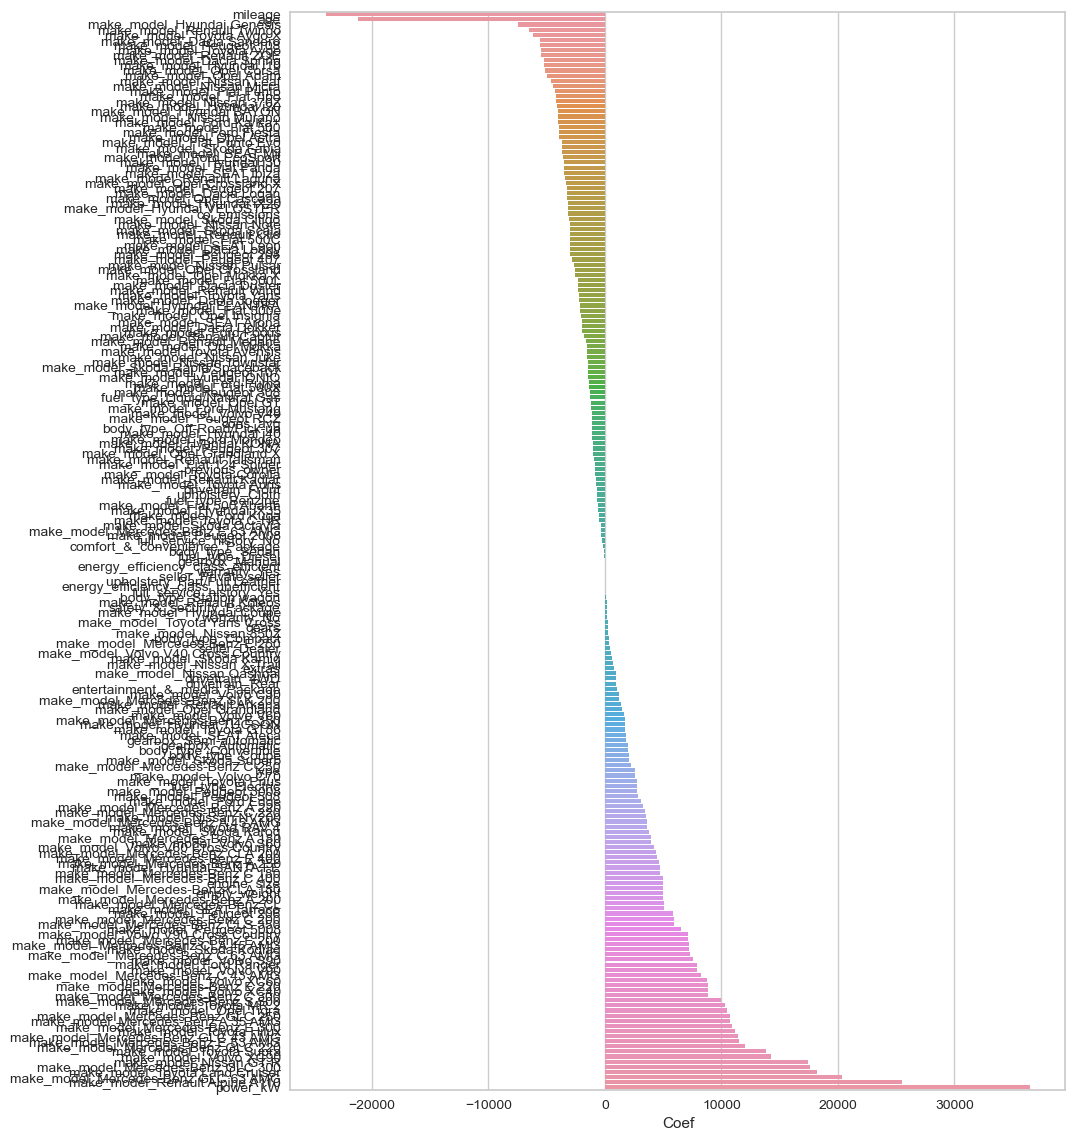

In [ ]:
plt.figure(figsize=(10,14))
sns.barplot(data= df_feat_imp,
            x=df_feat_imp.Coef,
            y=df_feat_imp.index);

Bu kod parçası, modelde kullanılan özelliklerin katsayılarını görselleştirmek için bir bar grafiği oluşturur. df_feat_imp verisindeki özellikler, katsayılarına göre sıralanmış halde y-ekseni boyunca dizilir ve x-ekseni, bu katsayıların büyüklüğünü gösterir. Grafikte her bir özellik için pozitif veya negatif etkisi (katsayı değeri) çubuklar şeklinde görselleştirilir. Bu sayede, hangi özelliklerin modelin tahminlerinde daha önemli olduğunu ve hedef değişken üzerindeki etkilerinin yönünü kolayca anlayabiliriz.

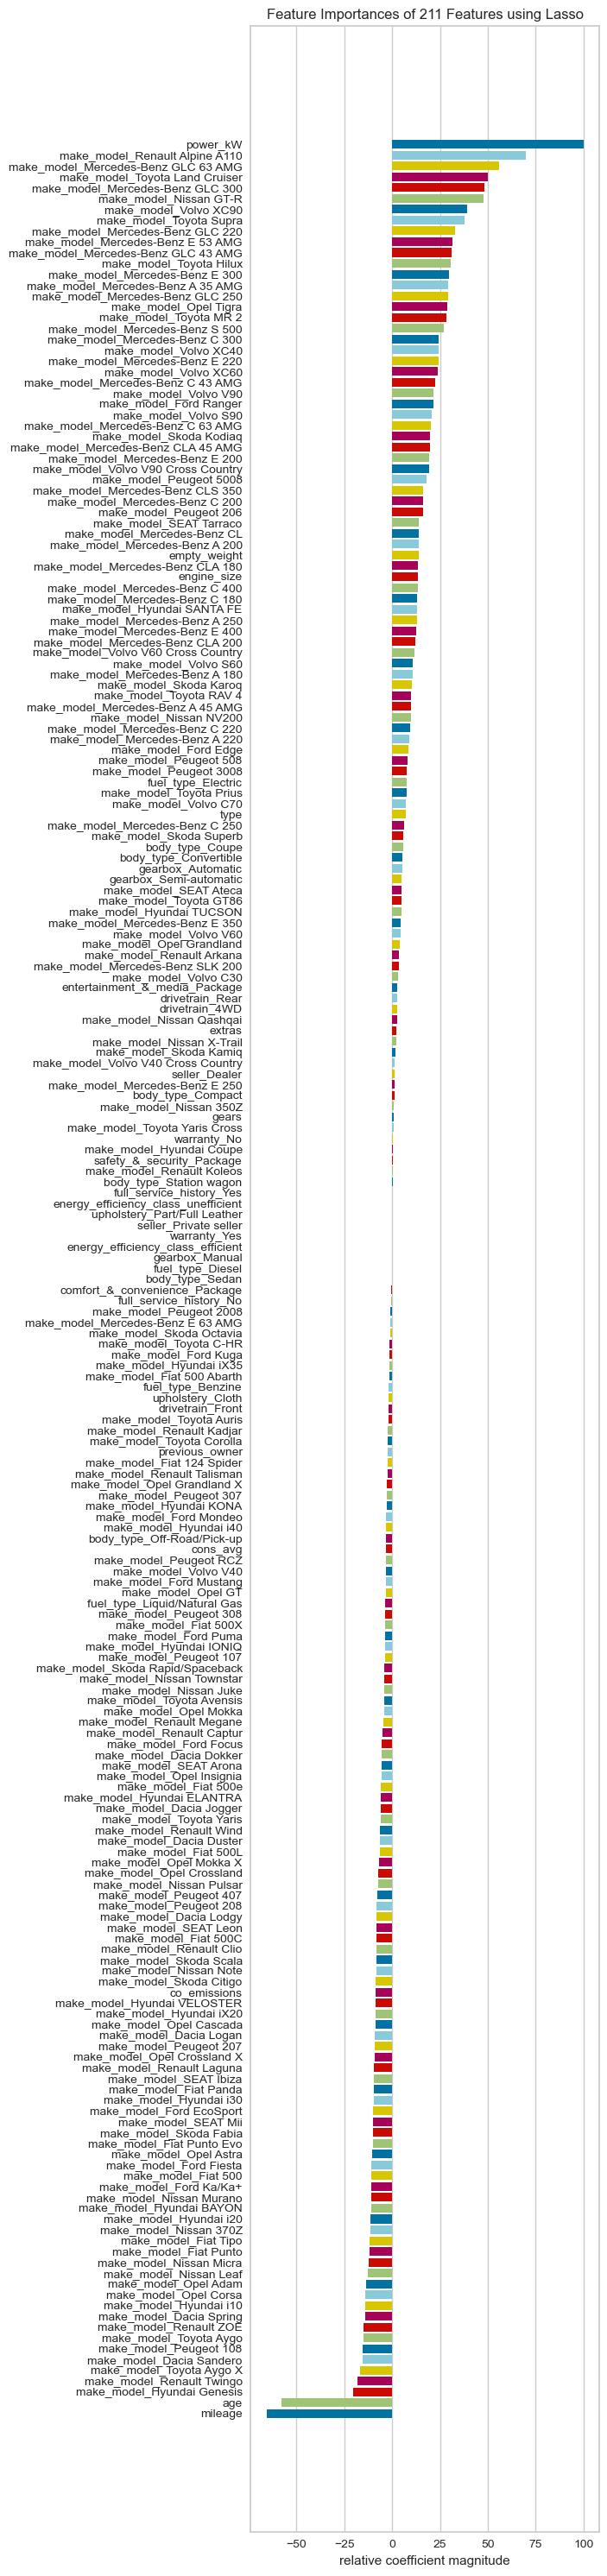

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = lasso_grid_model.best_estimator_["Lasso"]

viz = FeatureImportances(model,
                         labels=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out())

visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show();


Bu kod parçası, Lasso regresyon modelinin özelliklerinin önemini görselleştirmek için Yellowbrick kütüphanesini kullanır. İlk olarak, FeatureImportances sınıfı ile modelin özelliklerinin önem derecelerini gösteren bir grafik oluşturulur; burada, her bir özelliğin model üzerindeki etkisi renkli çubuklar ile gösterilir. Ardından, RadViz görselleştirme tekniği kullanılarak, özellikler arasındaki ilişkiler ve önemli özelliklerin dağılımları radyo dalgası benzeri bir görselleştirme ile sunulur. Bu analizler, özellik seçimi yaparken hangi özelliklerin daha etkili olduğunu belirlemek için kullanılır.

In [ ]:
df_new = df[["make_model", "power_kW", "mileage","age", "gears", "gearbox", "fuel_type", "price"]]


Bu kod parçasında, veri çerçevesinden öne çıkan altı özellik seçilmiştir: "make_model", "power_kW", "mileage", "age", "gears", ve "gearbox", yanı sıra hedef değişken "price" de dahil edilmiştir. Özellikle "make_model" özelliği, benzersiz kategorik gözlemler içerdiği için (örneğin, Audi A3, Renault Espace vb.) seçilmiştir. Diğer taraftan, "type" özelliği modelin tahminine çok katkıda bulunmasa da, sıralı dönüşüm (ordinal transformation) için bir özellik olarak veri kümesinde tutulmuştur. Bu özelliklerin seçilmesinin nedeni, modelin performansını artırmak ve özelliklerin önemini göz önünde bulundurmaktır.

In [ ]:
df_new

make_model  power_kW    mileage   age  gears    gearbox  \
0      Mercedes-Benz A 45 AMG   310.000  18900.000 2.000  8.000  Automatic   
1      Mercedes-Benz A 35 AMG   225.000  18995.000 2.000  7.000  Automatic   
2      Mercedes-Benz A 45 AMG   100.000 197000.000 7.000  7.000  Automatic   
3       Mercedes-Benz CLA 180    90.000  83339.000 4.000  7.000     Manual   
4         Mercedes-Benz A 220   140.000  48900.000 3.000  7.000  Automatic   
...                       ...       ...        ...   ...    ...        ...   
23227               Volvo S90   140.000  93757.000 4.000  8.000  Automatic   
23228               Volvo S90   140.000  93757.000 4.000  8.000  Automatic   
23229               Volvo V40    88.000 114000.000 4.000  6.000     Manual   
23231               Volvo S90   288.000  40345.000 3.000  8.000  Automatic   
23233               Volvo S90   187.000  94343.000 5.000  8.000  Automatic   

      fuel_type     price  
0       Benzine 69900.000  
1       Benzine 46990.000  
2        Diesel 16800.000  
3        Diesel 22550.000  
4       Benzine 26900.000  
...         ...       ...  
23227    Diesel 27190.000  
23228    Diesel 27190.000  
23229    Diesel 13000.000  
23231    Diesel 37600.000  
23233   Benzine 29900.000  

[20470 rows x 8 columns]

Veri çerçevesinde, araçların özelliklerini ve fiyatlarını içeren 20470 satır ve 8 sütun bulunmaktadır. Sütunlar şunlardır: "make_model" (aracın modeli ve markası), "power_kW" (motor gücü), "mileage" (kilometre), "age" (yaş), "gears" (vites sayısı), "gearbox" (şanzıman türü), "fuel_type" (yakıt türü) ve "price" (fiyat). Bu özellikler, araçların fiyatını tahmin etmek için kullanılacak temel verileri temsil eder. Özellikle "make_model" gibi kategorik değişkenler ve "power_kW", "mileage" gibi sayısal değişkenler, modelin performansını ve doğruluğunu etkileyen önemli faktörlerdir.

In [ ]:
X = df_new.drop(columns = ["price"])
y = df_new.price

Yeni veri setimizde "price" sütununu hedef değişken (y) olarak belirleyip, geri kalan sütunları (make_model, power_kW, mileage, age, gears, gearbox, fuel_type) özellikler (X) olarak seçiyoruz. Bu işlemle birlikte, önceki modelleme süreçlerini tekrar ederek, bu 5 yeni özellik ile modelimizi yeniden kuruyoruz. Modeli, bu seçilmiş özellikler ile eğitip, değerlendirme işlemlerini tekrar gerçekleştiriyoruz, böylece yeni verilerle performansı yeniden gözden geçirebiliyoruz.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Veri kümesini eğitim ve test setlerine ayırmak için train_test_split fonksiyonunu kullanarak, X (özellikler) ve y (hedef değişken) veri kümesini %80 eğitim ve %20 test oranında böldük. Bu işlemle, modelimizi eğitim verileri üzerinde eğitirken, test verileri üzerinde modelin performansını değerlendirmek için bir veri seti oluşturmuş olduk. random_state=42 parametresi ise bu işlemi tekrarlanabilir kılmak için sabit bir rastgelelik sağlıyor.

In [ ]:
X_train.head()

make_model  power_kW   mileage   age  gears    gearbox  \
5460          Renault Clio    54.000 97540.000 6.000  5.000     Manual   
13438         Dacia Duster    84.000 31261.000 3.000  5.000     Manual   
138    Mercedes-Benz A 200   121.000 67953.000 4.000  7.000  Automatic   
3121            Opel Astra    81.000 84750.000 4.000  6.000     Manual   
22353           Volvo XC60   145.000     9.000 0.000  8.000  Automatic   

      fuel_type  
5460    Benzine  
13438   Benzine  
138     Benzine  
3121     Diesel  
22353    Diesel


X_train veri seti, modelin eğitiminde kullanılacak özellikleri içerir ve make_model, power_kW, mileage, age, gears, gearbox, ve fuel_type gibi sütunlardan oluşur. Örneğin, ilk satırda bir Renault Clio'nun 54 kW motor gücü, 97,540 km yol yapmış, 6 yaşında, 5 vitesli manuel şanzımanlı ve benzinli olduğu bilgileri yer almaktadır. Bu veriler, modelin eğitilmesi için kullanılacak olan çeşitli özelliklerin örnekleridir ve modelin öğrenme sürecinde bu özelliklerin nasıl etkileşimde bulunacağını anlamak için analiz edilir.

In [ ]:
cat_onehot = ['make_model', 'fuel_type', 'gearbox']

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False) #MinMaxScaler()

column_trans adlı dönüşüm nesnesi, veri setindeki özellikleri işlemek için kullanılır. Burada, make_model, fuel_type ve gearbox gibi kategorik sütunlar, OneHotEncoder ile dönüştürülerek her kategoriyi ayrı bir sütun haline getirir. handle_unknown="ignore" parametresi, eğitim verisinde bulunmayan yeni kategorileri işlemek için kullanılır, sparse_output=False ise çıktının yoğun bir matris olarak döndürülmesini sağlar. remainder='passthrough' parametresi ise dönüşüm uygulanmayan diğer sütunların (örneğin, sayısal sütunlar) olduğu gibi bırakılmasını sağlar. Bu şekilde, veri setindeki kategorik ve sayısal özellikler uygun şekilde işlenir.

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso(alpha=0.001))]

lasso_final_model = Pipeline(steps=operations)

lasso_final_model.fit(X_train, y_train)
train_val(lasso_final_model, X_train, y_train, X_test, y_test)

train         test
R2          0.877        0.887
mae      2830.708     2795.221
mse  16884153.339 15607649.074
rmse     4109.033     3950.652
mape        0.140        0.138

lasso_final_model adlı model, column_trans dönüşüm nesnesi ve MinMaxScaler ile veriyi ön işleme tabi tutar ve ardından Lasso regresyonu uygular. Model, eğitim verisi üzerinde fit edildiğinde, test verisiyle yapılan performans değerlendirmesi sonuçları şu şekildedir: R² skoru eğitim verisinde 0.877 ve test verisinde 0.887 olarak belirlenmiştir, bu da modelin veri setindeki değişkenliği iyi açıkladığını gösterir. Ortalama mutlak hata (MAE) eğitim verisinde 2830.708 ve test verisinde 2795.221'dir, bu da modelin tahminlerinde ortalama olarak bu kadar hata payı bulunduğunu gösterir. Ortalama kare hata (MSE) ve kök ortalama kare hata (RMSE) sırasıyla eğitim verisinde 16884153.339 ve 4109.033; test verisinde ise 15607649.074 ve 3950.652'dir, bu da modelin test verisinde daha düşük hata seviyelerine sahip olduğunu belirtir. Ortalama mutlak yüzdelik hata (MAPE) her iki set için de benzer seviyededir (sırasıyla 0.140 ve 0.138), modelin tahminlerinin ortalama yüzdesel hata oranını gösterir. Bu sonuçlar, Lasso regresyon modelinin genel olarak iyi bir performans sergilediğini ve test verisinde de etkili olduğunu gösterir.

## Cross Validate

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso(alpha=0.001))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

operations adında bir işlem listesi oluşturularak, verilerin ön işleme ve modelleme adımları bir Pipeline içerisinde tanımlandı. Bu işlem listesi, OneHot_Ordinal_Encoder ile kategorik değişkenlerin dönüştürülmesini, MinMaxScaler ile verilerin ölçeklendirilmesini ve Lasso regresyon modelinin uygulanmasını içerir. Bu Pipeline, cross_validate fonksiyonu ile 10 katlamalı çapraz doğrulama kullanılarak değerlendirilmiştir. Performans ölçütleri olarak R² skoru, negatif ortalama mutlak hata, negatif ortalama kare hata, negatif kök ortalama kare hata ve negatif ortalama mutlak yüzde hata hesaplanmıştır. Bu doğrulama işlemi, modelin eğitim ve test verisindeki genel performansını ve geçerliliğini değerlendirmek için kullanılır.

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.873
train_r2                                           0.877
test_neg_mean_absolute_error                   -2870.589
train_neg_mean_absolute_error                  -2828.541
test_neg_mean_squared_error                -17410346.732
train_neg_mean_squared_error               -16858698.602
test_neg_root_mean_squared_error               -4167.730
train_neg_root_mean_squared_error              -4105.875
test_neg_mean_absolute_percentage_error           -0.142
train_neg_mean_absolute_percentage_error          -0.140
dtype: float64


cross_validate fonksiyonu ile yapılan 10 katlamalı çapraz doğrulama sonuçları scores veri çerçevesine dönüştürülmüştür. Bu veri çerçevesinde, eğitim ve test veri setleri için ortalama performans metrikleri hesaplanmıştır. Test seti için R² skoru 0.873, eğitim seti için ise 0.877 olarak bulunmuştur, bu da modelin hem eğitim hem de test verilerinde iyi bir uyum sağladığını gösterir. Ortalama negatif mutlak hata (MAE) test setinde -2870.589, eğitim setinde ise -2828.541 olarak belirlenmiştir. Ortalama negatif kare hata (MSE) ve kök ortalama kare hata (RMSE) değerleri sırasıyla -17410346.732 ve -4167.730 olarak hesaplanmıştır, bu da modelin hata büyüklüğünü gösterir. Ortalama negatif mutlak yüzdelik hata (MAPE) test setinde -0.142, eğitim setinde ise -0.140 olarak bulunmuştur, bu da modelin tahminlerinin yüzdesel hata oranını belirtir. Bu sonuçlar, modelin genel performansının oldukça tutarlı olduğunu ve test verileri üzerinde de başarılı olduğunu göstermektedir.

In [ ]:
y_pred = lasso_final_model.predict(X_test)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = mean_squared_error(y_test, y_pred, squared=False)
fm_mape= mean_absolute_percentage_error(y_test, y_pred)


lasso_final_model ile test verileri üzerinde tahminler yapıldıktan sonra, performans metrikleri hesaplanmıştır. R² skoru fm_R2 değeri ile ölçüldü ve 0.887 olarak bulunarak modelin test verileri üzerinde yüksek bir açıklayıcılık gücüne sahip olduğunu gösterdi. Ortalama mutlak hata (MAE) fm_mae değeri ile hesaplandı ve 2795.221 olarak belirlendi, bu da tahminlerin ortalama mutlak sapmasını yansıtır. Kök ortalama kare hata (RMSE) fm_rmse değeri ile ölçüldü ve 3950.652 olarak bulundu, bu da tahminlerin ne kadar büyük hata içerebileceğini gösterir. Ortalama mutlak yüzdelik hata (MAPE) fm_mape değeri ile hesaplandı ve 0.138 olarak belirlendi, bu da tahminlerin gerçek değerlere göre ortalama yüzdelik sapmasını ifade eder. Bu metrikler, modelin test verileri üzerindeki genel doğruluğunu ve performansını değerlendirir.

## 7. Visually Compare Models Performance In a Graph

In [ ]:
compare = pd.DataFrame({"Model": ["linear_m","ridge_m", "lasso_m", "elastic_m", "final_m"],
                        "r2_score": [lm_R2, rm_R2, lasm_R2, em_R2, fm_R2],
                        "mae": [lm_mae, rm_mae, lasm_mae, em_mae, fm_mae],
                        "rmse": [lm_rmse, rm_rmse, lasm_rmse, em_rmse, fm_rmse],
                        "mape": [lm_mape, rm_mape, lasm_mape, em_mape, fm_mape]})
compare


Model  r2_score      mae     rmse  mape
0   linear_m     0.892 2714.950 3854.314 0.136
1    ridge_m     0.892 2705.726 3848.975 0.135
2    lasso_m     0.892 2705.732 3848.973 0.135
3  elastic_m     0.892 2705.612 3848.074 0.135
4    final_m     0.887 2795.221 3950.652 0.138


Modellerin performansını karşılaştırmak için elde edilen metrikler bir veri çerçevesine (compare) yerleştirilmiştir. Her bir modelin R² skoru, ortalama mutlak hata (MAE), kök ortalama kare hata (RMSE) ve ortalama mutlak yüzdelik hata (MAPE) değerleri tabloya dahil edilmiştir.

Genel olarak, tüm modeller benzer sonuçlar göstermektedir. Özellikle, linear_m, ridge_m, lasso_m ve elastic_m modellerinin R² skoru 0.892 ile aynı seviyededir ve MAE, RMSE, MAPE gibi diğer metriklerde de çok benzer değerler gözlemlenmektedir. final_m (Lasso modelinin son hali) biraz daha düşük R² skoru (0.887) ve biraz daha yüksek MAE (2795.221), RMSE (3950.652), ve MAPE (0.138) değerlerine sahiptir. Bu, final_m modelinin diğer modellerle karşılaştırıldığında biraz daha düşük performans gösterdiğini ancak yine de benzer bir performans sergilediğini göstermektedir.

In [ ]:
compare.sort_values(by="r2_score", ascending=False)

Model  r2_score      mae     rmse  mape
3  elastic_m     0.892 2705.612 3848.074 0.135
2    lasso_m     0.892 2705.732 3848.973 0.135
1    ridge_m     0.892 2705.726 3848.975 0.135
0   linear_m     0.892 2714.950 3854.314 0.136
4    final_m     0.887 2795.221 3950.652 0.138


Modellerin performansını R² skoruna göre sıraladığımızda, elastic_m, lasso_m, ridge_m, ve linear_m modelleri en yüksek R² skoruna (0.892) sahiptir ve performans açısından birbirlerine çok yakındır. elastic_m ve lasso_m modelleri, ridge_m ve linear_m modellerine göre biraz daha iyi sonuçlar verirken, final_m modeli en düşük R² skoruna (0.887) sahip olup, diğer metriklerde de daha yüksek değerlere sahiptir. Bu sıralama, elastic_m, lasso_m, ridge_m, ve linear_m modellerinin performans açısından daha başarılı olduğunu ve final_m modelinin performansının biraz daha düşük olduğunu göstermektedir.

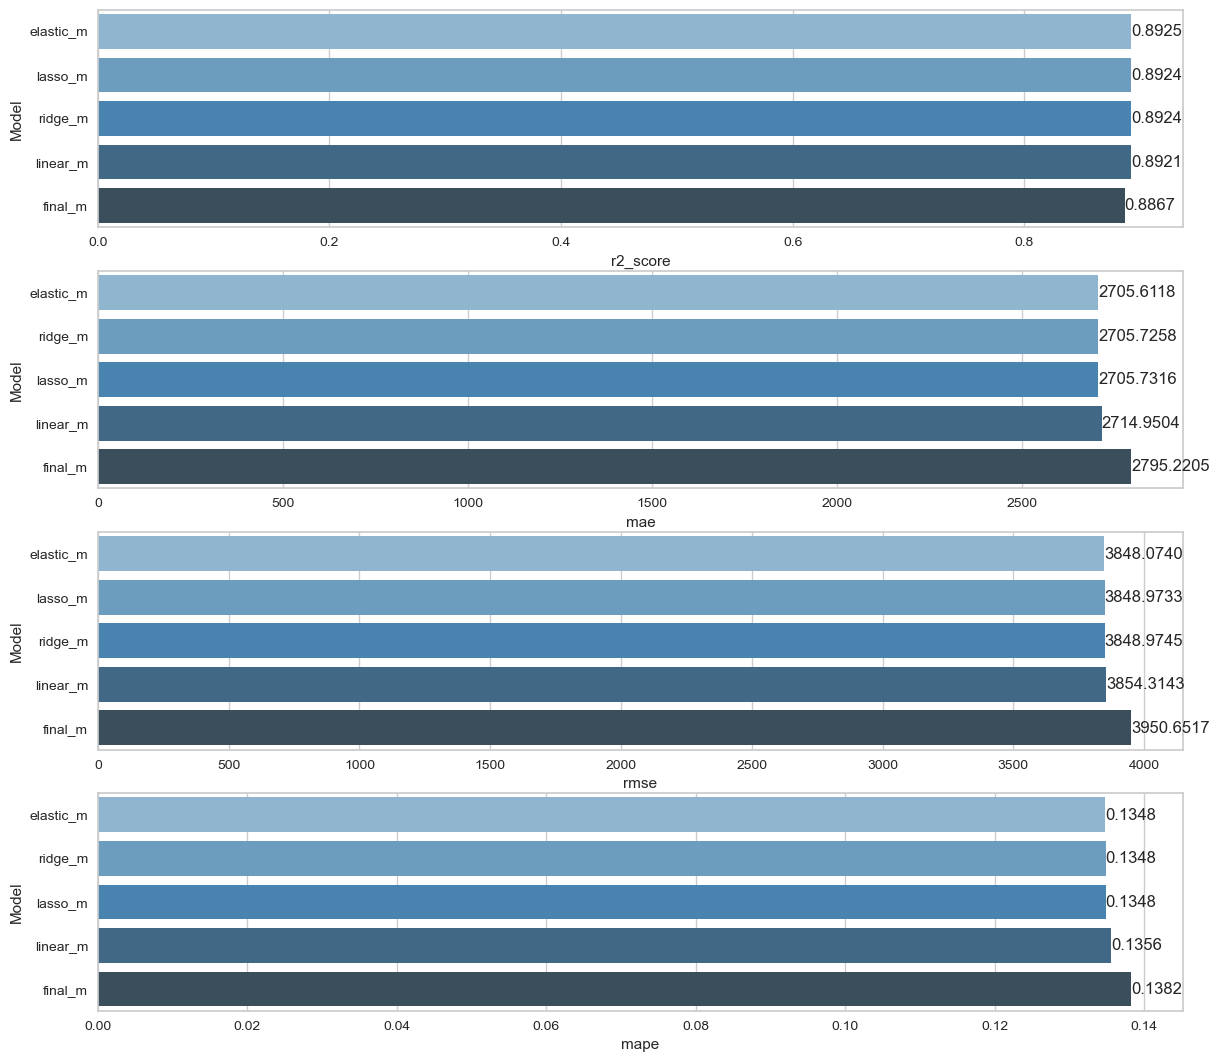

In [ ]:
plt.figure(figsize=(14,13))

plt.subplot(411)
compare = compare.sort_values(by="r2_score", ascending=False)
ax=sns.barplot(x="r2_score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.4f")

plt.subplot(412)
compare = compare.sort_values(by="mae", ascending=True)
ax=sns.barplot(x="mae", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.4f")

plt.subplot(413)
compare = compare.sort_values(by="rmse", ascending=True)
ax=sns.barplot(x="rmse", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.4f")

plt.subplot(414)
compare = compare.sort_values(by="mape", ascending=True)
ax=sns.barplot(x="mape", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.4f")
plt.show()


Grafikte, çeşitli model performans metrikleri karşılaştırılmıştır. İlk olarak, R² skoru en yüksekten düşüğe doğru sıralanmıştır, burada tüm modellerin R² skorları birbirine yakın olup elastic_m, lasso_m, ridge_m, ve linear_m modelleri en yüksek değerlere sahiptir. İkinci olarak, ortalama mutlak hata (MAE) sıralanmış, daha düşük MAE'ye sahip modeller üst sıralarda yer almıştır; burada elastic_m, lasso_m, ve ridge_m modelleri en iyi sonuçları vermiştir. Üçüncü olarak, karekök ortalama kare hata (RMSE) sıralanmış ve elastic_m modeli en düşük RMSE'ye sahipken, diğer modellerin sonuçları benzer seviyelerdedir. Son olarak, ortalama mutlak yüzde hata (MAPE) sıralanmış; burada da düşük MAPE değerleri daha iyi performansı gösterir ve elastic_m, lasso_m ve ridge_m modelleri en iyi sonuçları sağlamıştır. Bu görselleştirme, farklı metrikler üzerinden modellerin karşılaştırılmasını ve hangisinin en iyi performansı gösterdiğini açıkça ortaya koymaktadır.

## Final Model and Prediction new observation

In [ ]:
X = df_new.drop(columns = ["price"])
y = df_new.price



Tüm modelleri denedikten ve en iyi performans gösteren modeli belirledikten sonra, final modelimizi eğitmek için tüm veriyi kullanmaya karar verdik. Bu aşamada, veri kümesini X (özellikler) ve y (hedef değişken) olarak ayırıyoruz, ancak veriyi eğitim ve test setlerine ayırmıyoruz. Bu, modelin tüm veriye erişimini sağlar ve değerlendirme işlemi, modelin genel performansını yansıtmak için önceki aşamalarda yapılmıştır.

In [ ]:
X.head()

make_model  power_kW    mileage   age  gears    gearbox  \
0  Mercedes-Benz A 45 AMG   310.000  18900.000 2.000  8.000  Automatic   
1  Mercedes-Benz A 35 AMG   225.000  18995.000 2.000  7.000  Automatic   
2  Mercedes-Benz A 45 AMG   100.000 197000.000 7.000  7.000  Automatic   
3   Mercedes-Benz CLA 180    90.000  83339.000 4.000  7.000     Manual   
4     Mercedes-Benz A 220   140.000  48900.000 3.000  7.000  Automatic   

  fuel_type  
0   Benzine  
1   Benzine  
2    Diesel  
3    Diesel  
4   Benzine


Veri kümesindeki X değişkeni, araç fiyatını tahmin etmek için kullanılan özelliklerin bulunduğu bir DataFrame'dir. Bu özellikler arasında araç markası ve modeli (make_model), güç (power_kW), kilometre (mileage), yaş (age), vites sayısı (gears), şanzıman türü (gearbox) ve yakıt türü (fuel_type) yer almaktadır. Veriler, her bir araç için bu özelliklerin değerlerini içerir. Bu aşamada, model eğitimi ve değerlendirmesi için kullanılan tüm bu özellikler hazır ve işlenmeye hazır durumdadır.

In [ ]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso(alpha=0.001))]
final_model = Pipeline(steps=operations)



Önceki aşamalarda çeşitli modelleri değerlendirip karşılaştırdıktan sonra, en iyi sonuçları veren Lasso modelini final modeli olarak seçmeye karar verdik. Bu model, 7 özelliği içeren veri kümesi üzerinde çalışacak şekilde yapılandırılmıştır. Final aşamasında, Lasso modelini belirlenen hiperparametrelerle yeniden inşa ederek, elde edilen en iyi skorları kullanarak nihai modelimizi oluşturduk.

In [ ]:
final_model.fit(X, y)


Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'fuel_type',
                                                   'gearbox'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=0.001))])

final_model.fit(X, y) işlemi şu adımları gerçekleştirir:

OneHotEncoder Uygulaması: column_trans içindeki OneHotEncoder, cat_onehot listesinde yer alan kategorik özellikleri (örneğin, 'make_model', 'fuel_type', 'gearbox') dönüştürür. Bu işlem, bu kategorik özelliklerin her bir benzersiz değerini ayrı bir sütun olarak temsil eden ikili (0 ve 1) değişkenlere dönüştürülmesini sağlar.

OrdinalEncoder Uygulaması: Kategorik özellikler üzerinde OrdinalEncoder dönüşümü uygulanır, ancak burada belirli bir 'cat_ordinal' listesi tanımlı olmadığı için bu adım varsayımsaldır. Bu işlem, sıralı kategorik özellikleri sayısal değerlere dönüştürür.

Diğer Özelliklerin Korunması: Dönüştürme işlemlerinden etkilenmeyen diğer özellikler (örneğin, sayısal veriler) olduğu gibi bırakılır ve herhangi bir işlem yapılmaz.

MinMaxScaler Uygulaması: Özellikler dönüştürüldükten sonra, MinMaxScaler uygulanarak tüm sayısal veriler [0, 1] aralığına ölçeklenir. OneHotEncoder ile oluşturulan ikili sütunlar da bu işlemden geçer ve yine [0, 1] aralığında kalır.

Lasso Modelinin Eğitim Yapması: Son olarak, dönüştürülmüş ve ölçeklenmiş X verisi ile y hedef değişkeni, Lasso modeline verilir ve model eğitilir. Bu adım, modelin parametrelerini öğrenerek tahminler yapabilmesi için eğitim sürecini tamamlar.

In [ ]:
X

make_model  power_kW    mileage   age  gears    gearbox  \
0      Mercedes-Benz A 45 AMG   310.000  18900.000 2.000  8.000  Automatic   
1      Mercedes-Benz A 35 AMG   225.000  18995.000 2.000  7.000  Automatic   
2      Mercedes-Benz A 45 AMG   100.000 197000.000 7.000  7.000  Automatic   
3       Mercedes-Benz CLA 180    90.000  83339.000 4.000  7.000     Manual   
4         Mercedes-Benz A 220   140.000  48900.000 3.000  7.000  Automatic   
...                       ...       ...        ...   ...    ...        ...   
23227               Volvo S90   140.000  93757.000 4.000  8.000  Automatic   
23228               Volvo S90   140.000  93757.000 4.000  8.000  Automatic   
23229               Volvo V40    88.000 114000.000 4.000  6.000     Manual   
23231               Volvo S90   288.000  40345.000 3.000  8.000  Automatic   
23233               Volvo S90   187.000  94343.000 5.000  8.000  Automatic   

      fuel_type  
0       Benzine  
1       Benzine  
2        Diesel  
3        Diesel  
4       Benzine  
...         ...  
23227    Diesel  
23228    Diesel  
23229    Diesel  
23231    Diesel  
23233   Benzine  

[20470 rows x 7 columns]

X veri çerçevesi, modelin eğitilmesi için kullanılan bağımsız değişkenleri içerir ve toplamda 20470 satır ve 7 sütundan oluşur. Sütunlar şunlardır:

make_model: Araçların marka ve modelini belirten kategorik bir değişken.
power_kW: Araçların güç değerini kW cinsinden gösteren sayısal bir değişken.
mileage: Araçların kilometre bilgisini gösteren sayısal bir değişken.
age: Araçların yaşını belirten sayısal bir değişken.
gears: Araçların vites sayısını belirten sayısal bir değişken.
gearbox: Araçların şanzıman tipini belirten kategorik bir değişken (örneğin, Otomatik, Manuel).
fuel_type: Araçların yakıt türünü belirten kategorik bir değişken (örneğin, Benzin, Dizel).
Bu veri çerçevesinde, modelin tahmin yapabilmesi için kullanılacak tüm bağımsız değişkenler yer alır, ancak fiyat gibi bağımlı değişkenler burada bulunmaz.

In [ ]:
my_dict = {
    "make_model": 'Mercedes-Benz A 180',
    "power_kW": 85,
    "mileage": 30000,
    "age": 3,
    "gears": 5,
    "gearbox":'Manual',
    "fuel_type": "Benzine"
}


my_dict adlı Python sözlüğü, bir araç hakkında bilgi içeren bir veri kümesini temsil eder. Bu sözlük şu anahtar-değer çiftlerini içerir: "make_model" anahtarı aracın modelini belirtir ve değeri 'Mercedes-Benz A 180''dir; "power_kW" anahtarı aracın güç değerini kW cinsinden belirtir ve değeri 85'tir; "mileage" anahtarı aracın kilometre bilgisini belirtir ve değeri 30000'dir; "age" anahtarı aracın yaşını belirtir ve değeri 3'tür; "gears" anahtarı aracın vites sayısını belirtir ve değeri 5'tir; "gearbox" anahtarı aracın şanzıman tipini belirtir ve değeri 'Manual''dır; "fuel_type" anahtarı aracın yakıt türünü belirtir ve değeri "Benzine"'dir. Bu sözlük, bir araca ait özelliklerin tek bir yapıda toplandığı bir örnektir.

In [ ]:
X.head()


make_model  power_kW    mileage   age  gears    gearbox  \
0  Mercedes-Benz A 45 AMG   310.000  18900.000 2.000  8.000  Automatic   
1  Mercedes-Benz A 35 AMG   225.000  18995.000 2.000  7.000  Automatic   
2  Mercedes-Benz A 45 AMG   100.000 197000.000 7.000  7.000  Automatic   
3   Mercedes-Benz CLA 180    90.000  83339.000 4.000  7.000     Manual   
4     Mercedes-Benz A 220   140.000  48900.000 3.000  7.000  Automatic   

  fuel_type  
0   Benzine  
1   Benzine  
2    Diesel  
3    Diesel  
4   Benzine

X.head() komutu, modelin eğitildiği veri kümesindeki ilk birkaç gözlemi gösterir. Bu gözlemler, her bir satırda aracın markasını ve modelini (make_model), gücünü (power_kW), kilometre bilgisini (mileage), yaşını (age), vites sayısını (gears), şanzıman tipini (gearbox) ve yakıt türünü (fuel_type) içerir. Bu veri kümesindeki özelliklerin sıralaması, modelin eğitildiği veri kümesindeki özelliklerin sıralamasıyla aynı olmalıdır, çünkü model, verinin bu düzenine göre eğitim alır. Bu, yeni gözlemleri tahmin ederken aynı düzeni takip etmek gerektiği anlamına gelir.

In [ ]:
new_obs = pd.DataFrame([my_dict])
new_obs

make_model  power_kW  mileage  age  gears gearbox fuel_type
0  Mercedes-Benz A 180        85    30000    3      5  Manual   Benzine


new_obs değişkeni, my_dict sözlüğünden oluşturulan bir pandas DataFrame'dir. Bu DataFrame, model tarafından tahmin yapılacak yeni bir gözlemi temsil eder. İçerdiği veriler, modelin eğitim verilerindeki özelliklerin sırasıyla uyumlu olarak düzenlenmiştir: make_model, power_kW, mileage, age, gears, gearbox ve fuel_type. Bu düzen, modelin eğitimde kullandığı veri formatıyla tutarlı olduğu için tahmin işlemi için uygundur.

In [ ]:
final_model.predict(new_obs)

array([25415.29982195])

final_model.predict(new_obs) komutu, new_obs DataFrame'inde yer alan yeni gözlem verilerini kullanarak modelin tahmin yaptığı işlemi gerçekleştirir. Sonuç olarak, modelin tahmini değerini içeren bir dizi döner; burada model, belirli bir araç için tahmini fiyatı yaklaşık olarak 25,415.30 olarak hesaplamıştır. Bu tahmin, modelin eğitim verilerine dayanarak yaptığı fiyat değerlendirmesidir.

In [ ]:
my_dict = {
    "fuel_type": "Benzine",
    "power_kW": 85,
    "make_model": 'Mercedes-Benz A 180',
    "gears": 5,
    "mileage": 30000,
    "age": 3,
    "gearbox":"Manual"
}

new_obs = pd.DataFrame([my_dict])
new_obs

fuel_type  power_kW           make_model  gears  mileage  age gearbox
0   Benzine        85  Mercedes-Benz A 180      5    30000    3  Manual


my_dict sözlüğündeki özelliklerin sıralaması farklı olacak şekilde düzenlenmiş ve bu sözlük, new_obs adlı bir DataFrame'e dönüştürülmüştür. Bu durumda, özelliklerin sıralaması X.head()'deki sıralamayla uyuşmamakta; yani, modelin eğitiminde kullanılan sıralama ile aynı değil. Ancak, model tahmin işlemi sırasında, özelliklerin sıralamasının eğitim verisindeki sıralama ile uyumlu olması gerekir. Dolayısıyla, bu farklı sıralama ile tahmin yapıldığında model doğru şekilde çalışmayabilir çünkü model, özelliklerin belirli bir sıralama düzenine göre eğitilmiştir. Bu yüzden, tahmin yaparken özelliklerin sıralamasına dikkat edilmelidir.

In [ ]:
final_model.predict(new_obs)


array([25415.29982195])

final_model.predict(new_obs) ile yapılan tahminde, new_obs ve eğitim verisindeki (X) özellik sıralamaları farklı olmasına rağmen, model bu farkı algılar ve make_column_transformer yardımıyla new_obs'in özellik sıralamasını eğitim verisindeki sıralama ile uyumlu hale getirir. Bu işlem, OneHotEncoder ve MinMaxScaler gibi dönüşüm adımlarının doğru bir şekilde uygulanabilmesi için gereklidir. Sonuç olarak, tahmin doğru bir şekilde yapılır ve elde edilen değer 25415.29982195 olur. Bu, modelin özellik sıralama uyumsuzluğunu otomatik olarak düzelttiğini ve tahmini doğru şekilde gerçekleştirdiğini gösterir.

pipe_model.predict(new_obs) işleminde, sırasıyla şu adımlar gerçekleştirilir:

column_trans: İlk olarak, new_obs üzerindeki OneHotEncoder ve OrdinalEncoder dönüşümleri uygulanır. OneHotEncoder, eğitim verisindeki cat_onehot özelliklerine göre new_obs'teki kategorik verileri dönüştürür. OrdinalEncoder ise eğitim verisindeki cat_ordinal özelliklerine göre sıralı dönüşüm uygular. Dönüştürülen verilerin dışındaki diğer özellikler olduğu gibi bırakılır.

MinMaxScaler: Ardından, dönüşümlü ve değişmeden kalan sayısal özellikler MinMaxScaler kullanılarak ölçeklenir. Bu ölçekleme, eğitim verisindeki min ve max değerlerine göre new_obs'in sayısal özelliklerini dönüştürür.

Lasso: Son olarak, ölçeklenmiş ve dönüştürülmüş new_obs verileri, eğitim sürecinde öğrenilen Lasso modeline verilerek tahmin yapılır. Model, veriler üzerinde eğitim sırasında öğrendiği ilişkileri kullanarak bir tahmin üretir.

Bu adımlar, new_obs'in X verisiyle aynı formata getirilmesini ve Lasso modelinin doğru bir şekilde tahmin yapmasını sağlar.


Önemli not: make_column_transformer fonksiyonu, dönüşüm sırasına göre kategorik özellikleri veri çerçevesinin başına ve sayısal özellikleri veri çerçevesinin sonuna yerleştirir.

In [ ]:
import pickle

# Modeli pickle ile uzantısız kaydetme
with open('final_model', 'wb') as file:
    pickle.dump(final_model, file)


Bu kod, final_model adlı modelin pickle kullanılarak kaydedilmesini sağlar. pickle kütüphanesi ile model, ikili (binary) formatta final_model isimli dosyaya kaydedilir. Bu işlem, modelin ileride tekrar yüklenip kullanılabilmesi için gerekli bir adım olup, dosya uzantısı verilmeden kaydedilir.

In [ ]:
with open('final_model', 'rb') as file:
    loaded_model = pickle.load(file)

Bu kod, daha önce pickle kullanılarak kaydedilmiş final_model isimli model dosyasını yükler. pickle.load(file) fonksiyonu ile dosya açılır ve içindeki model loaded_model değişkenine yüklenir. Böylece, daha önce eğitilmiş ve kaydedilmiş model tekrar kullanılmak üzere bellek içi bir nesne olarak erişilebilir hale gelir.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___